<a href="https://colab.research.google.com/github/f11828my/Internalmeasures/blob/main/R%E3%82%B3%E3%83%BC%E3%83%89_%E7%A4%BE%E5%86%85%E6%96%BD%E7%AD%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#事前準備
パッケージのインストール

In [1]:
p = installed.packages()
rownames( p )

[1] "IRdisplay"     "IRkernel"      "pbdZMQ"        "repr"         
  [5] "askpass"       "assertthat"    "backports"     "base64enc"    
  [9] "bit"           "bit64"         "blob"          "brew"         
 [13] "brio"          "broom"         "bslib"         "cachem"       
 [17] "callr"         "cellranger"    "cli"           "clipr"        
 [21] "colorspace"    "commonmark"    "cpp11"         "crayon"       
 [25] "credentials"   "curl"          "data.table"    "DBI"          
 [29] "dbplyr"        "desc"          "devtools"      "diffobj"      
 [33] "digest"        "dplyr"         "dtplyr"        "ellipsis"     
 [37] "evaluate"      "fansi"         "farver"        "fastmap"      
 [41] "forcats"       "fs"            "gargle"        "generics"     
 [45] "gert"          "ggplot2"       "gh"            "gitcreds"     
 [49] "glue"          "googledrive"   "googlesheets4" "gtable"       
 [53] "haven"         "highr"         "hms"           "htmltools"    
 [57] "httr"          "ids"           "ini"           "isoband"      
 [61] "jquerylib"     "jsonlite"      "knitr"         "labeling"     
 [65] "lifecycle"     "lubridate"     "magrittr"      "memoise"      
 [69] "mime"          "modelr"        "munsell"       "openssl"      
 [73] "pillar"        "pkgbuild"      "pkgconfig"     "pkgload"      
 [77] "praise"        "prettyunits"   "processx"      "progress"     
 [81] "ps"            "purrr"         "R6"            "rappdirs"     
 [85] "rcmdcheck"     "RColorBrewer"  "readr"         "readxl"       
 [89] "rematch"       "rematch2"      "remotes"       "reprex"       
 [93] "rlang"         "rmarkdown"     "roxygen2"      "rprojroot"    
 [97] "rstudioapi"    "rversions"     "rvest"         "sass"         
[101] "scales"        "selectr"       "sessioninfo"   "stringi"      
[105] "stringr"       "svglite"       "sys"           "systemfonts"  
[109] "testthat"      "tibble"        "tidyr"         "tidyselect"   
[113] "tidyverse"     "tinytex"       "tzdb"          "usethis"      
[117] "utf8"          "uuid"          "vctrs"         "viridisLite"  
[121] "vroom"         "waldo"         "whisker"       "withr"        
[125] "xfun"          "xml2"          "xopen"         "yaml"         
[129] "zip"           "base"          "boot"          "class"        
[133] "cluster"       "codetools"     "compiler"      "datasets"     
[137] "foreign"       "graphics"      "grDevices"     "grid"         
[141] "KernSmooth"    "lattice"       "MASS"          "Matrix"       
[145] "methods"       "mgcv"          "nlme"          "nnet"         
[149] "parallel"      "rpart"         "spatial"       "splines"      
[153] "stats"         "stats4"        "survival"      "tcltk"        
[157] "tools"         "utils"

In [2]:
install.packages( "Rcmdr" )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘zoo’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘proxy’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘mitools’, ‘sandwich’, ‘Hmisc’, ‘e1071’, ‘readstata13’, ‘nortest’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘survey’, ‘estimability’, ‘insight’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘RcmdrMisc’, ‘car’, ‘effects’, ‘tcltk2’, ‘abind’, ‘relimp’, ‘lme4’




In [3]:
library("Rcmdr")

Loading required package: splines

Loading required package: RcmdrMisc

Loading required package: car

Loading required package: carData

Loading required package: sandwich

Loading required package: effects

lattice theme set by effectsTheme()
See ?effectsTheme for details.

Warning message:
“no DISPLAY variable so Tk is not available”
The Commander GUI is launched only in interactive sessions


Attaching package: ‘Rcmdr’


The following object is masked from ‘package:base’:

    errorCondition




In [4]:
install.packages( "ROCR" )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’




# ０．データの読み込み

In [ ]:
df <- read.table("https://raw.githubusercontent.com/f11828my/Internalmeasures/3fbf6d8d67b83df27377c31c27ce80f9ff3e2051/Data_insample.txt",
                  header=TRUE , sep = "," , na.strings = "NA" ,dec=".",strip.white=TRUE)

データ件数の表示、内容確認

In [ ]:
nrow(df)
summary(df)

[1] 41011

       ID             age            C_job           C_dokki     
 Min.   :    1   Min.   :18.00   Min.   : 1.000   Min.   :1.000  
 1st Qu.:10254   1st Qu.:33.00   1st Qu.: 2.000   1st Qu.:1.000  
 Median :20506   Median :39.00   Median : 5.000   Median :2.000  
 Mean   :20918   Mean   :41.18   Mean   : 5.363   Mean   :1.845  
 3rd Qu.:30758   3rd Qu.:49.00   3rd Qu.: 8.000   3rd Qu.:2.000  
 Max.   :45211   Max.   :95.00   Max.   :12.000   Max.   :3.000  
  C_education      C_default          balance        C_housing     
 Min.   :1.000   Min.   :0.00000   Min.   :-8019   Min.   :0.0000  
 1st Qu.:2.000   1st Qu.:0.00000   1st Qu.:   67   1st Qu.:0.0000  
 Median :2.000   Median :0.00000   Median :  442   Median :1.0000  
 Mean   :2.431   Mean   :0.01919   Mean   : 1349   Mean   :0.5476  
 3rd Qu.:3.000   3rd Qu.:0.00000   3rd Qu.: 1413   3rd Qu.:1.0000  
 Max.   :9.000   Max.   :1.00000   Max.   :98417   Max.   :1.0000  
     C_loan         C_contact          Day           C_month  

# １．モデル作成１回目

とりあえず全投入   
→　有意確率5%超先発生

In [ ]:
df <- read.table("https://raw.githubusercontent.com/f11828my/Internalmeasures/3fbf6d8d67b83df27377c31c27ce80f9ff3e2051/Data_insample.txt",
                  header=TRUE , sep = "," , na.strings = "NA" ,dec=".",strip.white=TRUE)

In [ ]:
# カテゴリ変数作成

df$C_dokki <- as.factor(df$C_dokki)
df$C_job <- as.factor(df$C_job)
df$C_education <- as.factor(df$C_education)
df$C_default <- as.factor(df$C_default)
df$C_housing <- as.factor(df$C_housing)
df$C_loan <- as.factor(df$C_loan)
df$C_contact <- as.factor(df$C_contact)
df$C_Day <- as.factor(df$Day)
df$C_month <- as.factor(df$C_month)
df$C_poutcome <- as.factor(df$C_poutcome)

# カテゴリ変数　まとめ
##職業（無職、不明は同カテゴリ
df$C_job <- recode(df$C_job, ' 12=11')


In [ ]:
#連続値変数作成

#各変数　上限設定

##年齢
df$age_60 <- pmin(df$age,60)

#＃平均残高
df$balance_5000 <- pmax(df$balance,-1)
df$balance_5000 <- pmin(df$balance_5000,5000)

##現在のマーケティングキャンペーンにおける顧客への連絡回数
df$campaign_11 <- pmin(df$campaign,11)

##以前のマーケティングキャンペーンにおける顧客への最終連絡日からの経過日数
df$pdays_300 <- pmin(df$pdays,300)

df$F_pdays <- 0
df[df$pdays == -1,]$F_pdays <- 1
df$F_pdays <- as.factor(df$F_pdays)

##以前のマーケティングキャンペーンにおける顧客への連絡回数
df$previous_11 <- pmin(df$previous,11)


#平滑化
library(splines)
i <- 3

B_age <- bs(df$age_60,df=i)
B_balance <- bs(df$balance_5000,df = i)
B_campaign <- bs(df$campaign_11,df = i)
B_pdays <- bs(df$pdays_300,df = i)
B_previous <- bs(df$previous_11,df = i)

df[,"B_age"] <- B_age
df[,"B_balance"] <- B_balance
df[,"B_campaign"] <- B_campaign
df[,"B_pdays"] <- B_pdays
df[,"B_previous"] <- B_previous

In [ ]:
#モデル作成_1回目

mbs <- glm(flg ~
            B_age +
            C_job +
            C_dokki +
            C_education +
            C_default +
            B_balance +
            C_housing +
            C_loan +
            C_contact +
            C_Day +
            C_month +
            B_campaign +
            B_pdays + F_pdays +
            B_previous +
            C_poutcome
            , data=df,family=binomial(link=logit))

In [ ]:

llrt <- function(mfull,m){
  loglik_full <- sum(mfull$y * log(mfull$fitted.values) + (1 - mfull$y) * log(1-mfull$fitted.values))
  logLik_dvar <- sum(m$y * log(m$fitted.values) + (1 - m$y) * log(1-m$fitted.values))
  chisq <- -2 * (logLik_dvar  - loglik_full)   
  df <- summary(mfull)$df[1] - summary(m)$df[1]
  p <- 1- pchisq(chisq,df)
  round(c(chisq , df ,p ),3)
  } 

  mbs_pdays <- glm(flg ~
            B_age +
            C_job +
            C_dokki +
            C_education +
            C_default +
            B_balance +
            C_housing +
            C_loan +
            C_contact +
            C_Day +
            C_month +
            B_campaign +
           # B_pdays + F_pdays +
            B_previous +
            C_poutcome
            , data=df,family=binomial(link=logit))

llrt(mbs,mbs_pdays)   

[1] 22.45  4.00  0.00

In [ ]:
Anova(mbs)

,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
B_age,53.0183281,3,1.816941e-11
C_job,17.9193288,10,5.633979e-02
C_dokki,36.3746982,2,1.262800e-08
C_education,16.8730371,3,7.505293e-04
C_default,0.3001636,1,5.837799e-01
B_balance,90.1352105,3,2.048875e-19
C_housing,126.6455226,1,2.221035e-29
C_loan,36.1636577,1,1.814225e-09
C_contact,217.9925705,2,4.608024e-48


# ２．モデル作成２回目

「C_default」有意確率5%超のため削除  
「C_job」投入方法検討

説明力  
AR　　　CAP20　　CAP30　　CAP70

56.99　　60.26　　　68.67　　　90.52





Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeter

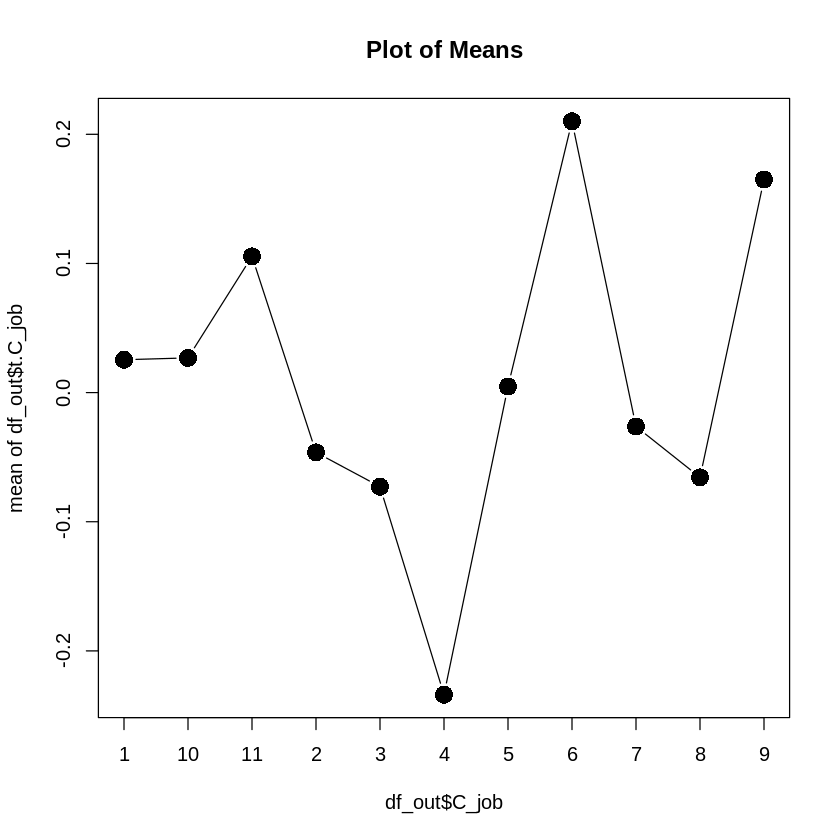

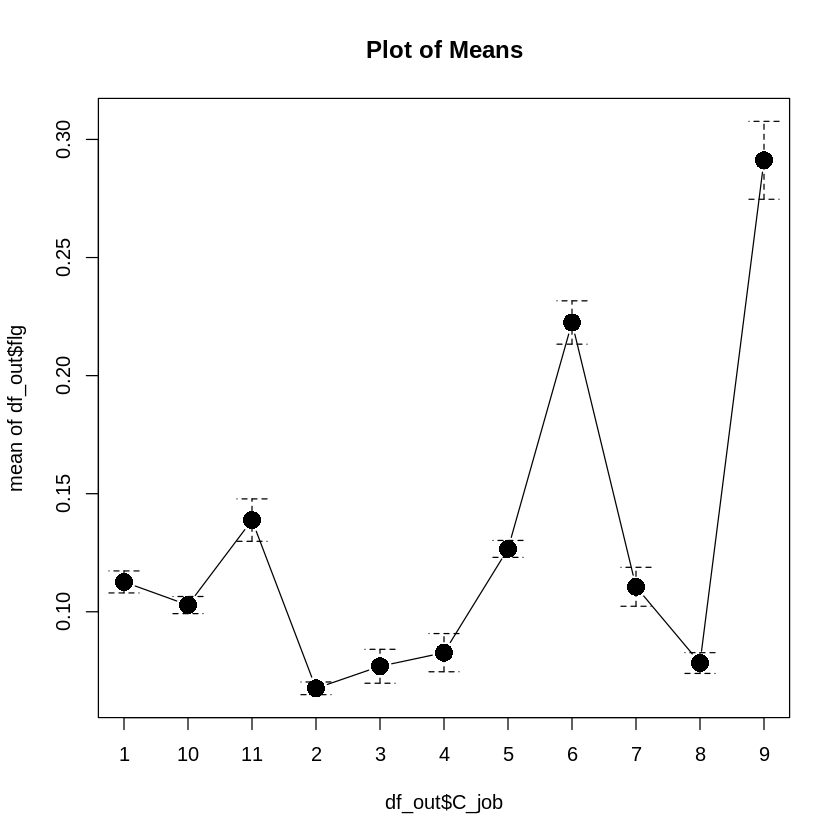

In [ ]:
#モデル1回目での職業別スコア/実績を確認

df_out <- data.frame(df,p=predict(mbs,type="response"),t=predict(mbs,type="terms"))
plotMeans(df_out$t.C_job,df_out$C_job,error.bars="se")
plotMeans(df_out$flg,df_out$C_job,error.bars="se")

In [ ]:
##職業
df$C_job <- recode(df$C_job, ' 4=3 ; 8=3')

In [ ]:
#モデル作成_２回目
#「C_default」有意確率が出ているので削除

mbs <- glm(flg ~
            B_age +
            C_job +
            C_dokki +
            C_education +
          #  C_default +
            B_balance +
            C_housing +
            C_loan +
            C_contact +
            C_Day +
            C_month +
            B_campaign +
            B_pdays + F_pdays +
            B_previous +
            C_poutcome
            , data=df,family=binomial(link=logit))

In [ ]:

llrt <- function(mfull,m){
  loglik_full <- sum(mfull$y * log(mfull$fitted.values) + (1 - mfull$y) * log(1-mfull$fitted.values))
  logLik_dvar <- sum(m$y * log(m$fitted.values) + (1 - m$y) * log(1-m$fitted.values))
  chisq <- -2 * (logLik_dvar  - loglik_full)   
  df <- summary(mfull)$df[1] - summary(m)$df[1]
  p <- 1- pchisq(chisq,df)
  round(c(chisq , df ,p ),3)
  } 

  mbs_pdays <- glm(flg ~
            B_age +
            C_job +
            C_dokki +
            C_education +
           # C_default +
            B_balance +
            C_housing +
            C_loan +
            C_contact +
            C_Day +
            C_month +
            B_campaign +
           # B_pdays + F_pdays +
            B_previous +
            C_poutcome
            , data=df,family=binomial(link=logit))

llrt(mbs,mbs_pdays)   

[1] 22.558  4.000  0.000

In [ ]:
Anova(mbs)

,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
B_age,52.550448,3,2.286040e-11
C_job,16.241414,8,3.905223e-02
C_dokki,36.597296,2,1.129791e-08
C_education,18.456338,3,3.541050e-04
B_balance,90.010069,3,2.179689e-19
C_housing,125.875562,1,3.273815e-29
C_loan,35.508251,1,2.539725e-09
C_contact,217.945899,2,4.716822e-48
C_Day,240.676132,30,9.468125e-35


In [ ]:
library(ROCR)

df_out <- data.frame(df,p=predict(mbs,type="response"),t=predict(mbs,type="terms"))

d_arcap <- df_out

#目的変数名
targetName <- "flg"
targetPred <- d_arcap[,targetName]

#ソートする変数、予測確率、GNO、CR
sortName <- "p"
sortPred <- d_arcap[,sortName]

#ARの計算
pred <- prediction(sortPred,targetPred)
AUC <- as.numeric( performance(pred,"auc")@y.values )
AR <- 2 *(AUC-0.5) * 100 #AR値

#CAP値の計算
#予測確率（GNO、CR）を照準に件数等分１０分類
d_arcap$CP10 <- bin.var( sortPred, bins=10, method='proportions',labels =FALSE)

#区分別のデフォルト件数
dcount <- tapply(targetPred,list(CP10=d_arcap$CP10),sum,na.rm=TRUE)

#CAP20値
CAP20 <- sum(dcount[9:10]) / sum(dcount) * 100

#CAP30値
CAP30 <- sum(dcount[8:10]) / sum(dcount) * 100

#CAP70値
CAP70 <- sum(dcount[4:10]) / sum(dcount) * 100

#結果
round(c(AR,CAP20,CAP30,CAP70),2)

[1] 56.99 60.26 68.67 90.52

## ２‐１．グラフ確認


Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


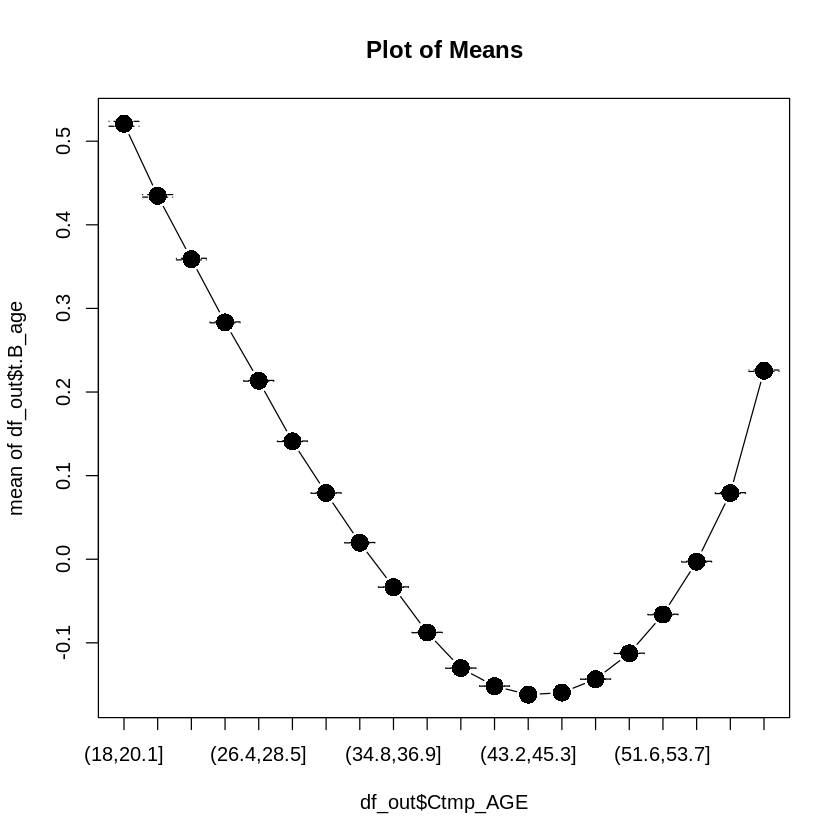

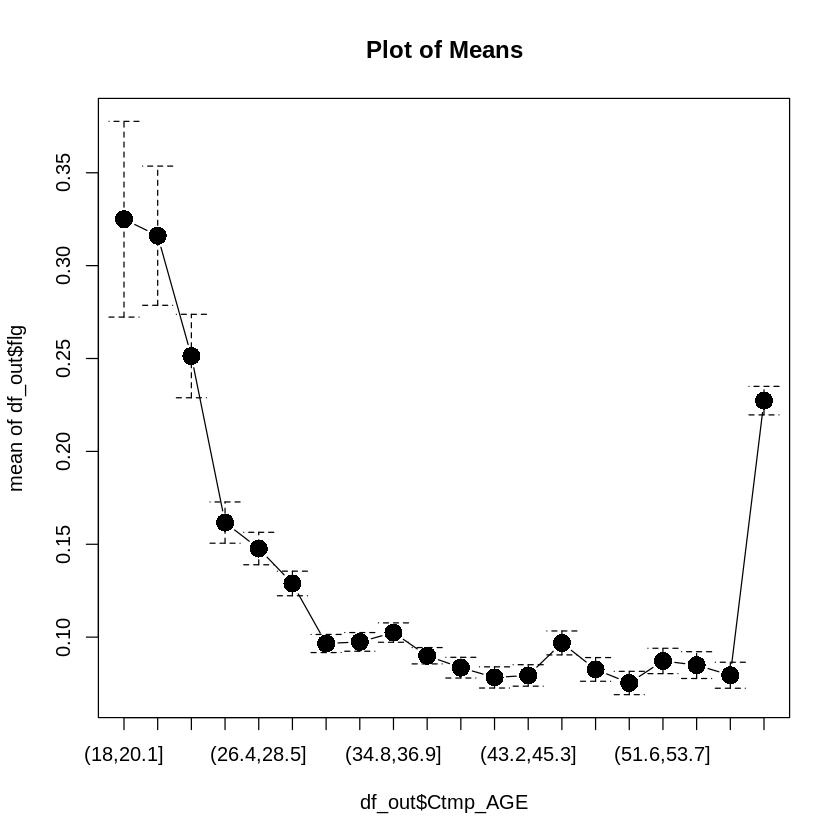

In [ ]:
df_out$Ctmp_AGE <- bin.var(df_out$age_60,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_age,df_out$Ctmp_AGE,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_AGE,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeter

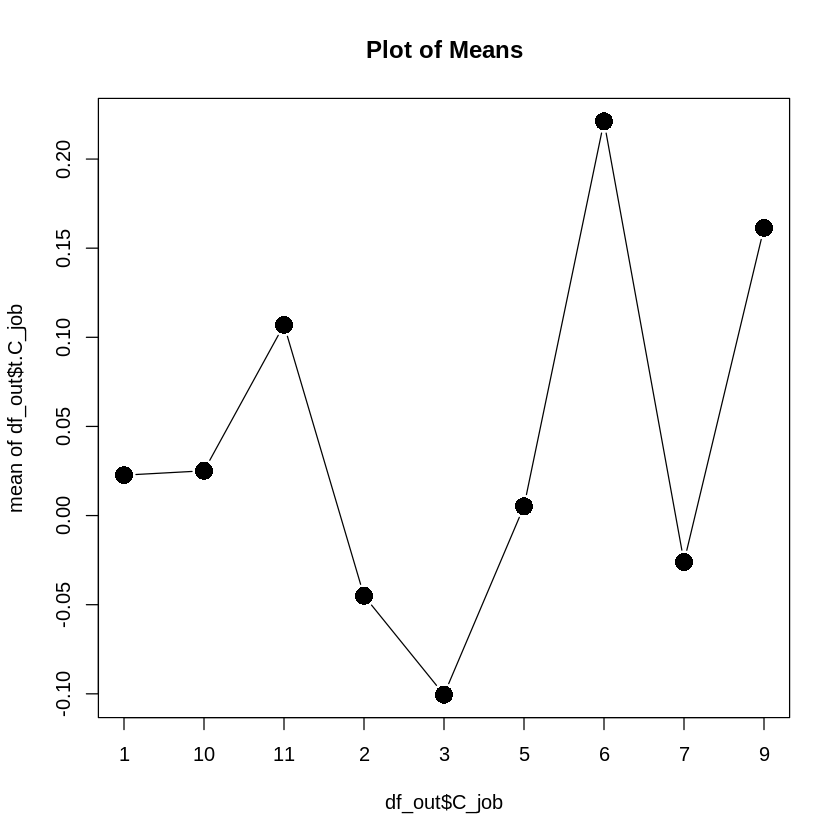

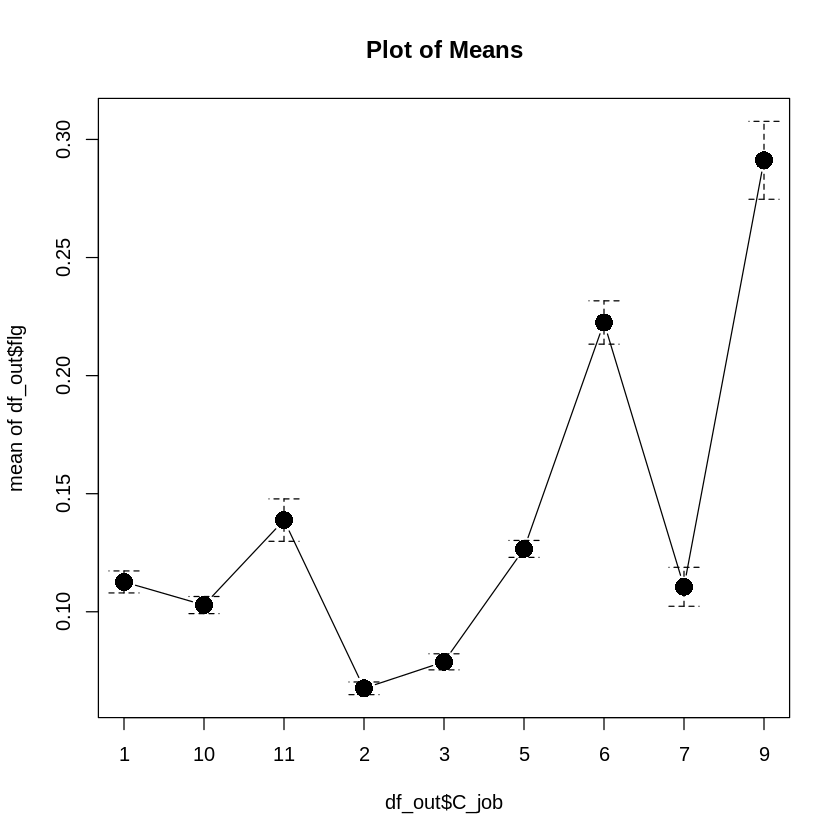

In [ ]:
plotMeans(df_out$t.C_job,df_out$C_job,error.bars="se")
plotMeans(df_out$flg,df_out$C_job,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


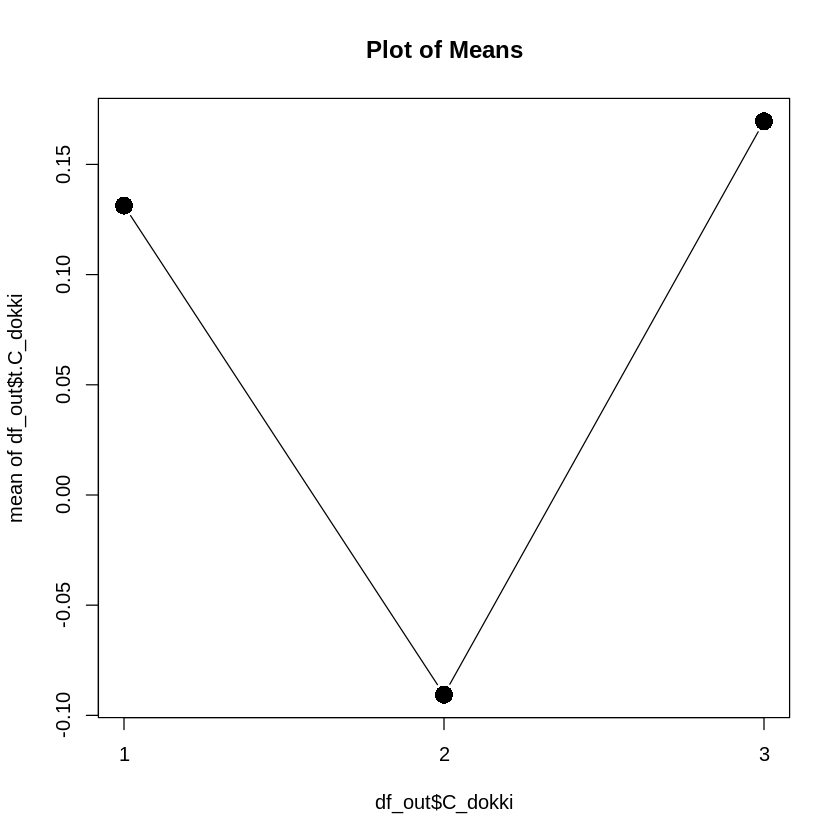

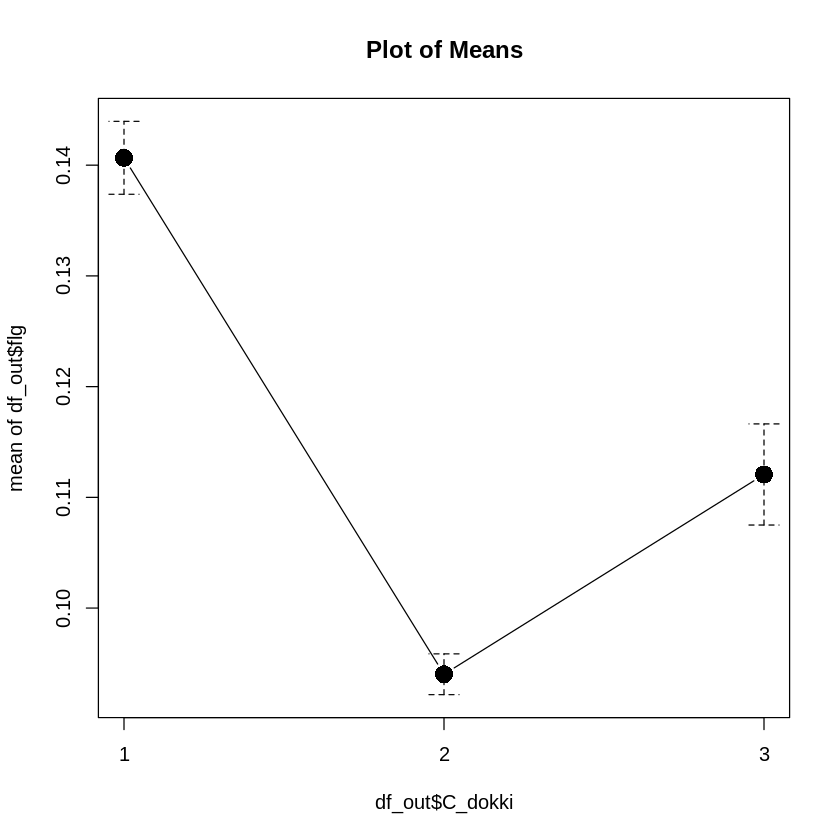

In [ ]:
plotMeans(df_out$t.C_dokki,df_out$C_dokki,error.bars="se")
plotMeans(df_out$flg,df_out$C_dokki,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


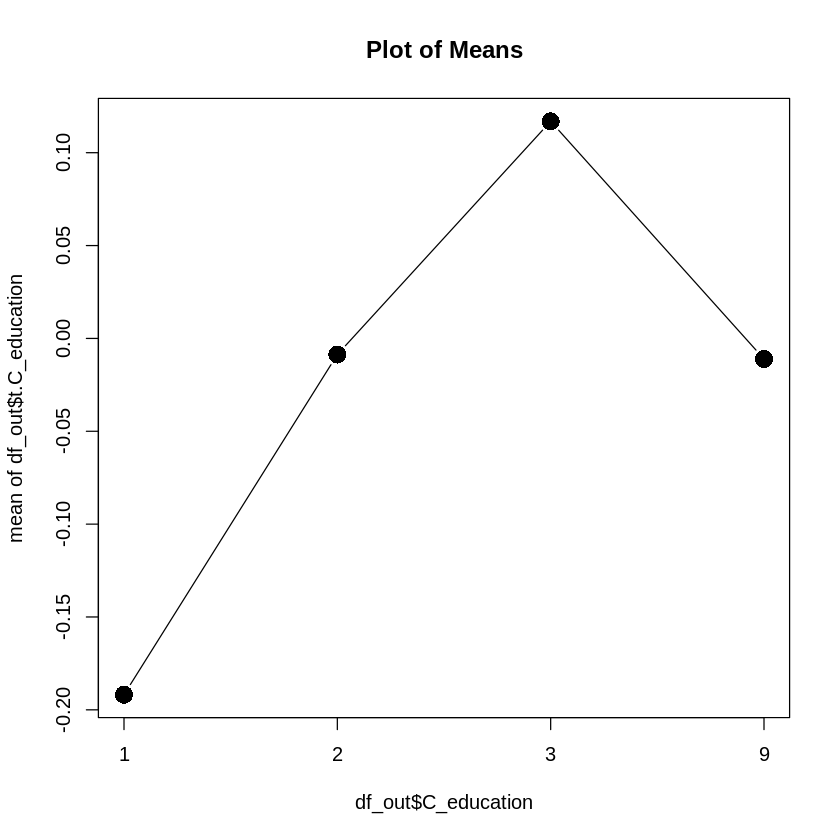

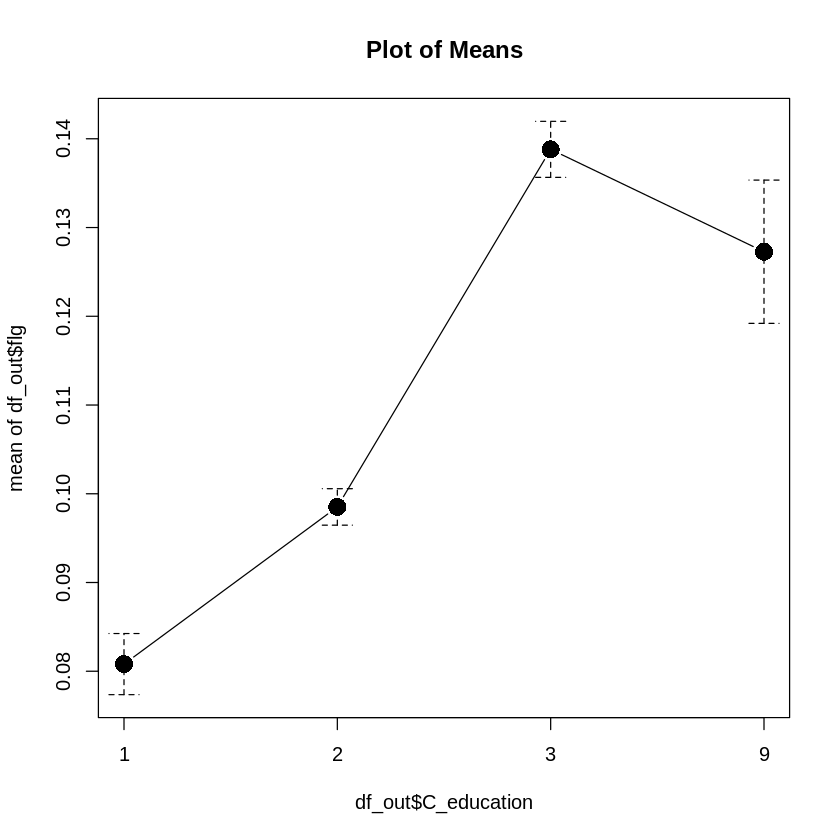

In [ ]:
plotMeans(df_out$t.C_education,df_out$C_education,error.bars="se")
plotMeans(df_out$flg,df_out$C_education,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


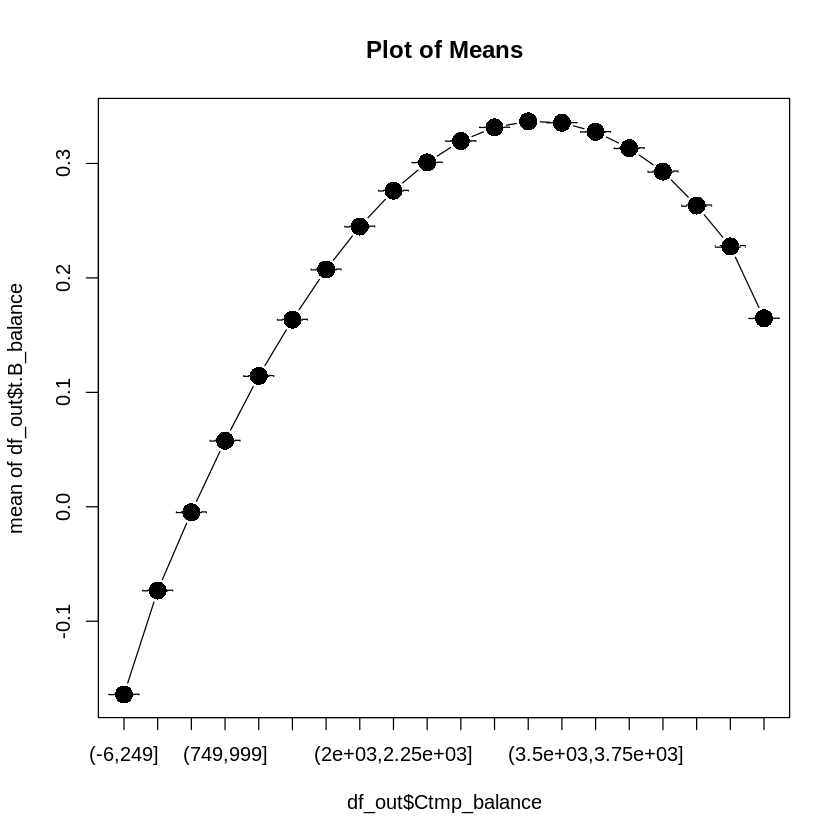

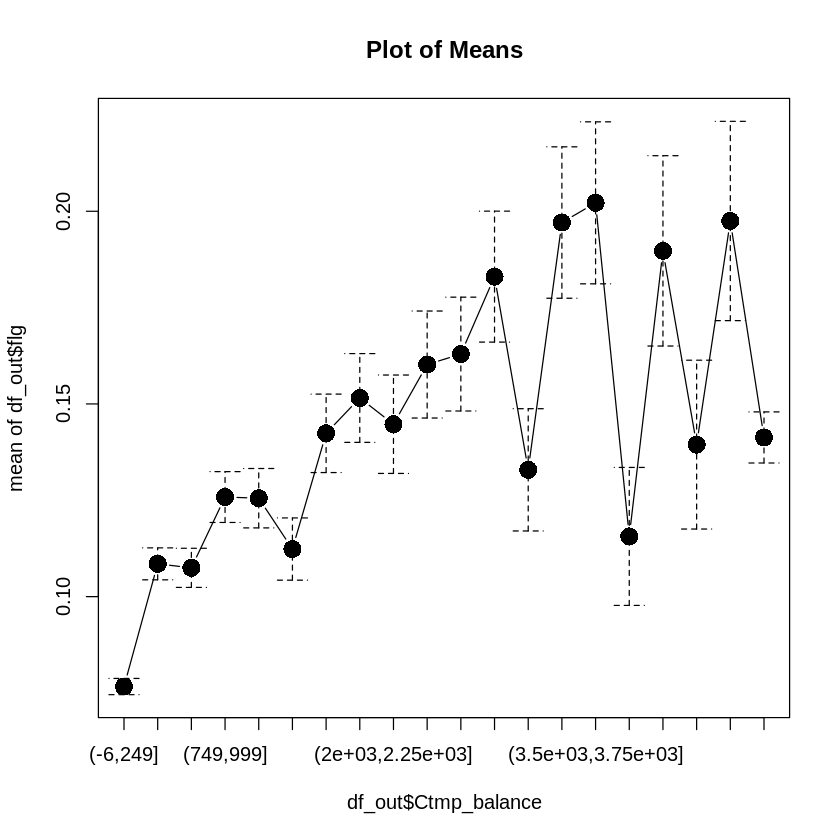

In [ ]:
df_out$Ctmp_balance <- bin.var(df_out$balance_5000,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_balance,df_out$Ctmp_balance,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_balance,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


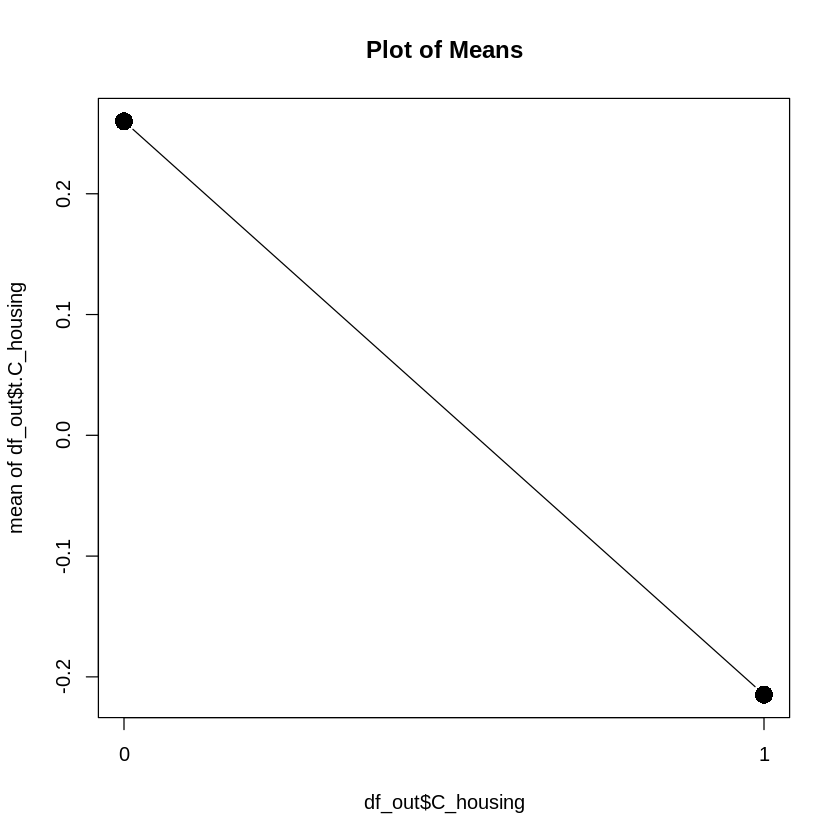

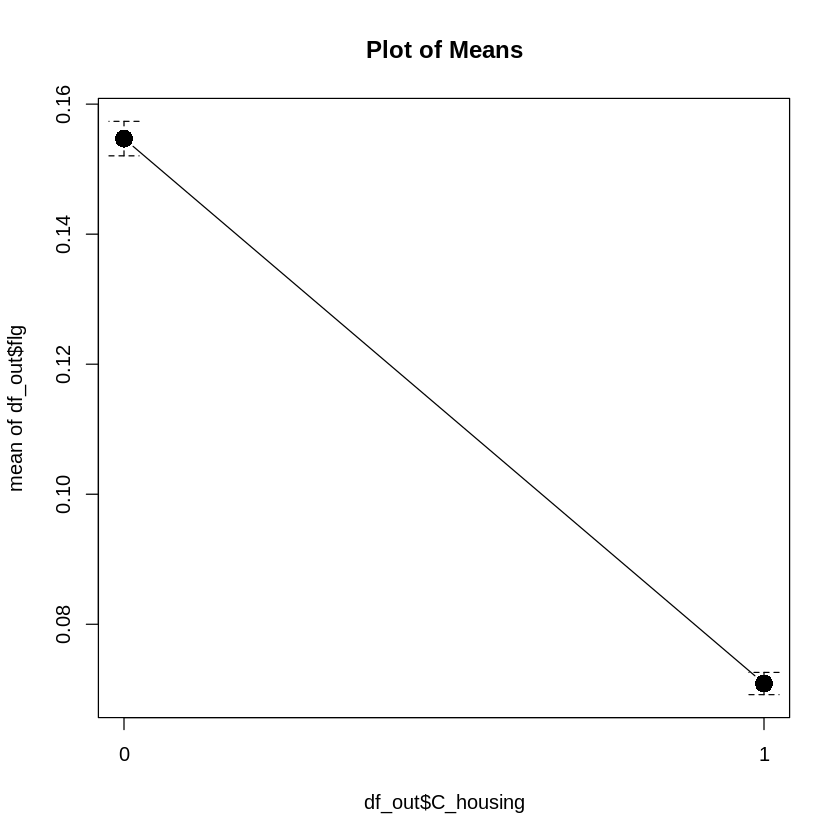

In [ ]:
plotMeans(df_out$t.C_housing,df_out$C_housing,error.bars="se")
plotMeans(df_out$flg,df_out$C_housing,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


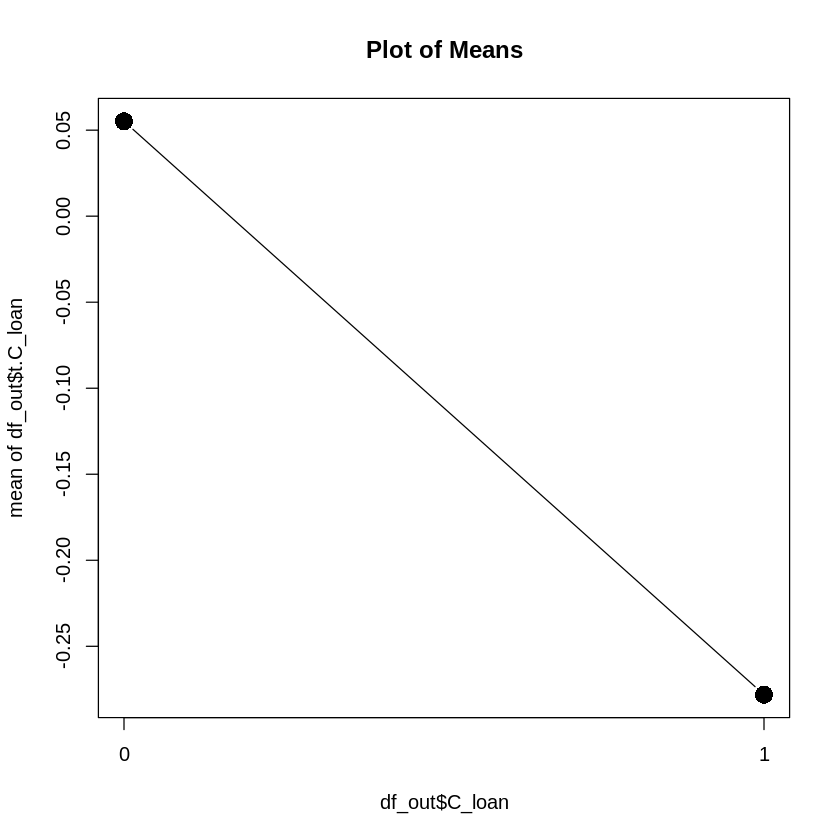

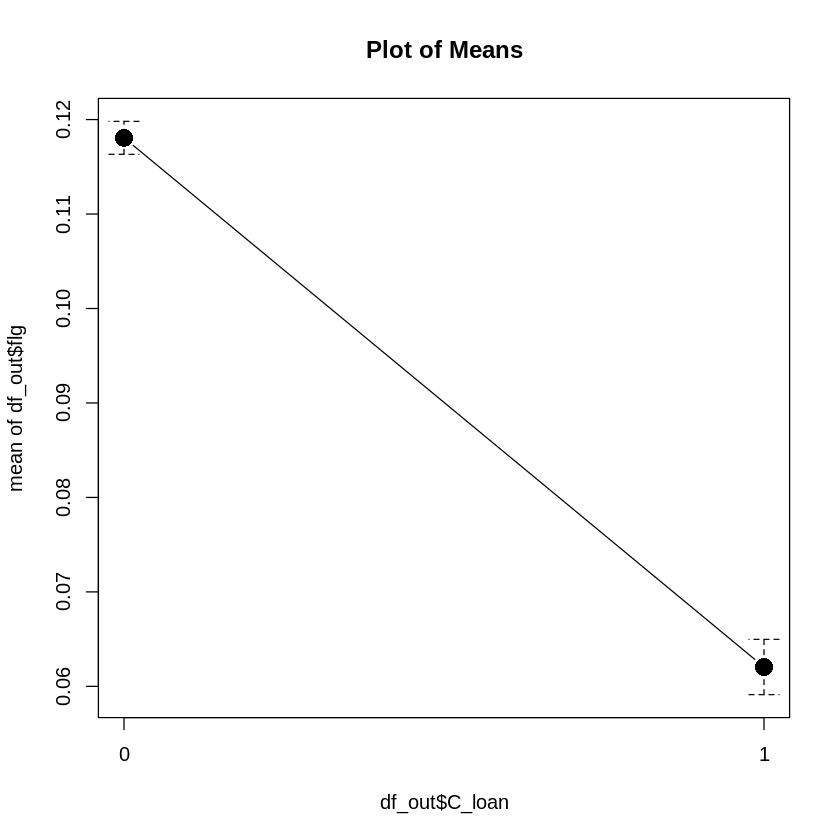

In [ ]:
plotMeans(df_out$t.C_loan,df_out$C_loan,error.bars="se")
plotMeans(df_out$flg,df_out$C_loan,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


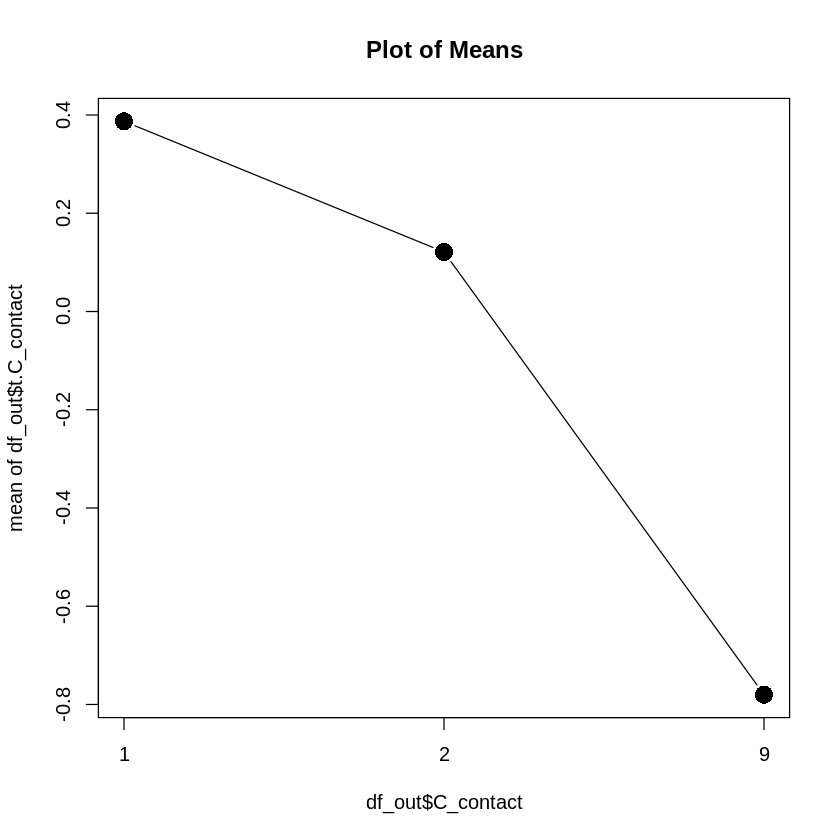

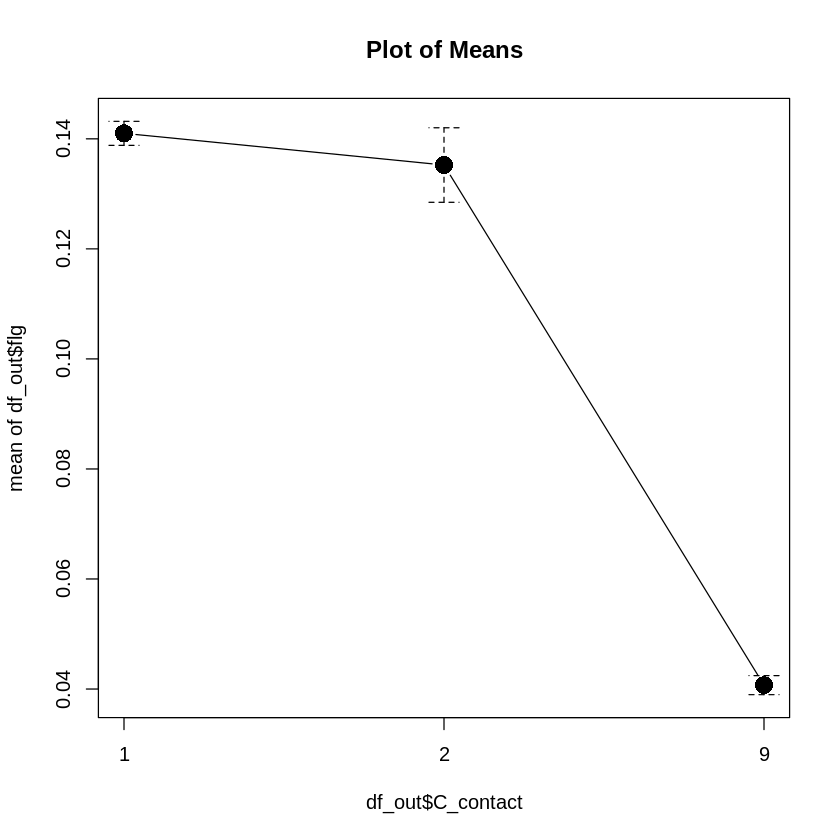

In [ ]:
plotMeans(df_out$t.C_contact,df_out$C_contact,error.bars="se")
plotMeans(df_out$flg,df_out$C_contact,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeter

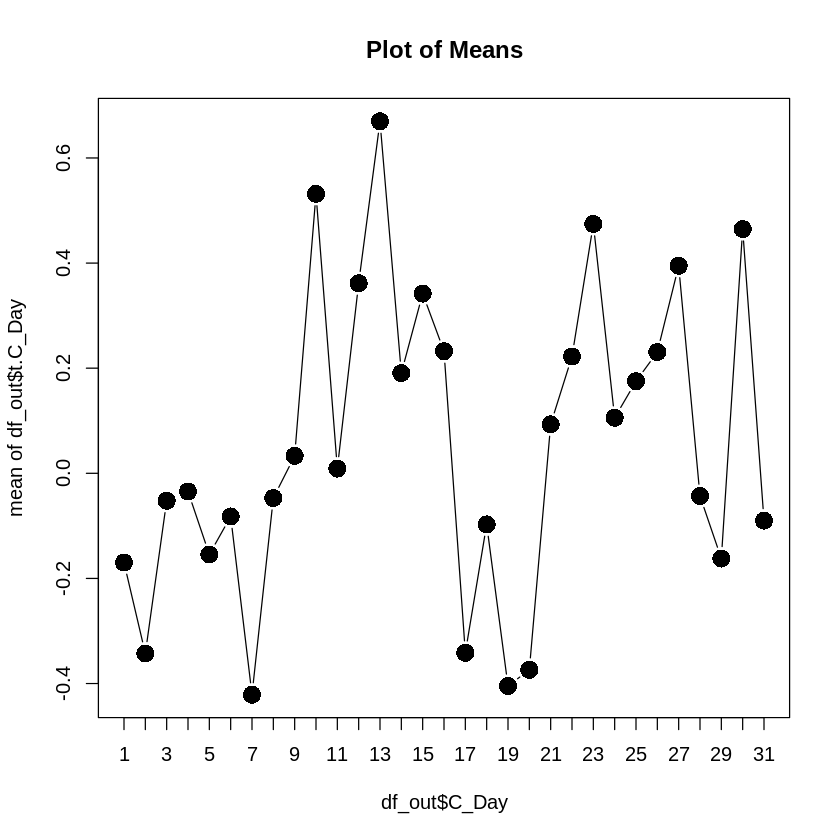

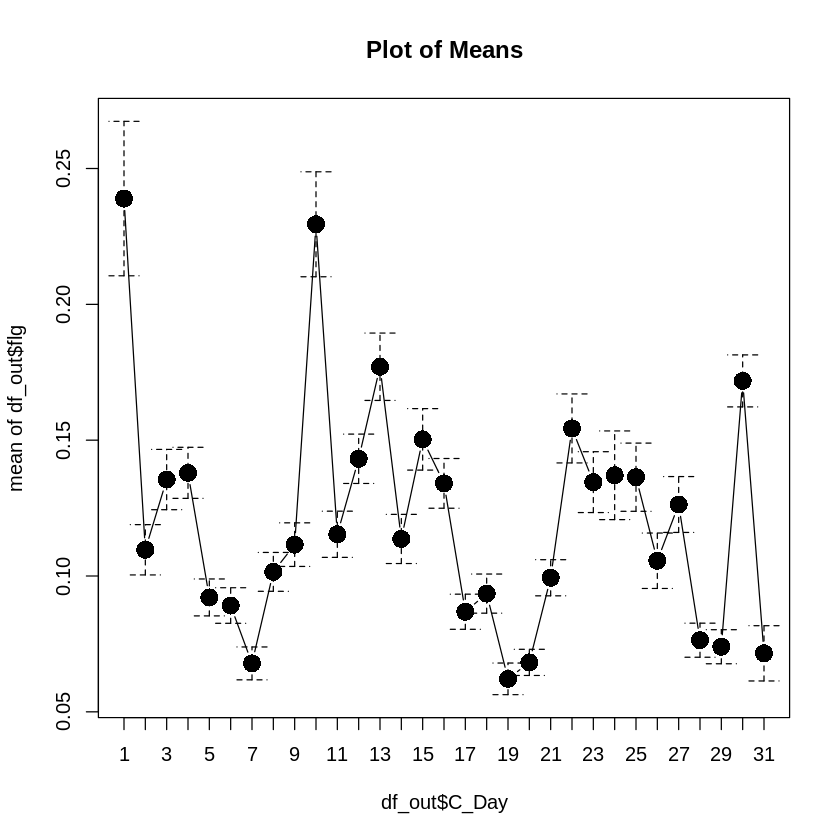

In [ ]:
plotMeans(df_out$t.C_Day,df_out$C_Day,error.bars="se")
plotMeans(df_out$flg,df_out$C_Day,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeter

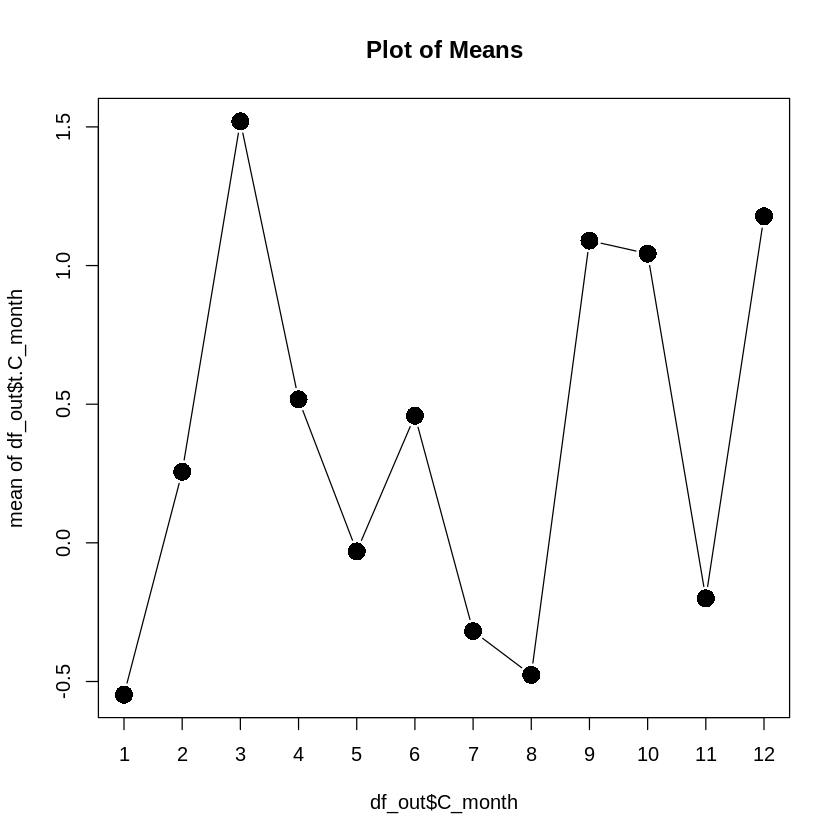

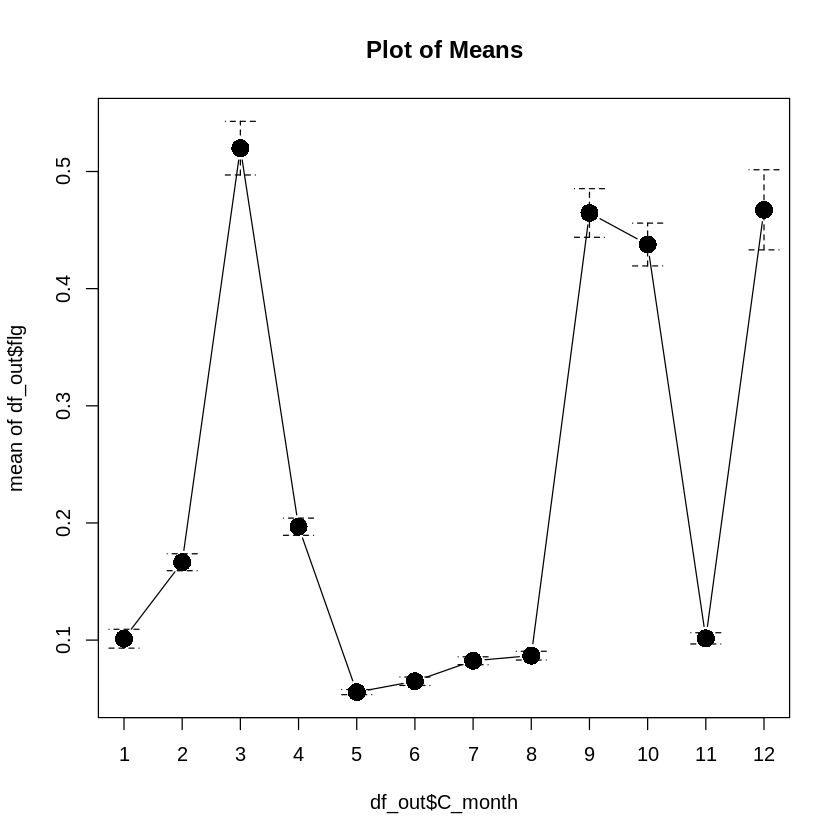

In [ ]:
plotMeans(df_out$t.C_month,df_out$C_month,error.bars="se")
plotMeans(df_out$flg,df_out$C_month,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeter

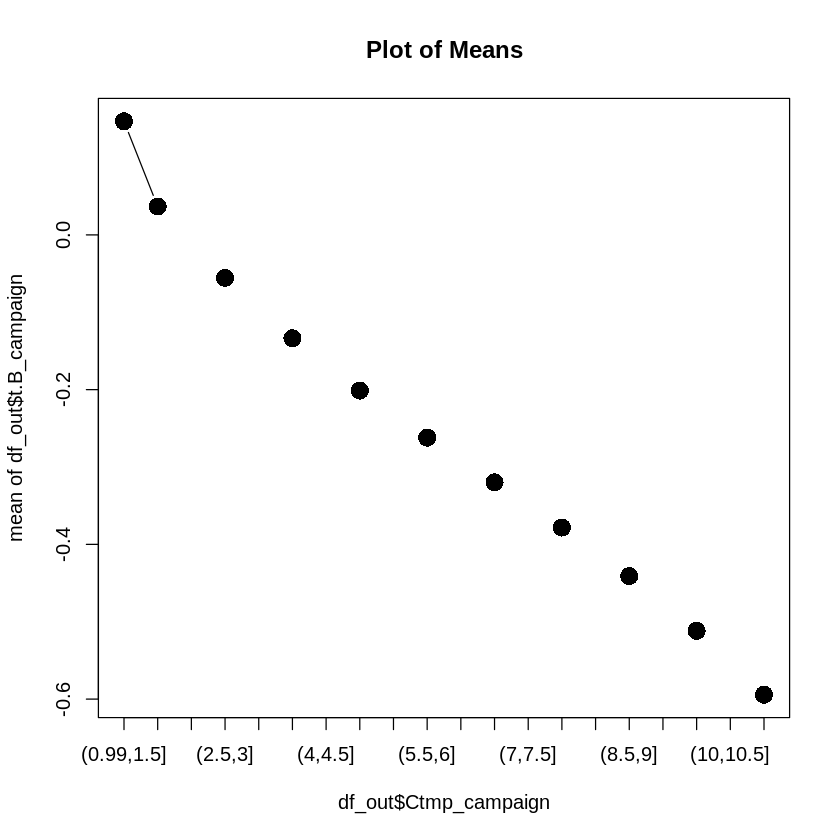

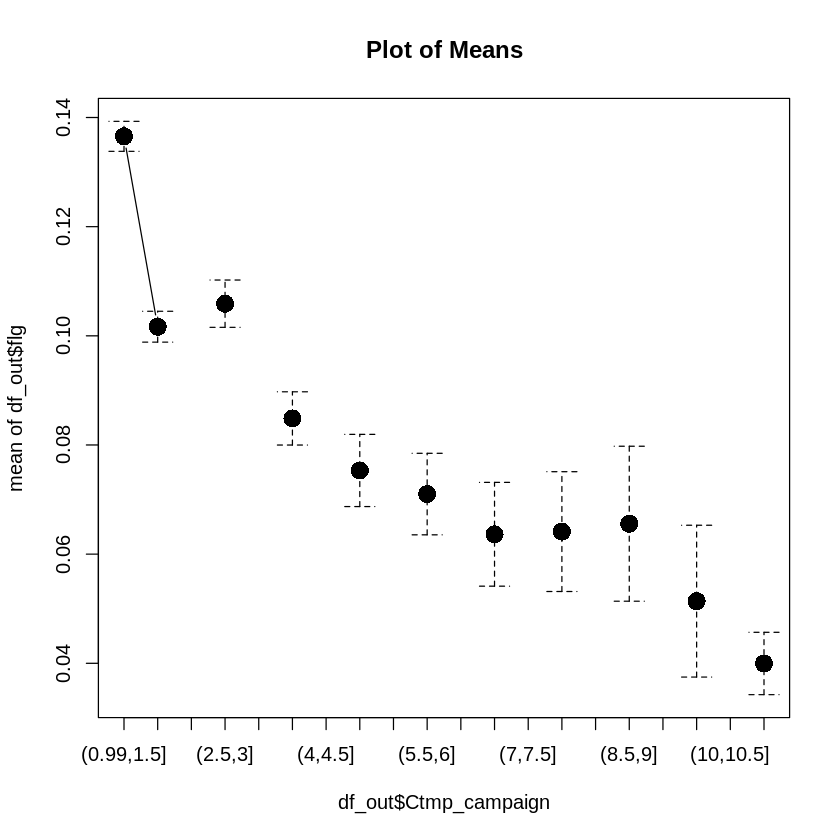

In [ ]:
df_out$Ctmp_campaign <- bin.var(df_out$campaign_11,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_campaign,df_out$Ctmp_campaign,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_campaign,error.bars="se")

Warning message in arrows(1:n.levs.1, means[, i] - sds[, i], 1:n.levs.1, means[, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs.1, means[, i] - sds[, i], 1:n.levs.1, means[, :
“zero-length arrow is of indeterminate angle and so skipped”


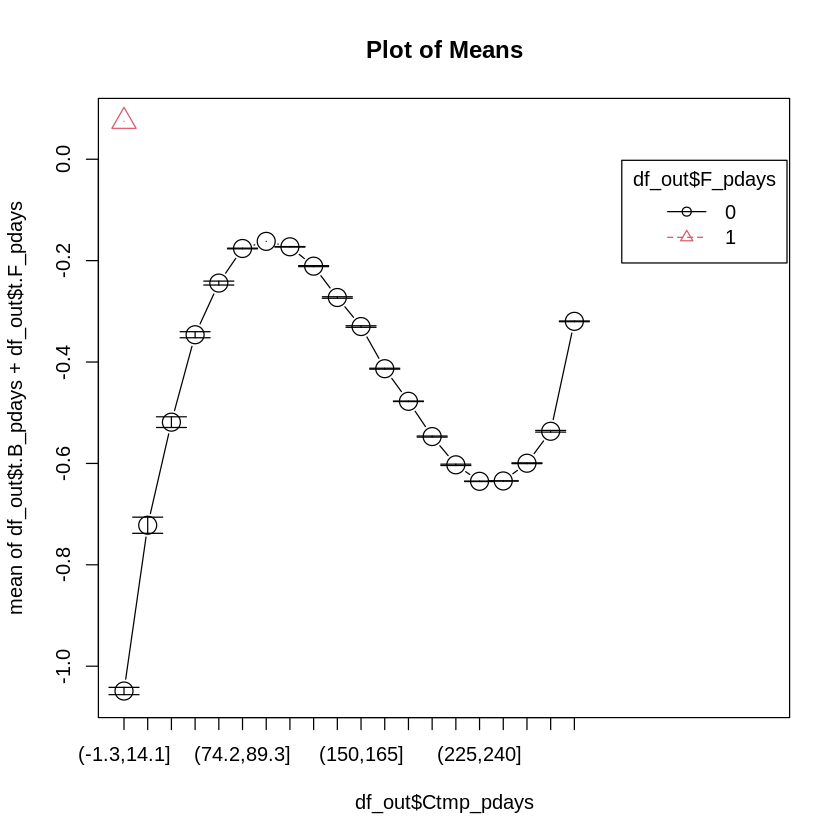

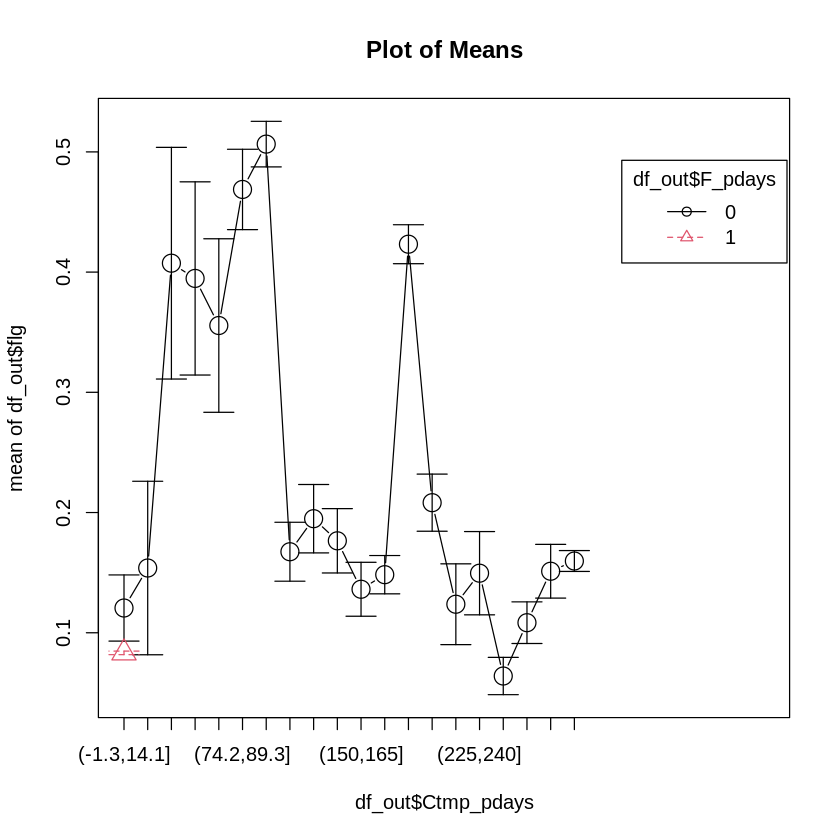

In [ ]:
df_out$Ctmp_pdays <- bin.var(df_out$pdays_300,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_pdays + df_out$t.F_pdays,df_out$Ctmp_pdays,df_out$F_pdays,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_pdays,df_out$F_pdays,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeter

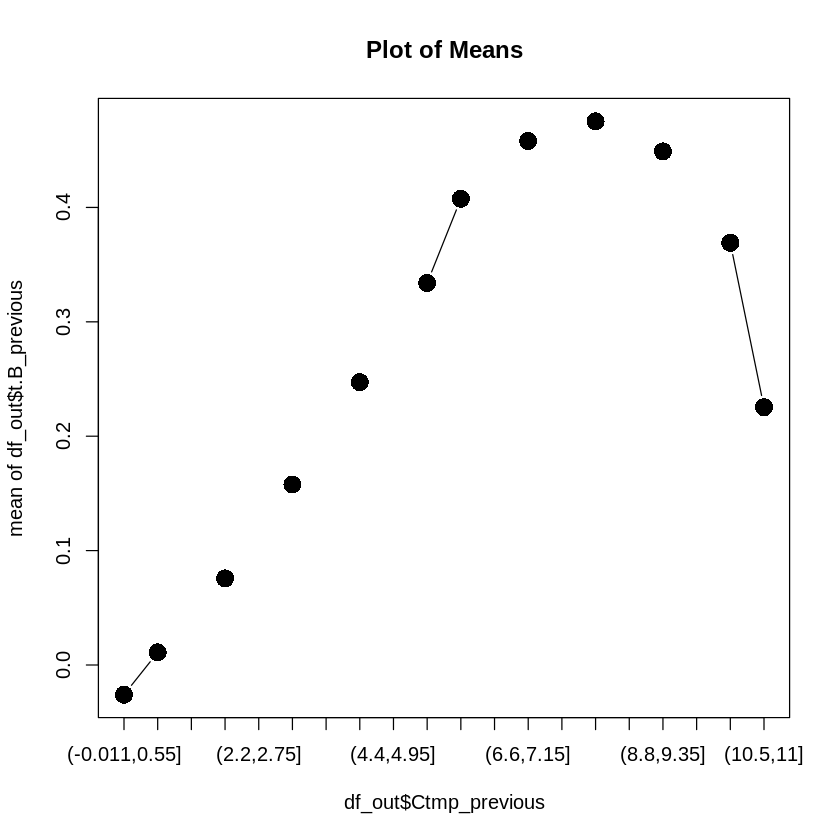

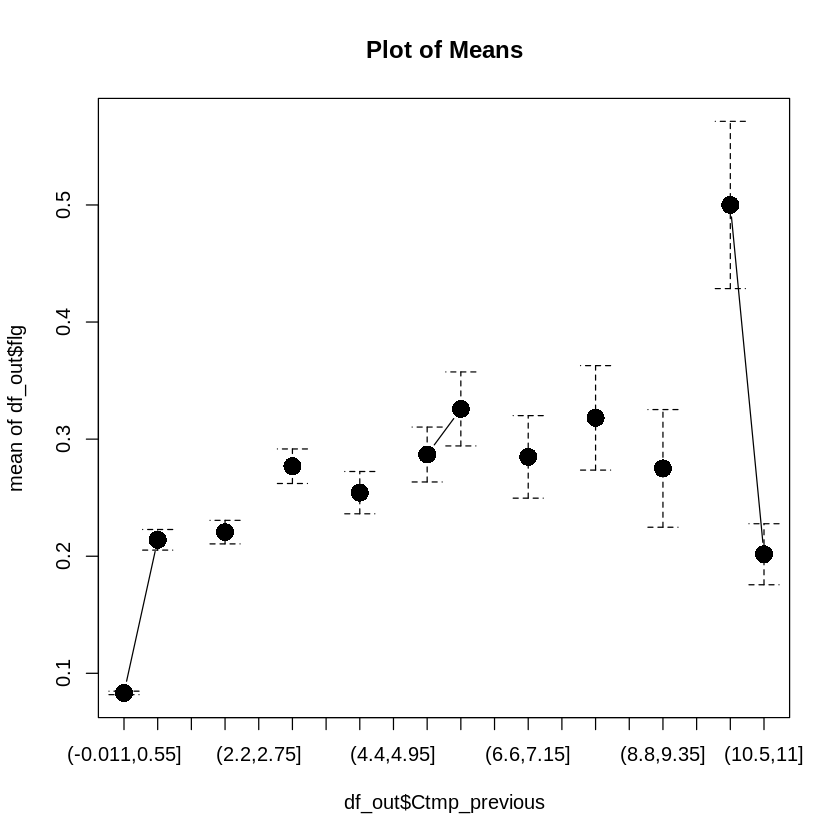

In [ ]:
df_out$Ctmp_previous <- bin.var(df_out$previous_11,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_previous,df_out$Ctmp_previous,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_previous,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


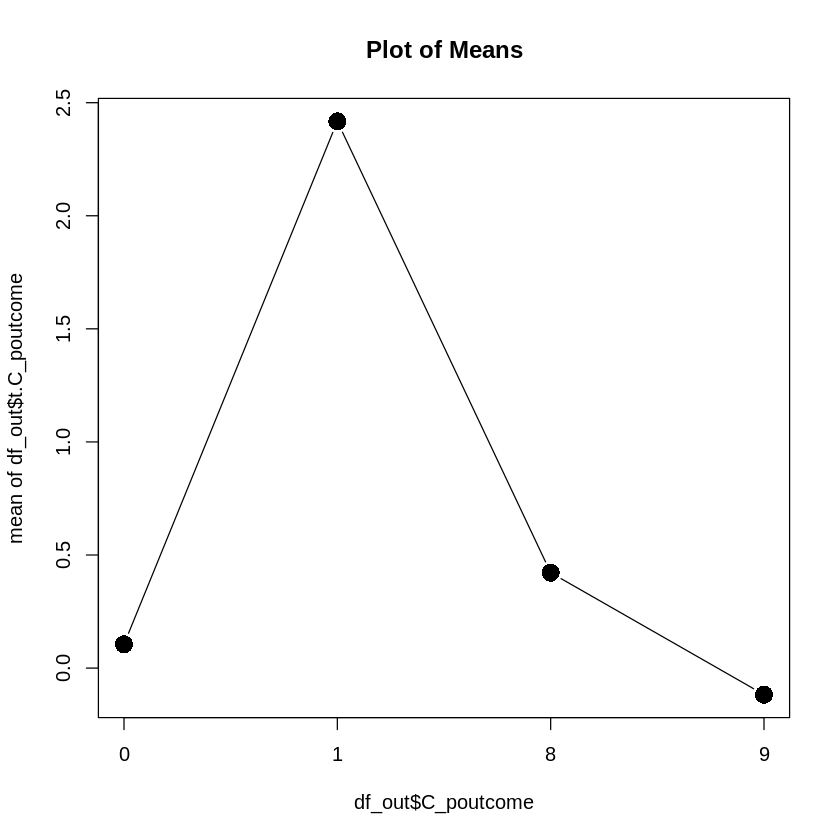

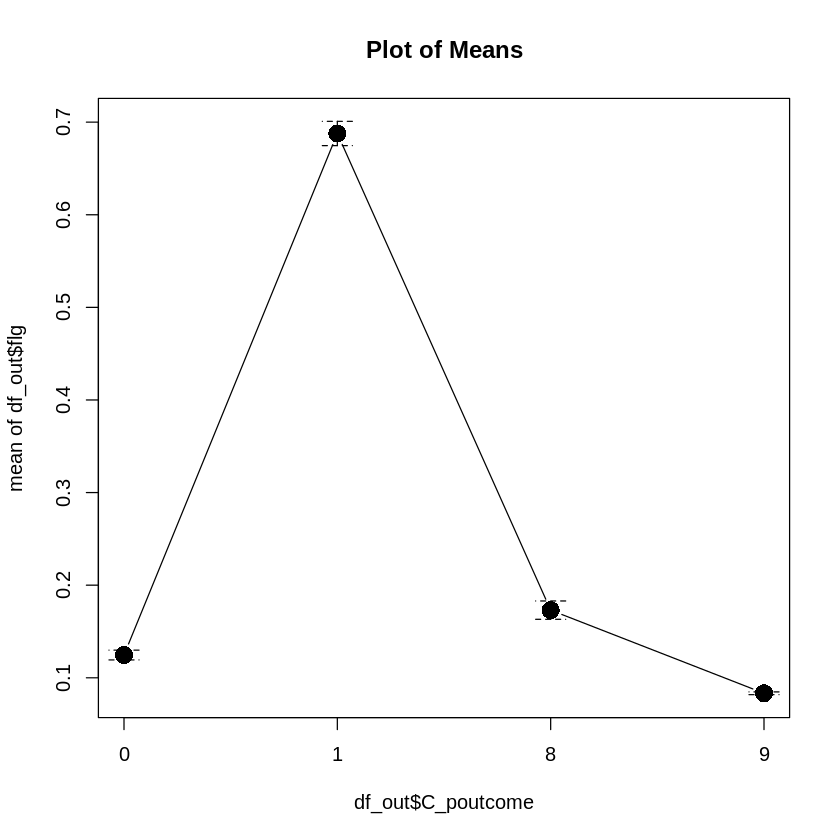

In [ ]:
plotMeans(df_out$t.C_poutcome,df_out$C_poutcome,error.bars="se")
plotMeans(df_out$flg,df_out$C_poutcome,error.bars="se")

# ３．モデル作成３回目

「C_Day」「C_month」いる？  
→　削除してモデル作成

→　モデル２回目より説目力下がる  
  
説明力  
AR　　　CAP20　　CAP30　　CAP70

51.68　　 53.77　　 63.96　　 89.33  

2回目モデルより説明力落ちる






In [ ]:
mbs <- glm(flg ~
            B_age +
            C_job +
            C_dokki +
            C_education +
          #  C_default +
            B_balance +
            C_housing +
            C_loan +
            C_contact +
          #  C_Day +
          #  C_month +
            B_campaign +
            B_pdays + F_pdays +
            B_previous +
            C_poutcome
            , data=df,family=binomial(link=logit))

In [ ]:

llrt <- function(mfull,m){
  loglik_full <- sum(mfull$y * log(mfull$fitted.values) + (1 - mfull$y) * log(1-mfull$fitted.values))
  logLik_dvar <- sum(m$y * log(m$fitted.values) + (1 - m$y) * log(1-m$fitted.values))
  chisq <- -2 * (logLik_dvar  - loglik_full)   
  df <- summary(mfull)$df[1] - summary(m)$df[1]
  p <- 1- pchisq(chisq,df)
  round(c(chisq , df ,p ),3)
  } 

  mbs_pdays <- glm(flg ~
            B_age +
            C_job +
            C_dokki +
            C_education +
           # C_default +
            B_balance +
            C_housing +
            C_loan +
            C_contact +
          #  C_Day +
          #  C_month +
            B_campaign +
           # B_pdays + F_pdays +
            B_previous +
            C_poutcome
            , data=df,family=binomial(link=logit))

llrt(mbs,mbs_pdays)   

[1] 33.291  4.000  0.000

In [ ]:
Anova(mbs)

,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
B_age,114.9627323,3,9.377953e-25
C_job,43.9457976,8,5.825328e-07
C_dokki,41.3159696,2,1.067459e-09
C_education,21.2939530,3,9.146733e-05
B_balance,145.4519669,3,2.522099e-31
C_housing,189.3442397,1,4.420492e-43
C_loan,68.0322223,1,1.608455e-16
C_contact,337.8861979,2,4.255439e-74
B_campaign,144.4377292,3,4.173517e-31


In [ ]:
library(ROCR)

df_out <- data.frame(df,p=predict(mbs,type="response"),t=predict(mbs,type="terms"))

d_arcap <- df_out

#目的変数名
targetName <- "flg"
targetPred <- d_arcap[,targetName]

#ソートする変数、予測確率、GNO、CR
sortName <- "p"
sortPred <- d_arcap[,sortName]

#ARの計算
pred <- prediction(sortPred,targetPred)
AUC <- as.numeric( performance(pred,"auc")@y.values )
AR <- 2 *(AUC-0.5) * 100 #AR値

#CAP値の計算
#予測確率（GNO、CR）を照準に件数等分１０分類
d_arcap$CP10 <- bin.var( sortPred, bins=10, method='proportions',labels =FALSE)

#区分別のデフォルト件数
dcount <- tapply(targetPred,list(CP10=d_arcap$CP10),sum,na.rm=TRUE)

#CAP20値
CAP20 <- sum(dcount[9:10]) / sum(dcount) * 100

#CAP30値
CAP30 <- sum(dcount[8:10]) / sum(dcount) * 100

#CAP70値
CAP70 <- sum(dcount[4:10]) / sum(dcount) * 100

#結果
round(c(AR,CAP20,CAP30,CAP70),2)

[1] 51.68 53.77 63.96 89.33

# ４．モデル作成４回目


「C_Day」「C_month」削除ではなく、
違う投入方法検討  
  
説明力  
AR　　　CAP20　　CAP30　　CAP70

53.44 　　55.63　　 65.17 　　89.67






In [ ]:
#最終連絡月　3・9・12月 / それ以外　の２区分(基礎集計グラフから)
df$C_month_02 <- Recode(df$C_month,'3 = 1 ;9 = 1 ; 12 = 1 ; else=0')

In [ ]:
#最終連絡日付　1・10・20・30・31日 / それ以外　の２区分(基礎集計グラフから)
df$C_Day_02 <- Recode(df$C_Day,'1 = 1 ; 10 = 1 ; 20 = 1 ; 30 = 1 ; 31 = 1 ; else=0')

In [ ]:
mbs <- glm(flg ~
            B_age +
            C_job +
            C_dokki +
            C_education +
          #  C_default +
            B_balance +
            C_housing +
            C_loan +
            C_contact +
            C_Day_02 +
            C_month_02 +
            B_campaign +
            B_pdays + F_pdays +
            B_previous +
            C_poutcome
            , data=df,family=binomial(link=logit))

In [ ]:

llrt <- function(mfull,m){
  loglik_full <- sum(mfull$y * log(mfull$fitted.values) + (1 - mfull$y) * log(1-mfull$fitted.values))
  logLik_dvar <- sum(m$y * log(m$fitted.values) + (1 - m$y) * log(1-m$fitted.values))
  chisq <- -2 * (logLik_dvar  - loglik_full)   
  df <- summary(mfull)$df[1] - summary(m)$df[1]
  p <- 1- pchisq(chisq,df)
  round(c(chisq , df ,p ),3)
  } 

  mbs_pdays <- glm(flg ~
            B_age +
            C_job +
            C_dokki +
            C_education +
           # C_default +
            B_balance +
            C_housing +
            C_loan +
            C_contact +
            C_Day_02 +
            C_month_02 +
            B_campaign +
           # B_pdays + F_pdays +
            B_previous +
            C_poutcome
            , data=df,family=binomial(link=logit))

llrt(mbs,mbs_pdays)   

[1] 30.119  4.000  0.000

In [ ]:
Anova(mbs)

,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
B_age,86.86243284,3,1.033557e-18
C_job,28.66368130,8,3.631933e-04
C_dokki,41.91779791,2,7.900705e-10
C_education,19.55740041,3,2.096379e-04
B_balance,124.45417378,3,8.472524e-27
C_housing,145.71312695,1,1.499879e-33
C_loan,55.26931955,1,1.050962e-13
C_contact,309.66162051,2,5.725764e-68
C_Day_02,5.45954799,1,1.946168e-02


In [ ]:
library(ROCR)

df_out <- data.frame(df,p=predict(mbs,type="response"),t=predict(mbs,type="terms"))

d_arcap <- df_out

#目的変数名
targetName <- "flg"
targetPred <- d_arcap[,targetName]

#ソートする変数、予測確率、GNO、CR
sortName <- "p"
sortPred <- d_arcap[,sortName]

#ARの計算
pred <- prediction(sortPred,targetPred)
AUC <- as.numeric( performance(pred,"auc")@y.values )
AR <- 2 *(AUC-0.5) * 100 #AR値

#CAP値の計算
#予測確率（GNO、CR）を照準に件数等分１０分類
d_arcap$CP10 <- bin.var( sortPred, bins=10, method='proportions',labels =FALSE)

#区分別のデフォルト件数
dcount <- tapply(targetPred,list(CP10=d_arcap$CP10),sum,na.rm=TRUE)

#CAP20値
CAP20 <- sum(dcount[9:10]) / sum(dcount) * 100

#CAP30値
CAP30 <- sum(dcount[8:10]) / sum(dcount) * 100

#CAP70値
CAP70 <- sum(dcount[4:10]) / sum(dcount) * 100

#結果
round(c(AR,CAP20,CAP30,CAP70),2)

[1] 53.44 55.63 65.17 89.67

## ４‐１．グラフ確認


Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


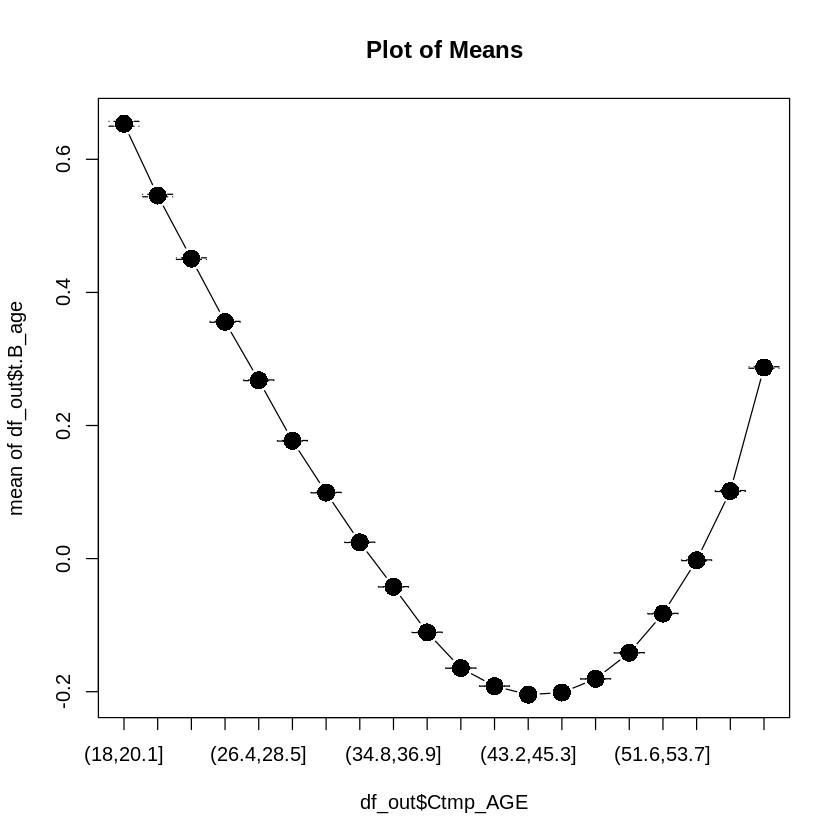

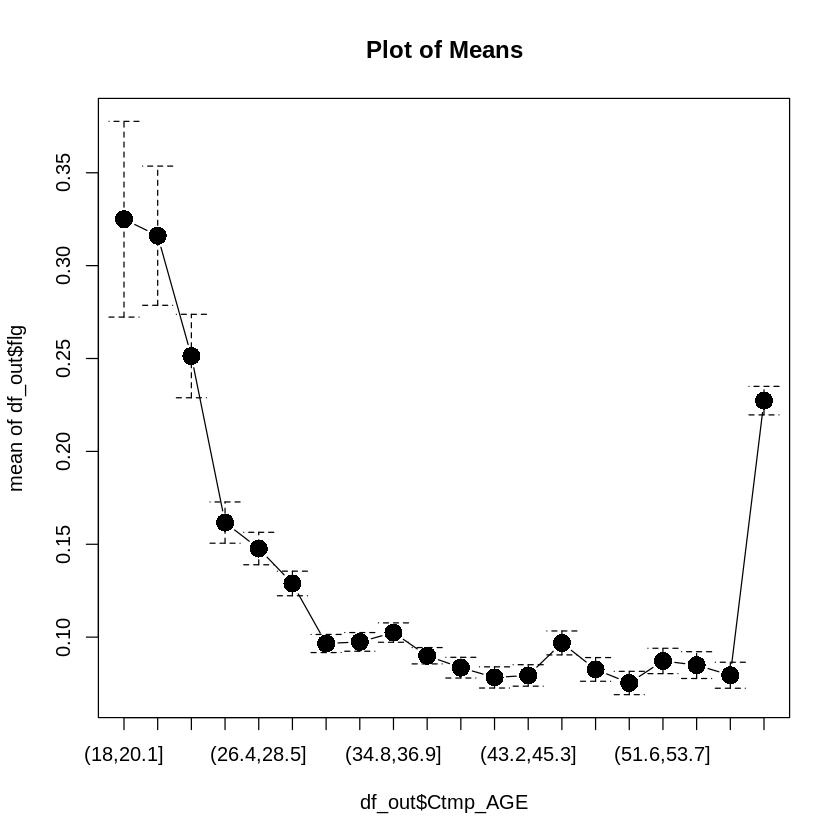

In [ ]:
df_out$Ctmp_AGE <- bin.var(df_out$age_60,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_age,df_out$Ctmp_AGE,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_AGE,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeter

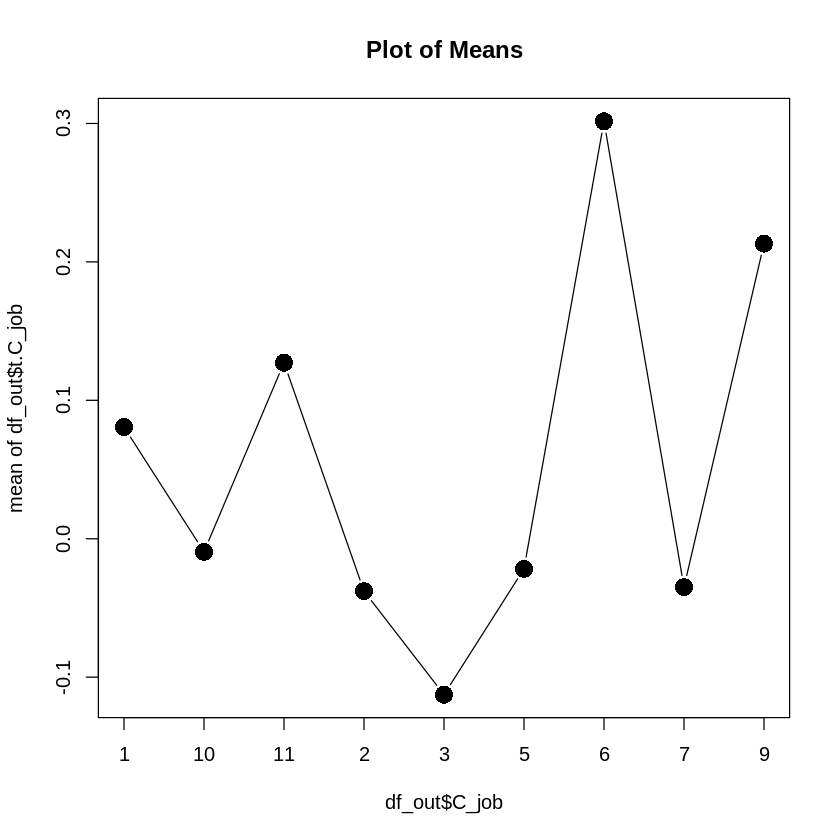

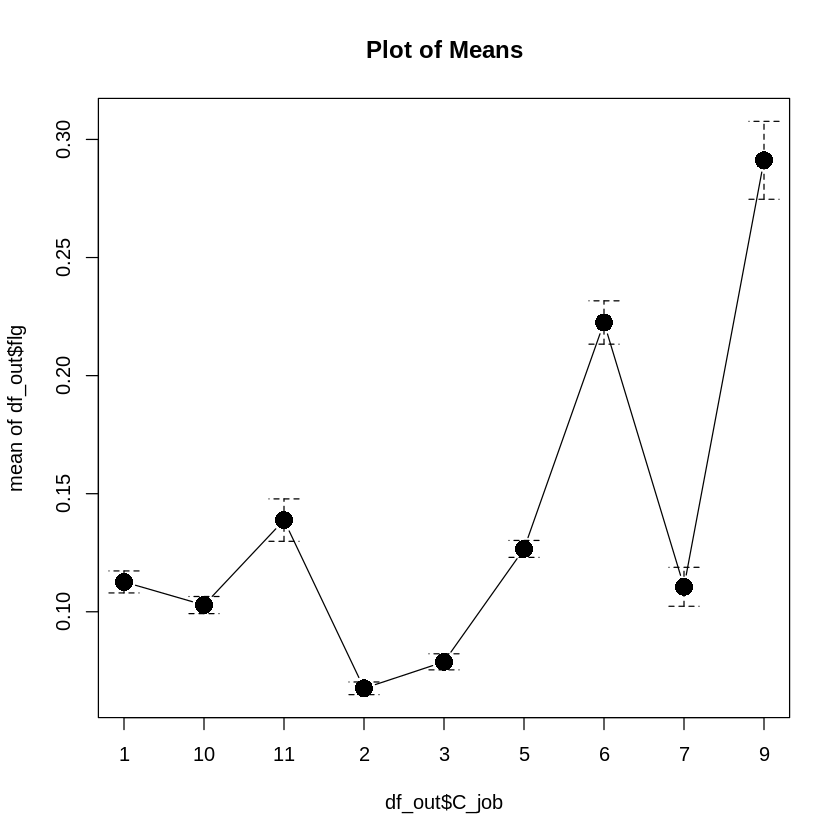

In [ ]:
plotMeans(df_out$t.C_job,df_out$C_job,error.bars="se")
plotMeans(df_out$flg,df_out$C_job,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


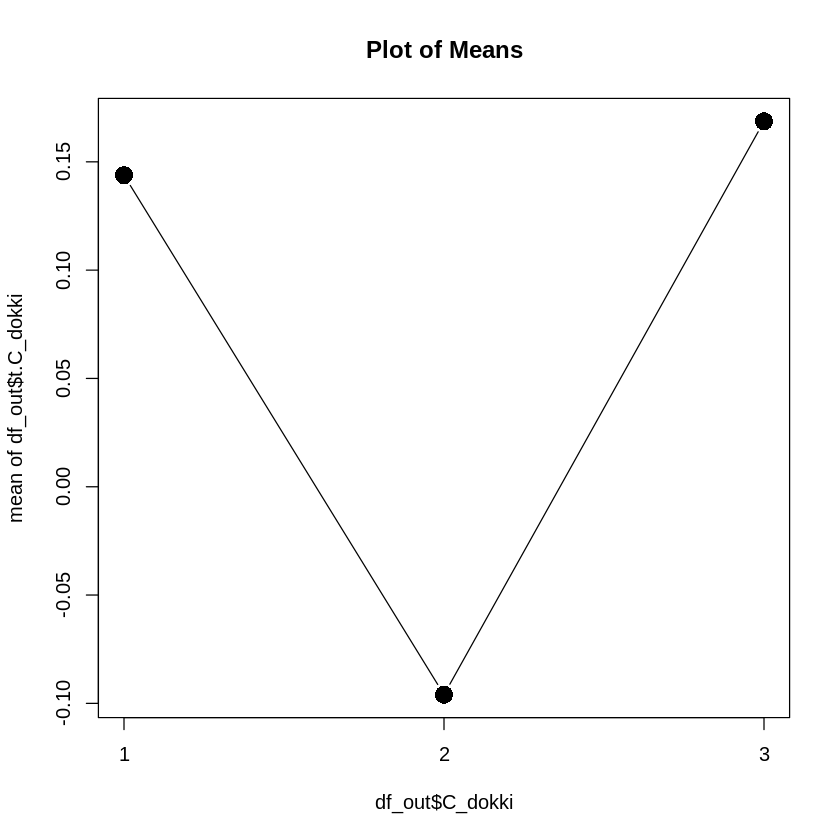

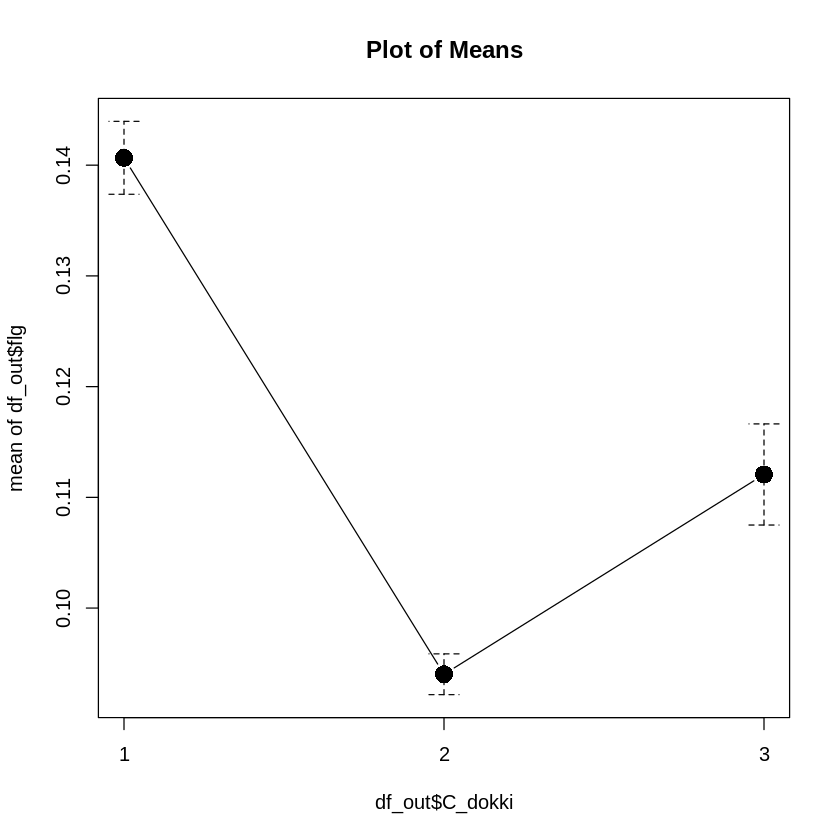

In [ ]:
plotMeans(df_out$t.C_dokki,df_out$C_dokki,error.bars="se")
plotMeans(df_out$flg,df_out$C_dokki,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


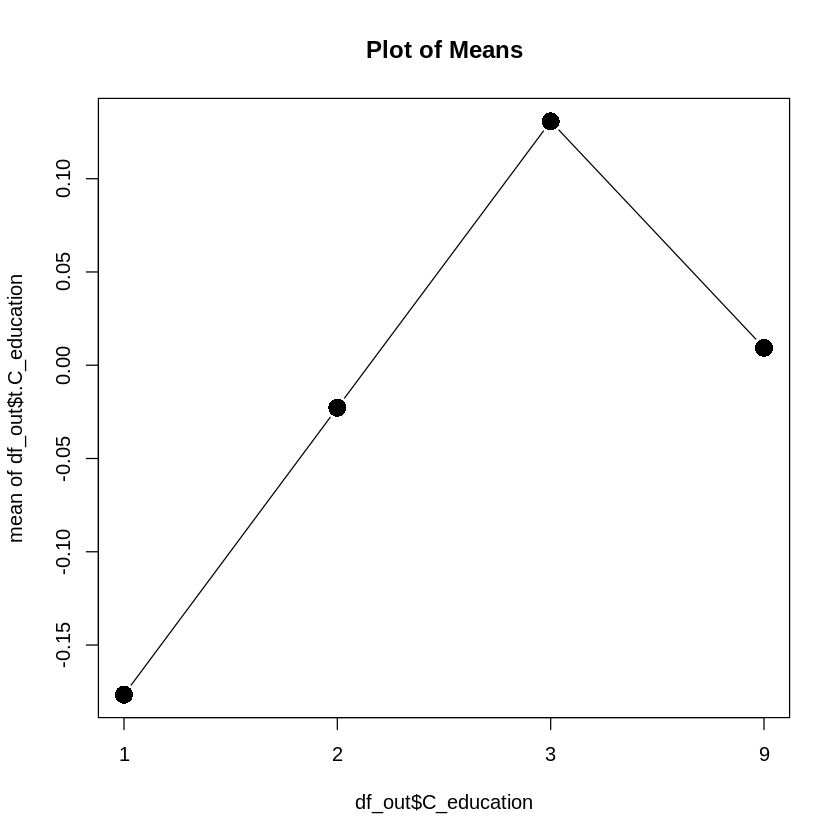

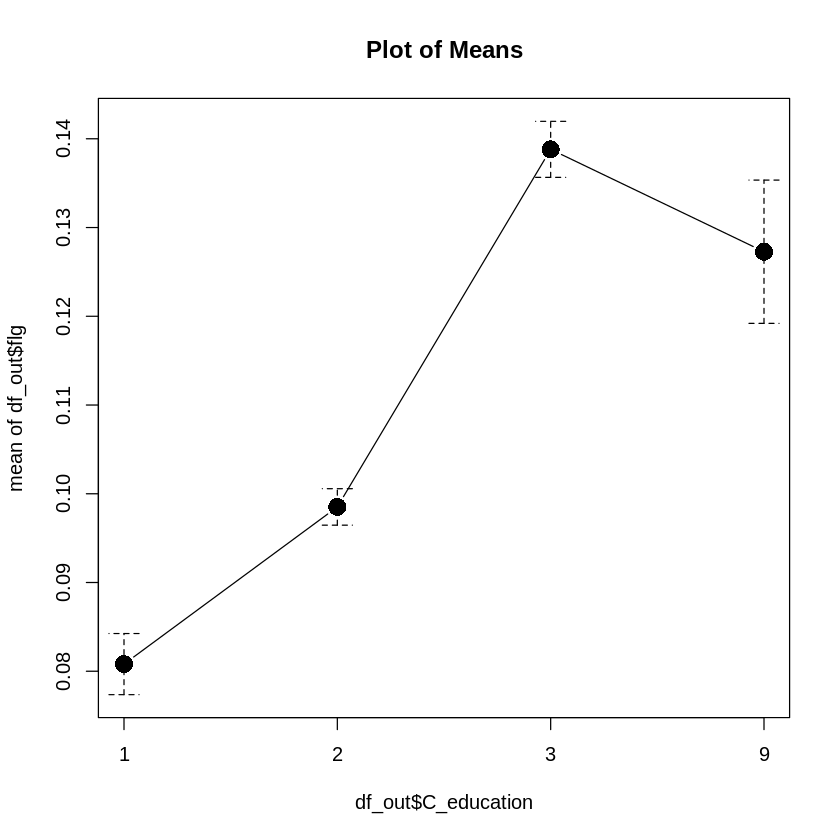

In [ ]:
plotMeans(df_out$t.C_education,df_out$C_education,error.bars="se")
plotMeans(df_out$flg,df_out$C_education,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


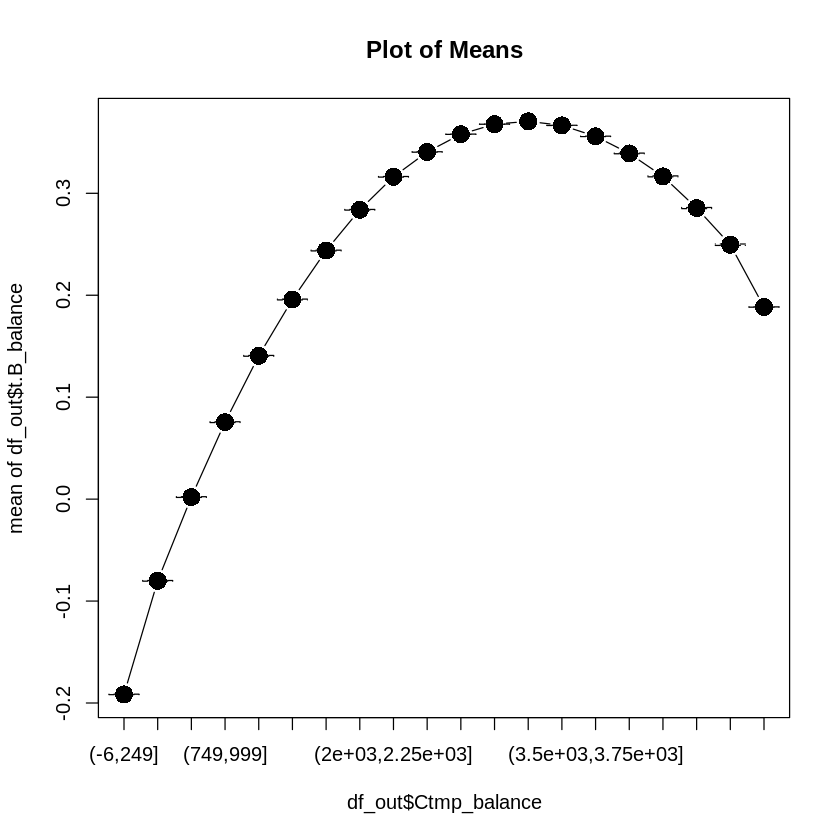

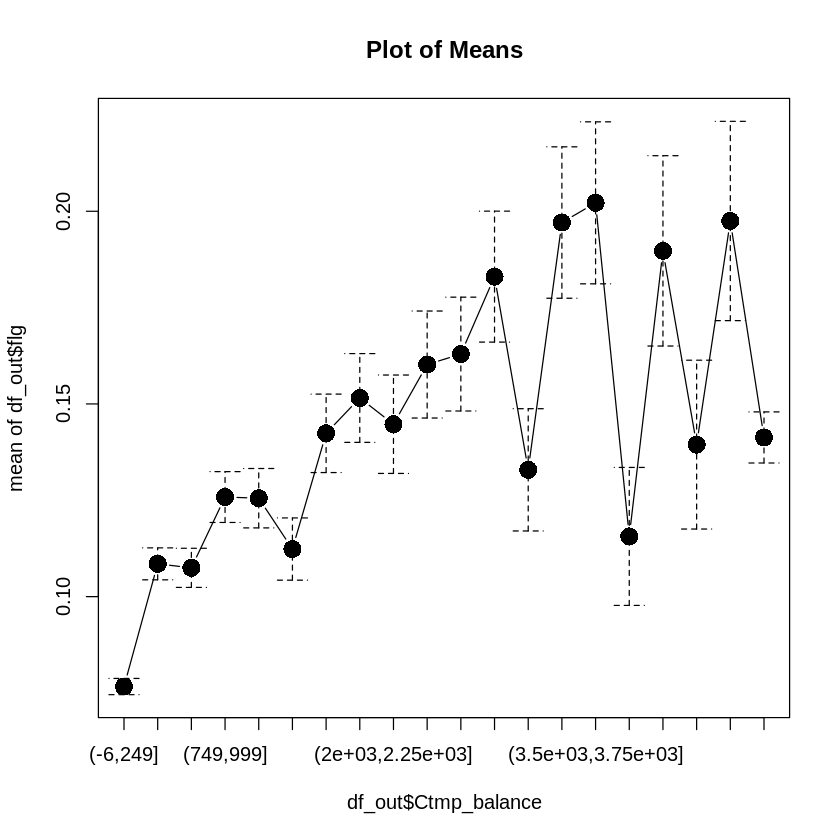

In [ ]:
df_out$Ctmp_balance <- bin.var(df_out$balance_5000,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_balance,df_out$Ctmp_balance,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_balance,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


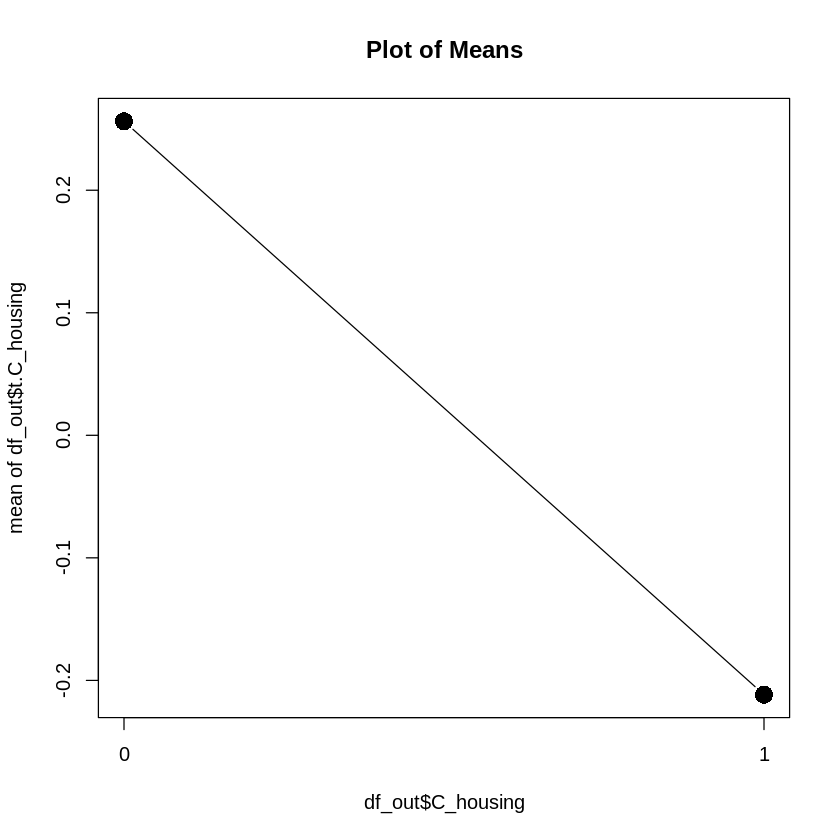

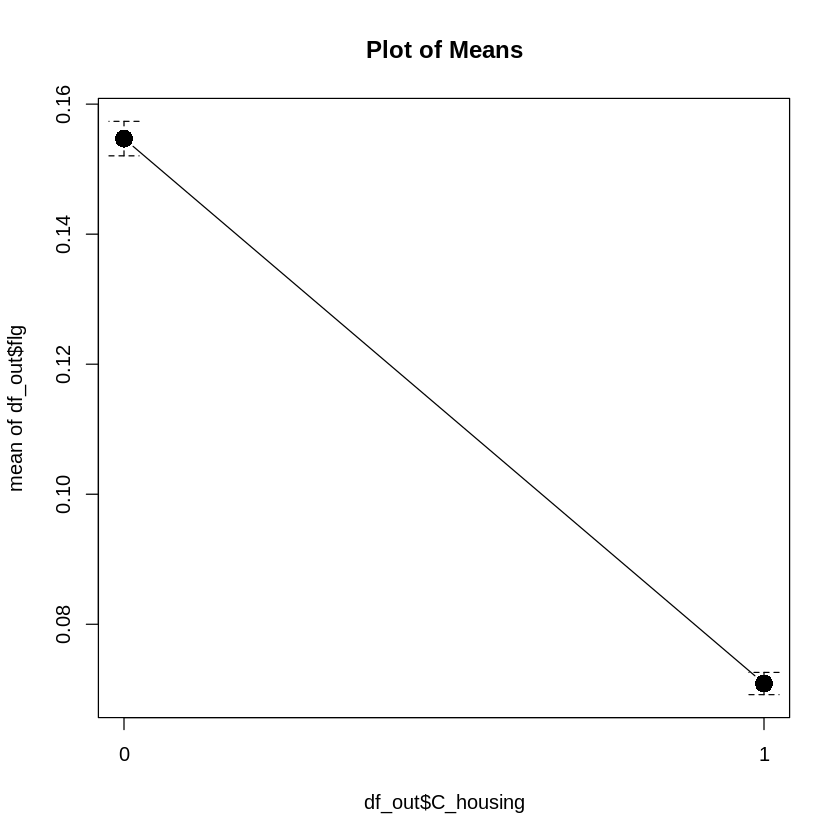

In [ ]:
plotMeans(df_out$t.C_housing,df_out$C_housing,error.bars="se")
plotMeans(df_out$flg,df_out$C_housing,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


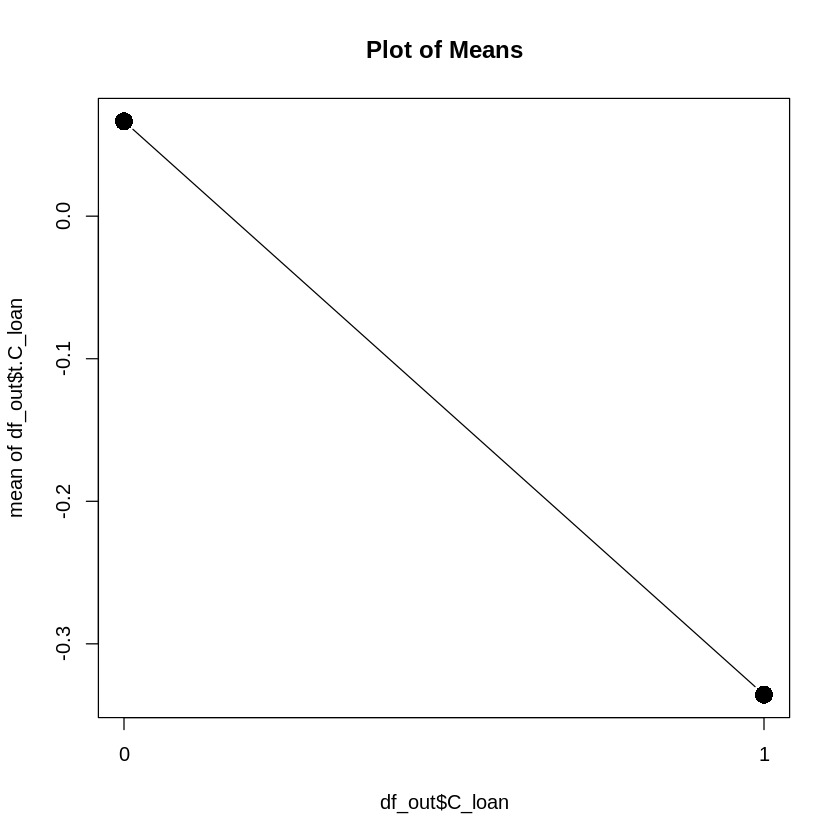

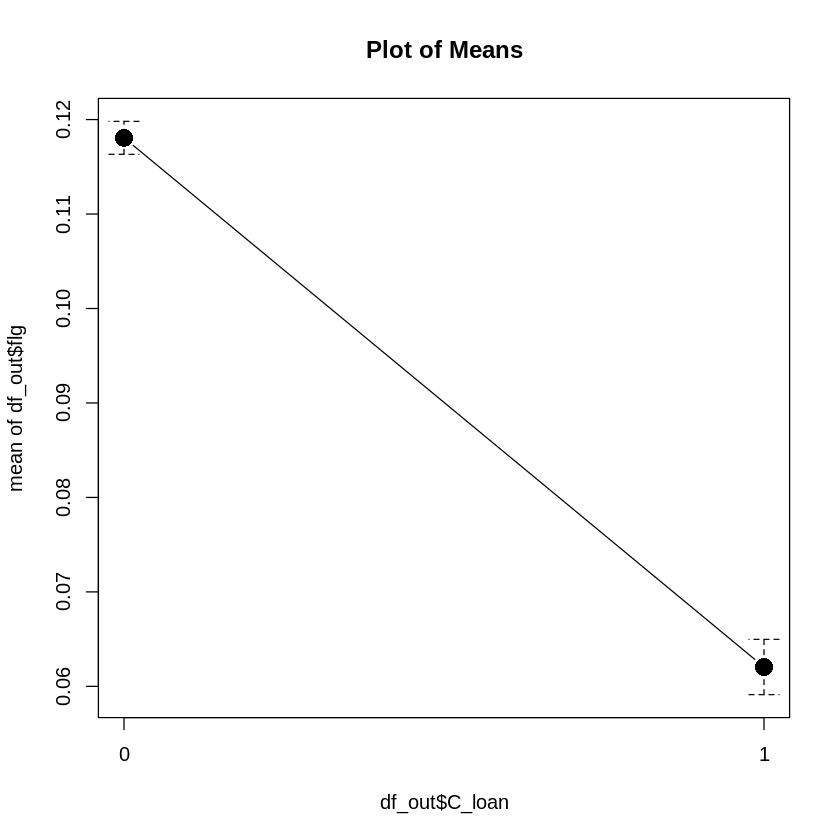

In [ ]:
plotMeans(df_out$t.C_loan,df_out$C_loan,error.bars="se")
plotMeans(df_out$flg,df_out$C_loan,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


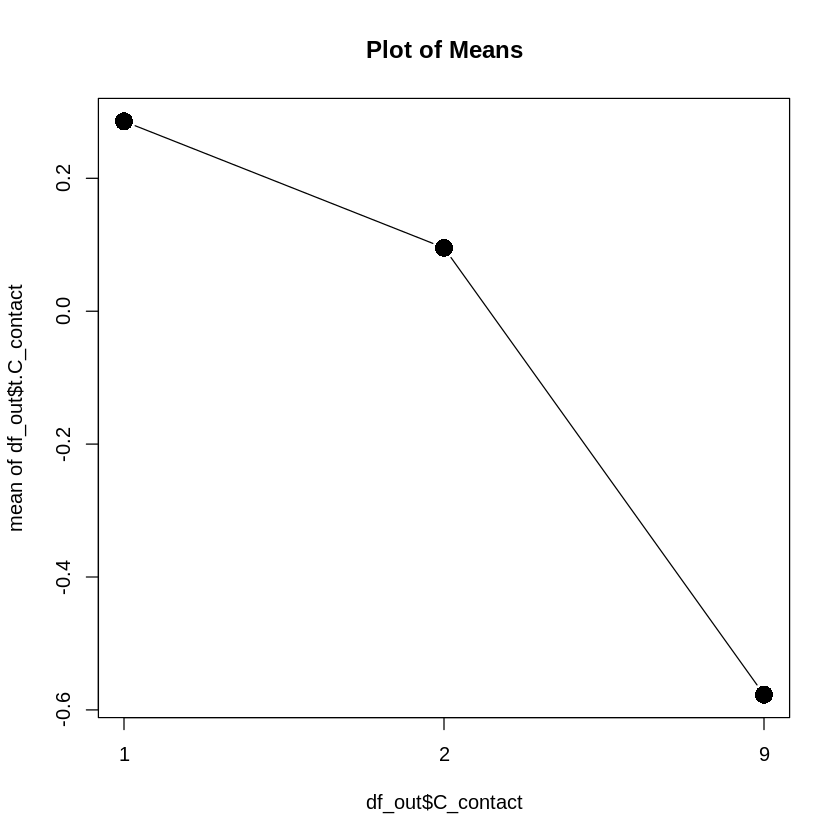

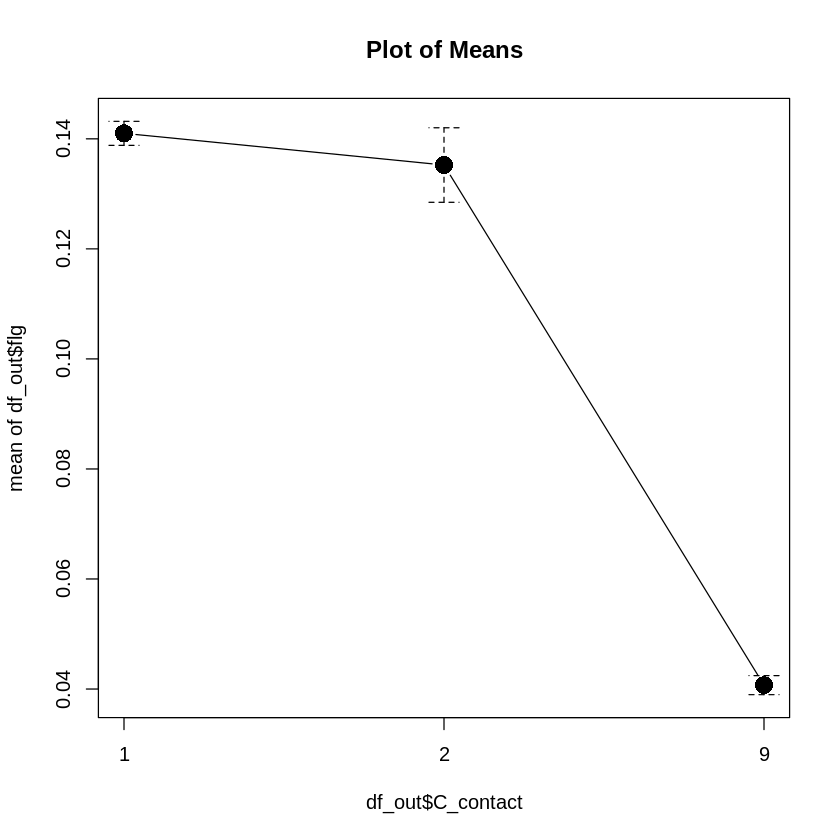

In [ ]:
plotMeans(df_out$t.C_contact,df_out$C_contact,error.bars="se")
plotMeans(df_out$flg,df_out$C_contact,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


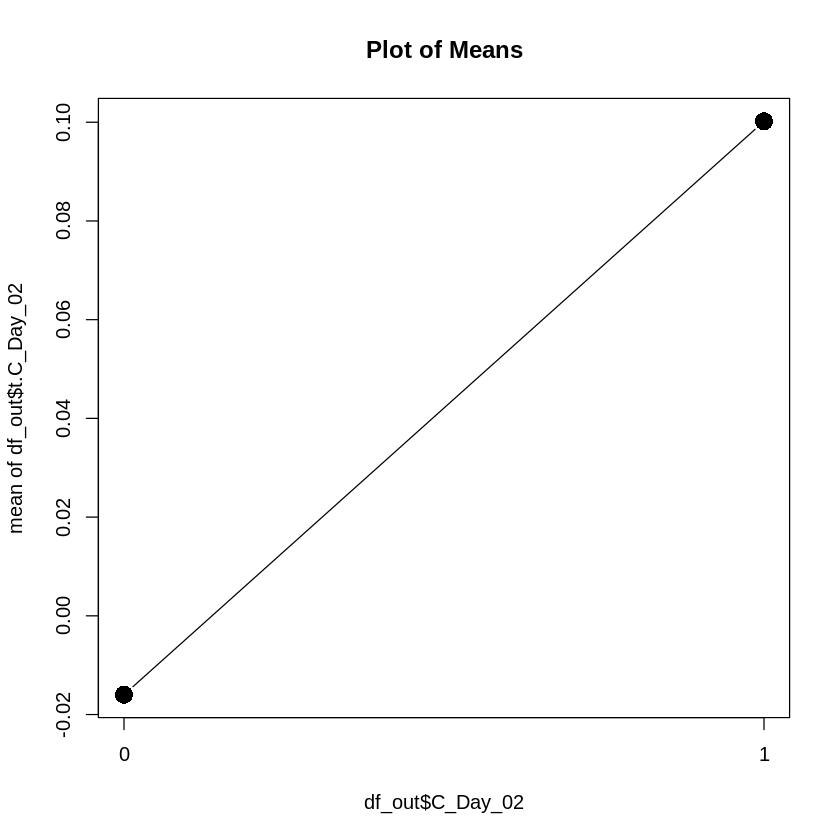

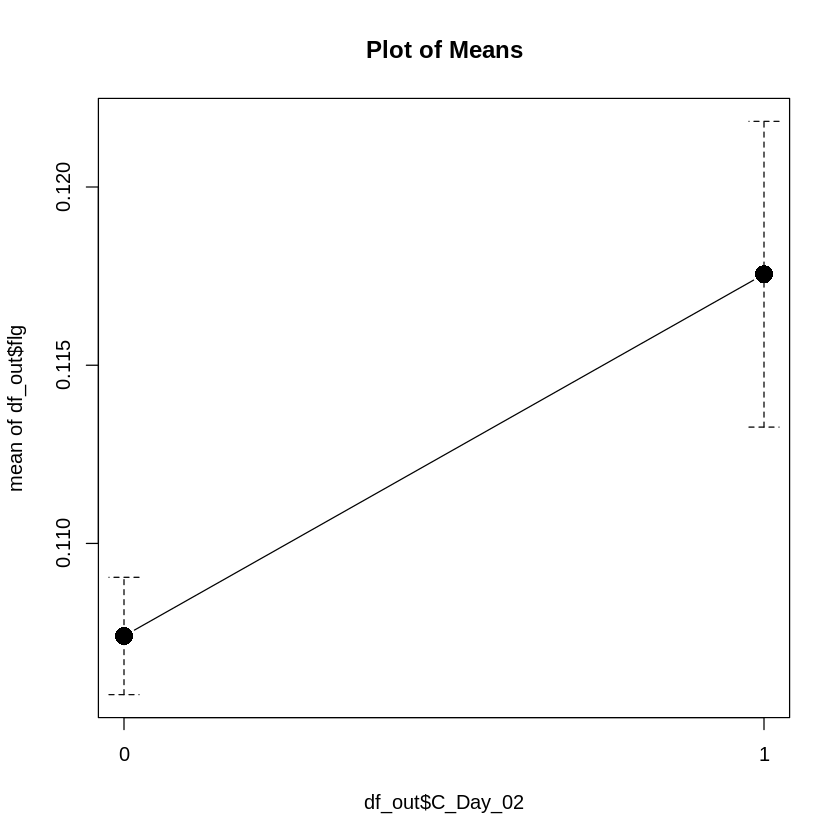

In [ ]:
plotMeans(df_out$t.C_Day_02,df_out$C_Day_02,error.bars="se")
plotMeans(df_out$flg,df_out$C_Day_02,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


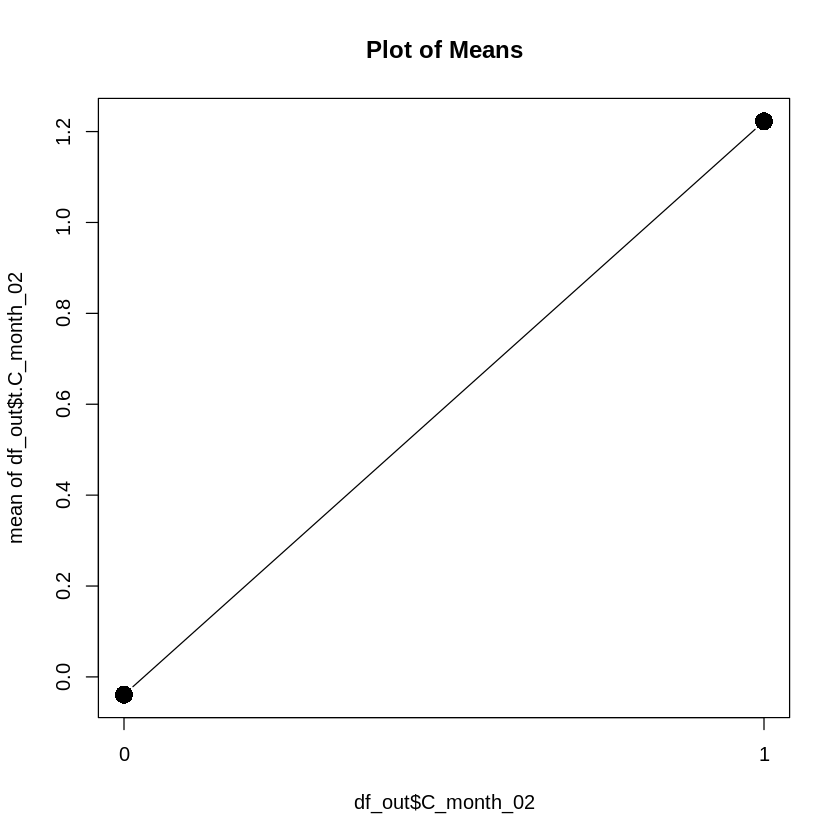

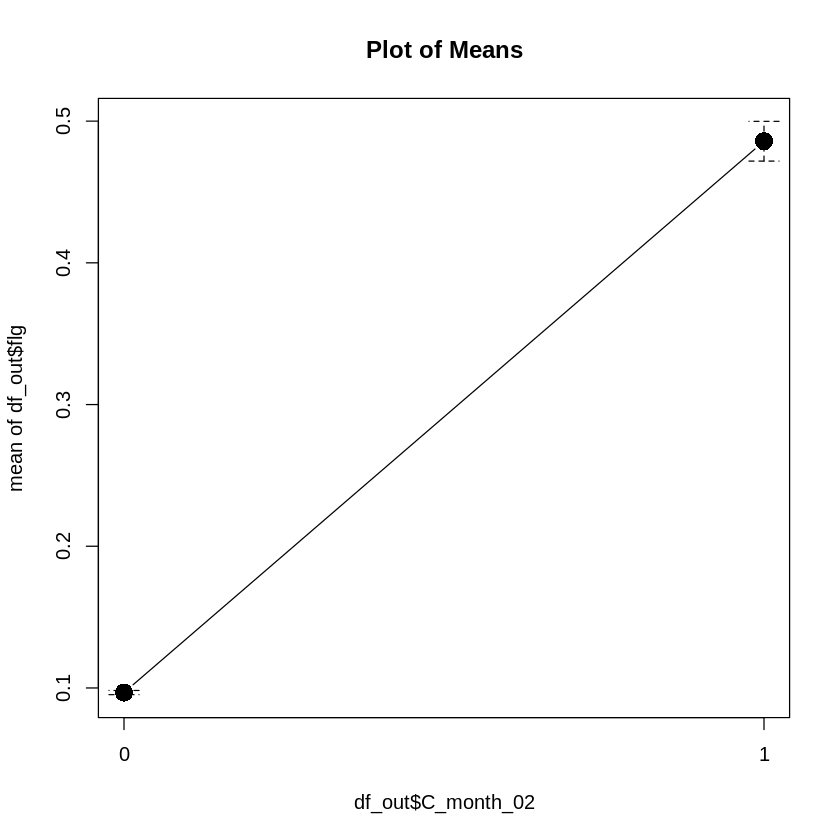

In [ ]:
plotMeans(df_out$t.C_month_02,df_out$C_month_02,error.bars="se")
plotMeans(df_out$flg,df_out$C_month_02,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeter

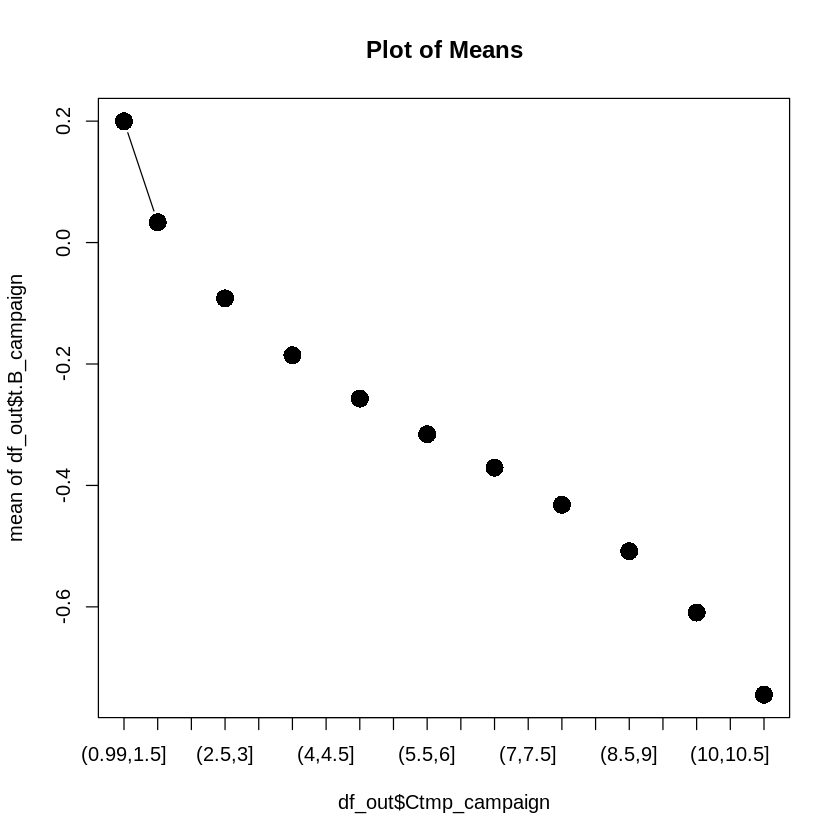

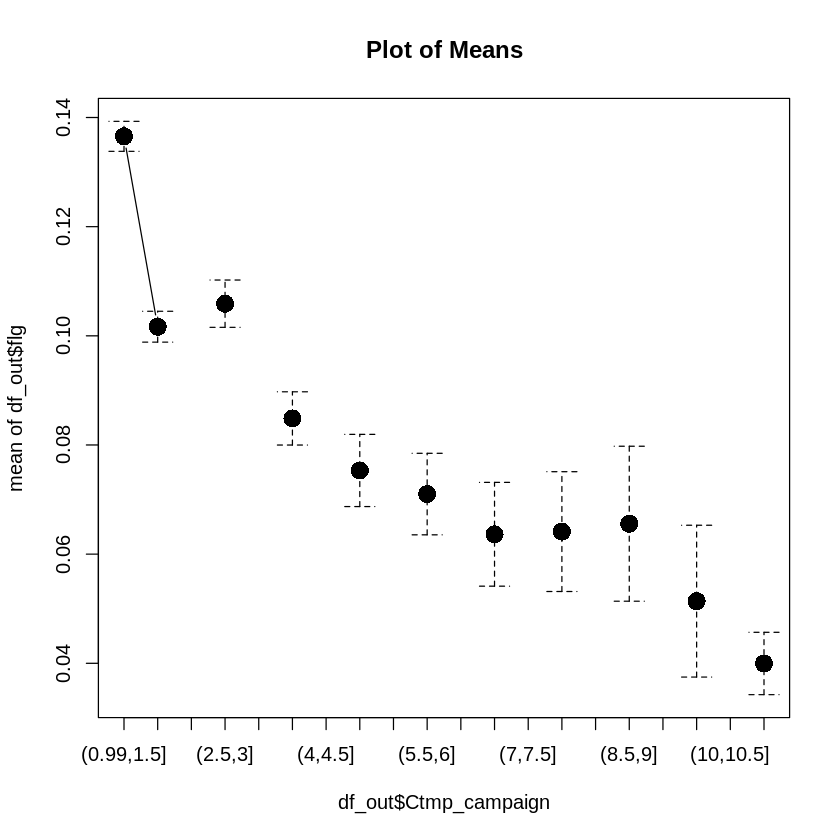

In [ ]:
df_out$Ctmp_campaign <- bin.var(df_out$campaign_11,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_campaign,df_out$Ctmp_campaign,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_campaign,error.bars="se")

Warning message in arrows(1:n.levs.1, means[, i] - sds[, i], 1:n.levs.1, means[, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs.1, means[, i] - sds[, i], 1:n.levs.1, means[, :
“zero-length arrow is of indeterminate angle and so skipped”


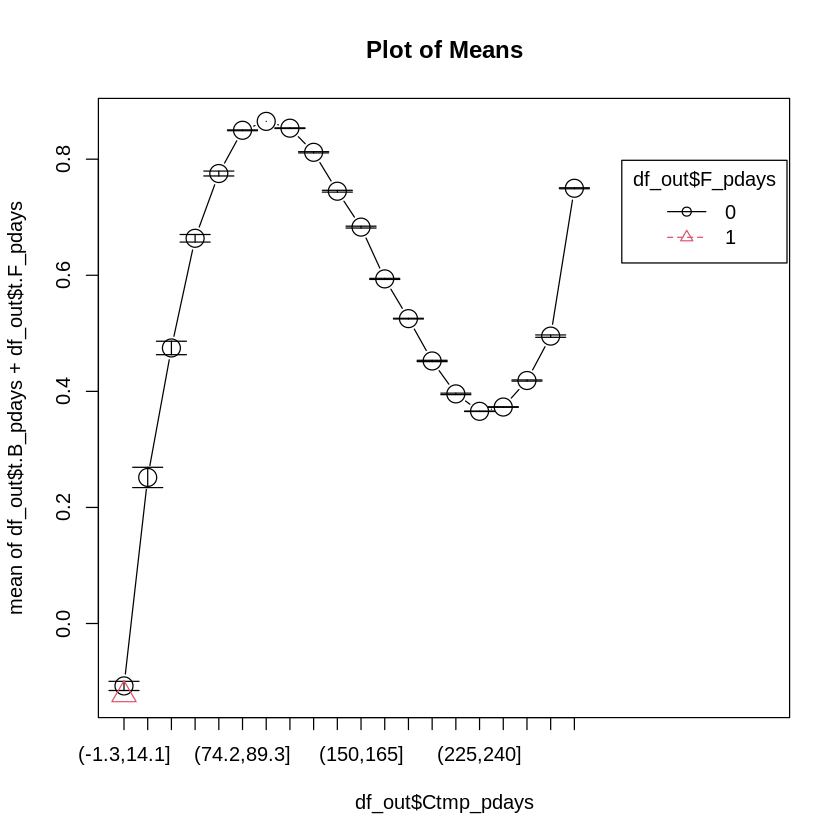

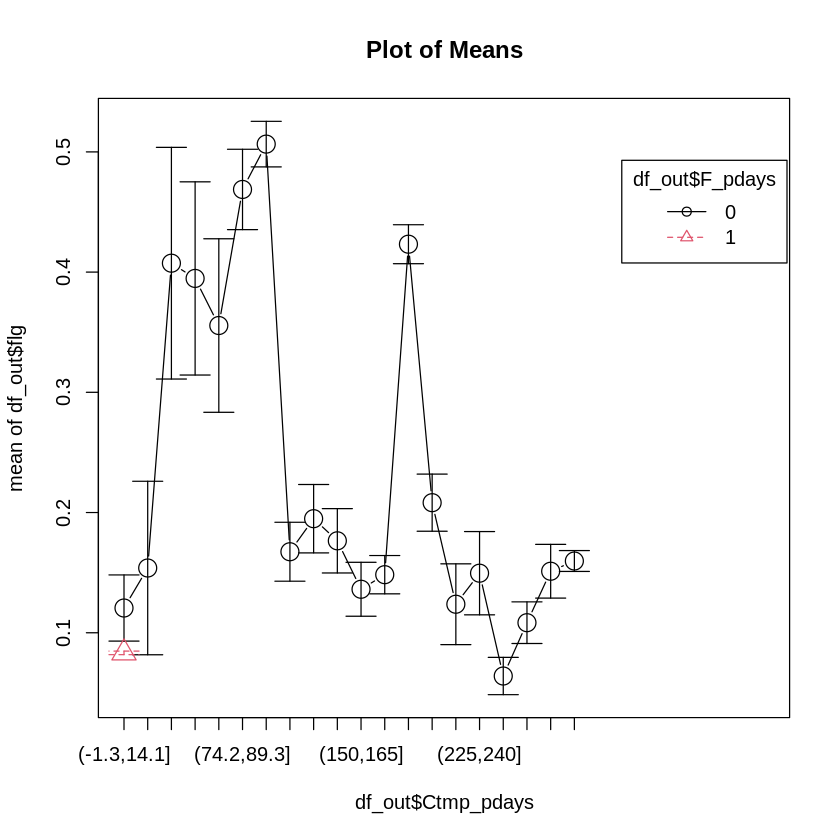

In [ ]:
df_out$Ctmp_pdays <- bin.var(df_out$pdays_300,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_pdays + df_out$t.F_pdays,df_out$Ctmp_pdays,df_out$F_pdays,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_pdays,df_out$F_pdays,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeter

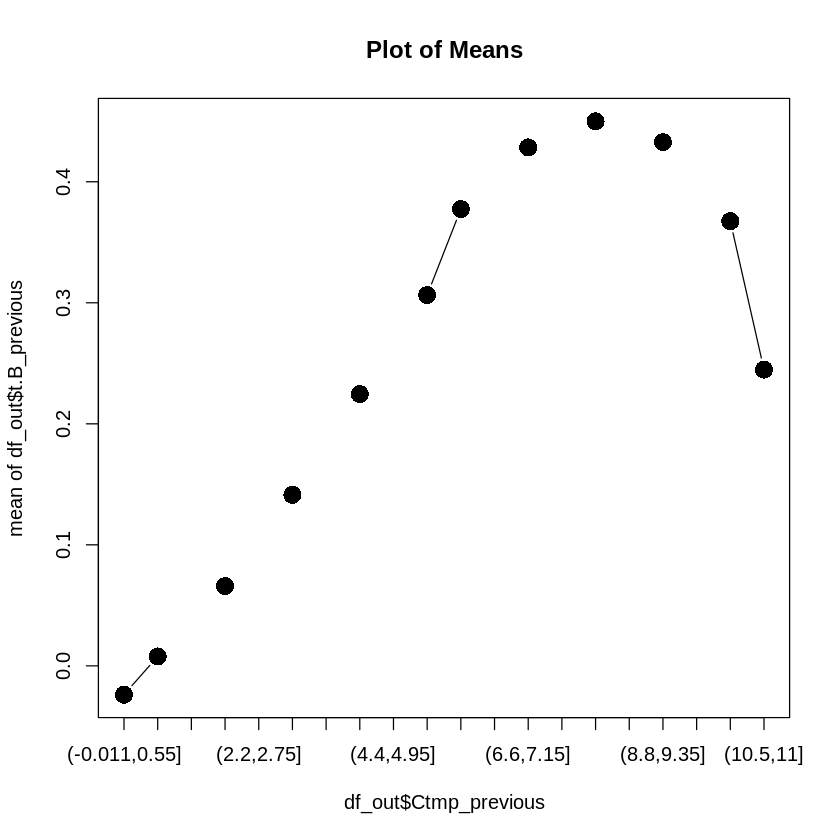

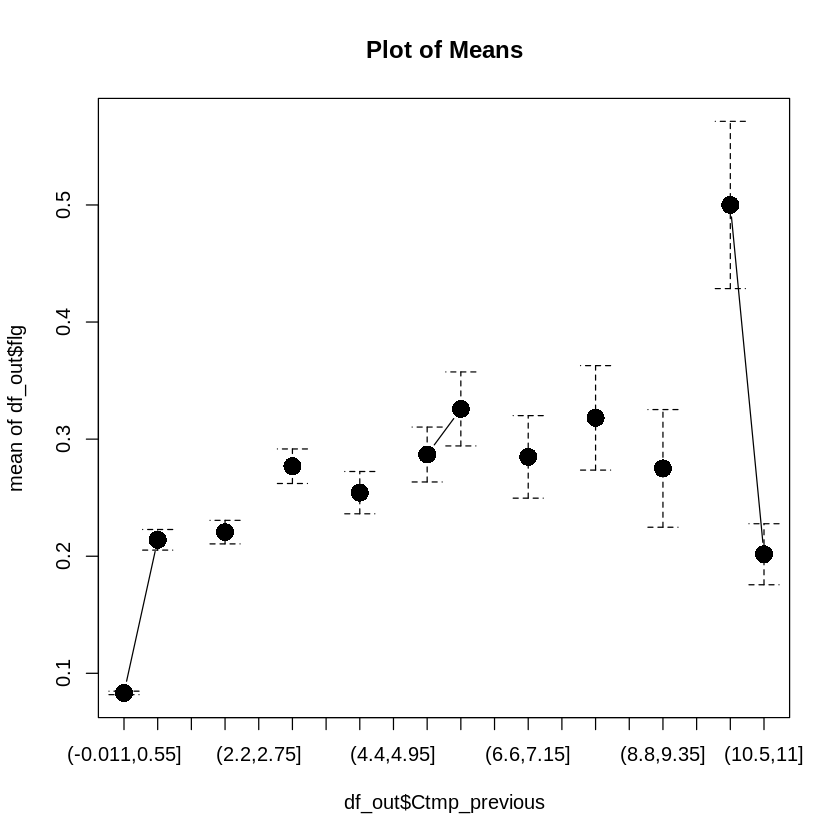

In [ ]:
df_out$Ctmp_previous <- bin.var(df_out$previous_11,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_previous,df_out$Ctmp_previous,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_previous,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


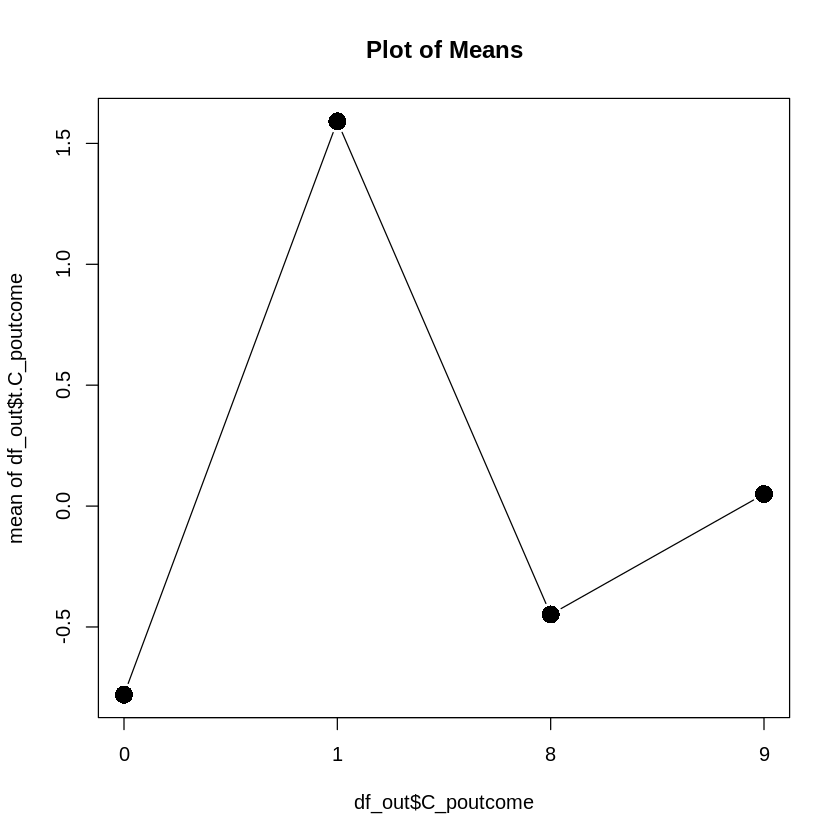

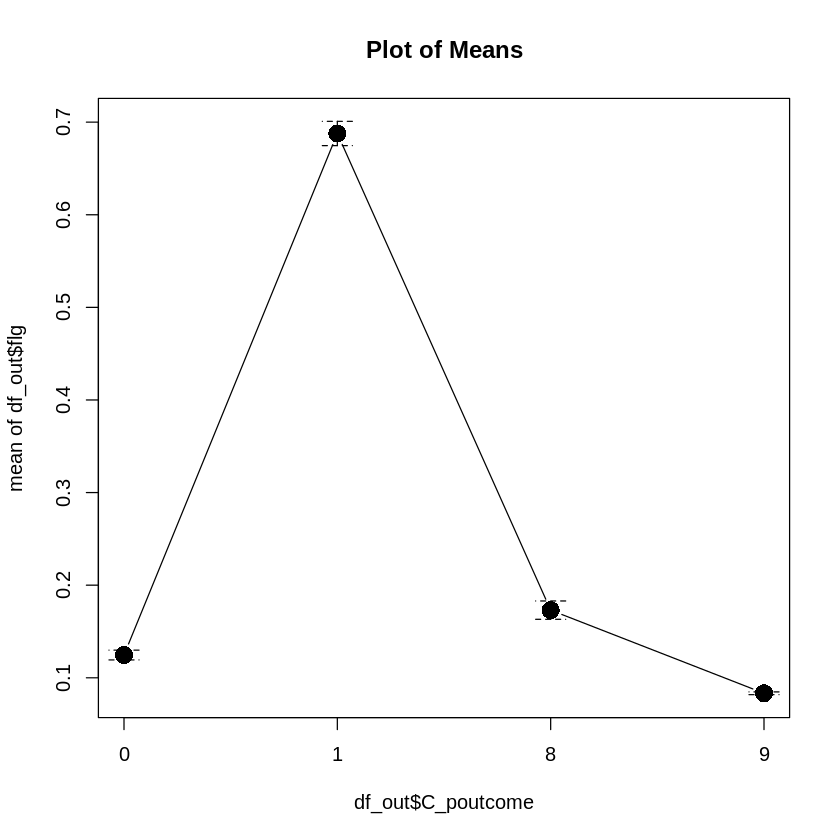

In [ ]:
plotMeans(df_out$t.C_poutcome,df_out$C_poutcome,error.bars="se")
plotMeans(df_out$flg,df_out$C_poutcome,error.bars="se")

# ５．モデル作成５回目
グラフ確認後微調整  
スコアと実績で動きが違う部分を調整  


*   pdays（最終連絡日からの経過日数）
*   C_poutcome（以前のマーケティングキャンペーンの結果）

説明力  
AR　　　CAP20　　CAP30　　CAP70  
53.45　　 55.65　　 65.40　　 89.60





In [ ]:
#上記変数微調整

##以前のマーケティングキャンペーンにおける顧客への最終連絡日からの経過日数
df$pdays_120 <- pmin(df$pdays,120)

##以前のマーケティングキャンペーンの結果
df$C_poutcome <- recode(df$C_poutcome, ' 9=8')

B_pdays <- bs(df$pdays_120,df = i)

df[,"B_pdays"] <- B_pdays


In [ ]:
mbs <- glm(flg ~
            B_age +
            C_job +
            C_dokki +
            C_education +
          #  C_default +
            B_balance +
            C_housing +
            C_loan +
            C_contact +
            C_Day_02 +
            C_month_02 +
            B_campaign +
            B_pdays + F_pdays +
            B_previous +
            C_poutcome
            , data=df,family=binomial(link=logit))

In [ ]:
mbs_pdays <- glm(flg ~
            B_age +
            C_job +
            C_dokki +
            C_education +
           # C_default +
            B_balance +
            C_housing +
            C_loan +
            C_contact +
            C_Day_02 +
            C_month_02 +
            B_campaign +
           # B_pdays + F_pdays +
            B_previous +
            C_poutcome
            , data=df,family=binomial(link=logit))

llrt(mbs,mbs_pdays)  

[1] 35.427  4.000  0.000

In [ ]:
Anova(mbs)

,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
B_age,84.291208,3,3.683763e-18
C_job,28.067776,8,4.615315e-04
C_dokki,42.313054,2,6.483912e-10
C_education,19.168765,3,2.522871e-04
B_balance,124.028947,3,1.046208e-26
C_housing,141.971531,1,9.865209e-33
C_loan,55.213444,1,1.081267e-13
C_contact,311.195510,2,2.659216e-68
C_Day_02,5.317832,1,2.110826e-02


In [ ]:
library(ROCR)

df_out <- data.frame(df,p=predict(mbs,type="response"),t=predict(mbs,type="terms"))

d_arcap <- df_out

#目的変数名
targetName <- "flg"
targetPred <- d_arcap[,targetName]

#ソートする変数、予測確率、GNO、CR
sortName <- "p"
sortPred <- d_arcap[,sortName]

#ARの計算
pred <- prediction(sortPred,targetPred)
AUC <- as.numeric( performance(pred,"auc")@y.values )
AR <- 2 *(AUC-0.5) * 100 #AR値

#CAP値の計算
#予測確率（GNO、CR）を照準に件数等分１０分類
d_arcap$CP10 <- bin.var( sortPred, bins=10, method='proportions',labels =FALSE)

#区分別のデフォルト件数
dcount <- tapply(targetPred,list(CP10=d_arcap$CP10),sum,na.rm=TRUE)

#CAP20値
CAP20 <- sum(dcount[9:10]) / sum(dcount) * 100

#CAP30値
CAP30 <- sum(dcount[8:10]) / sum(dcount) * 100

#CAP70値
CAP70 <- sum(dcount[4:10]) / sum(dcount) * 100

#結果
round(c(AR,CAP20,CAP30,CAP70),2)

[1] 53.45 55.65 65.40 89.60

## ５‐１．グラフ確認


Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


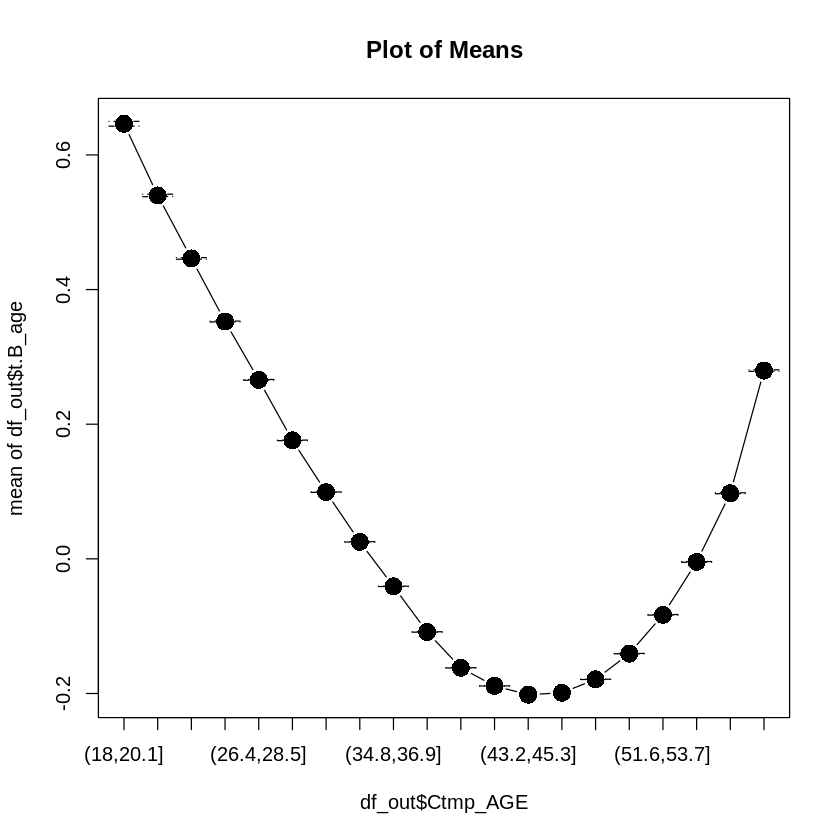

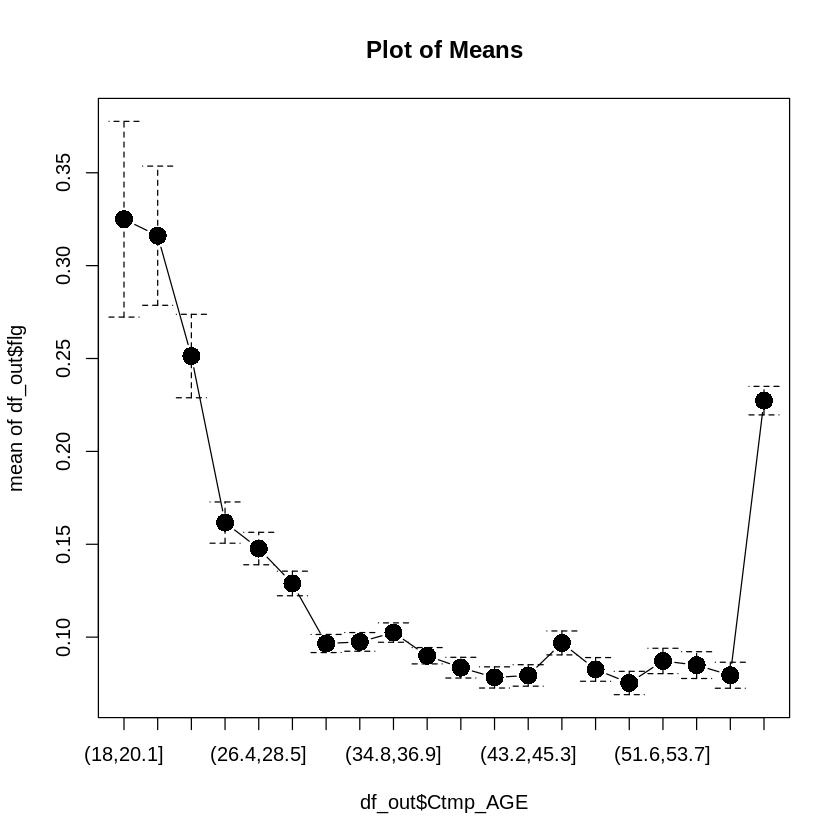

In [ ]:
df_out$Ctmp_AGE <- bin.var(df_out$age_60,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_age,df_out$Ctmp_AGE,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_AGE,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeter

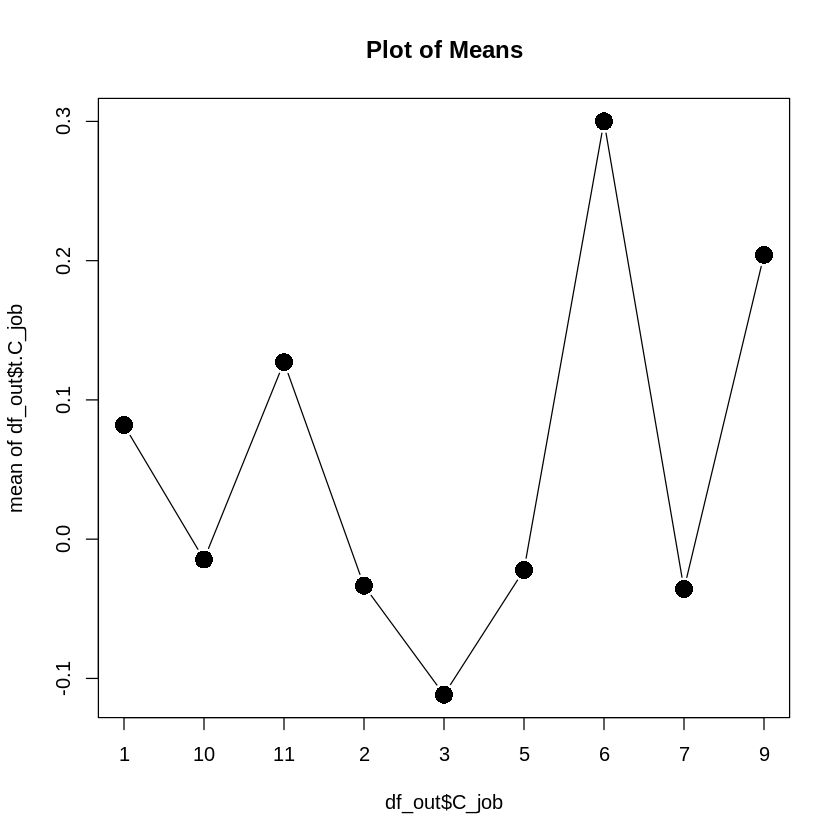

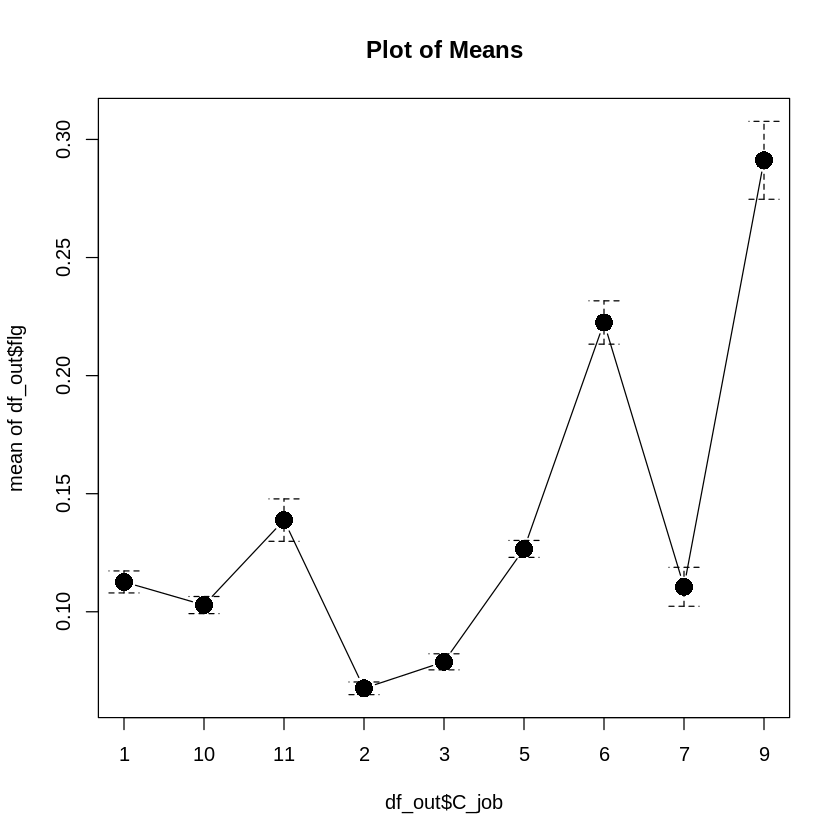

In [ ]:
plotMeans(df_out$t.C_job,df_out$C_job,error.bars="se")
plotMeans(df_out$flg,df_out$C_job,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


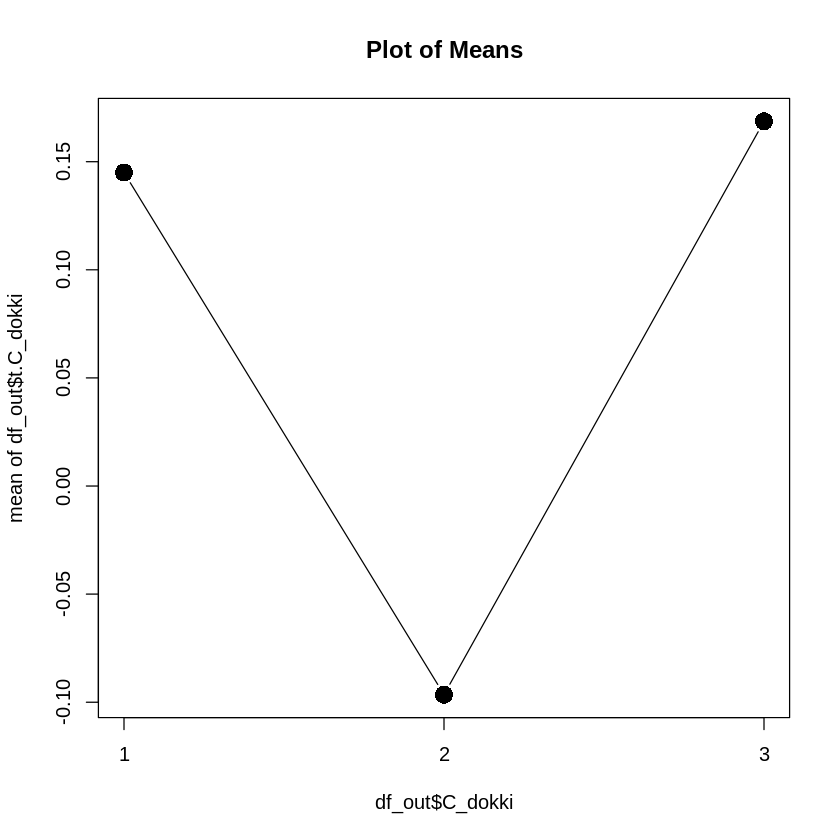

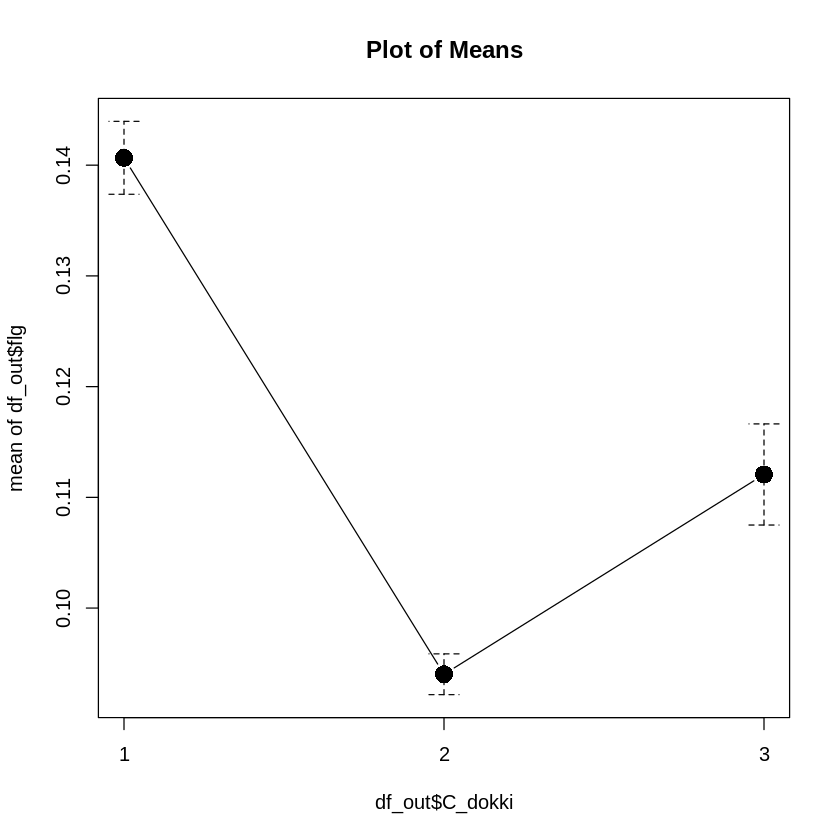

In [ ]:
plotMeans(df_out$t.C_dokki,df_out$C_dokki,error.bars="se")
plotMeans(df_out$flg,df_out$C_dokki,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


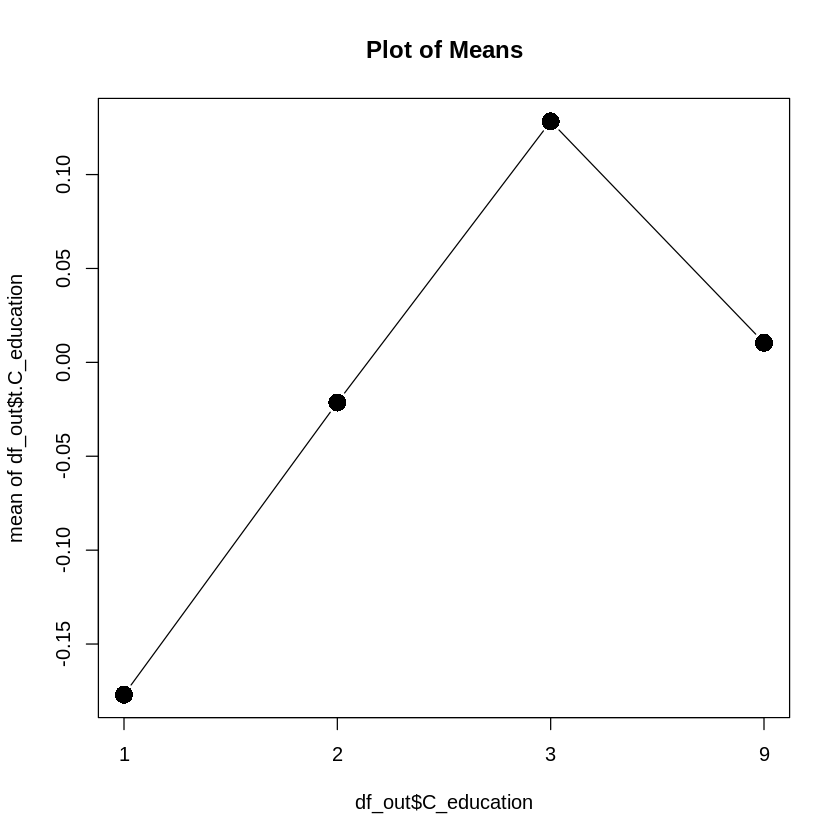

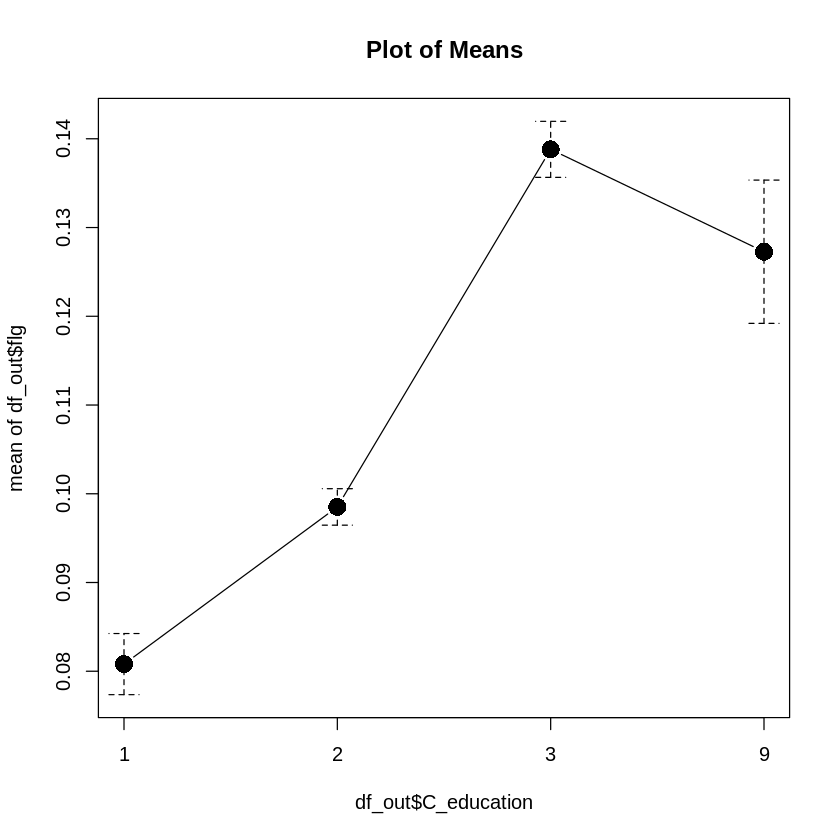

In [ ]:
plotMeans(df_out$t.C_education,df_out$C_education,error.bars="se")
plotMeans(df_out$flg,df_out$C_education,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


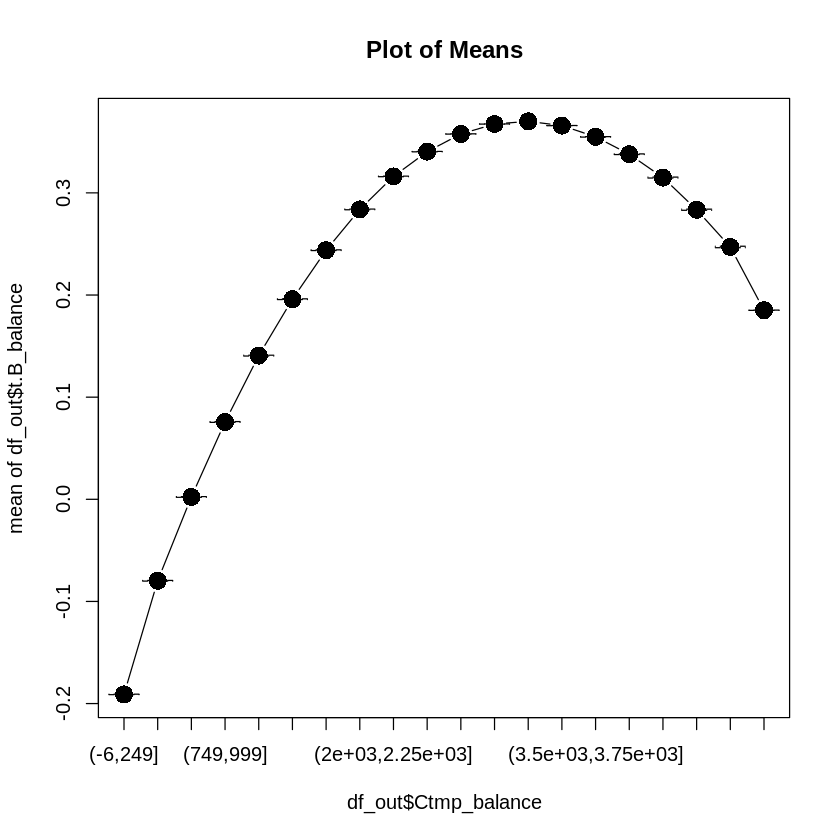

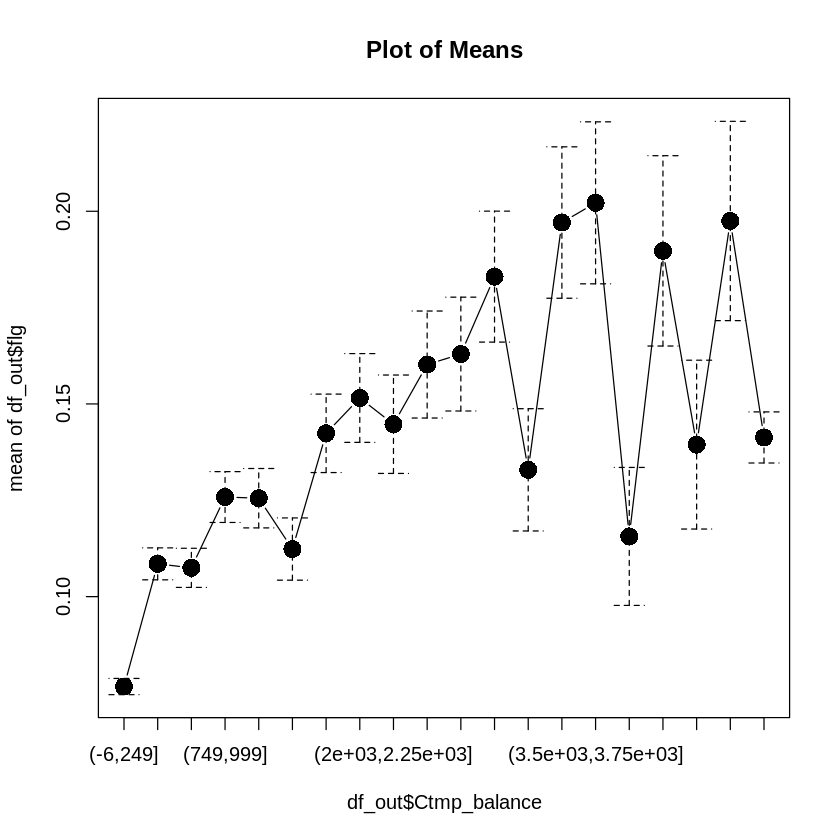

In [ ]:
df_out$Ctmp_balance <- bin.var(df_out$balance_5000,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_balance,df_out$Ctmp_balance,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_balance,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


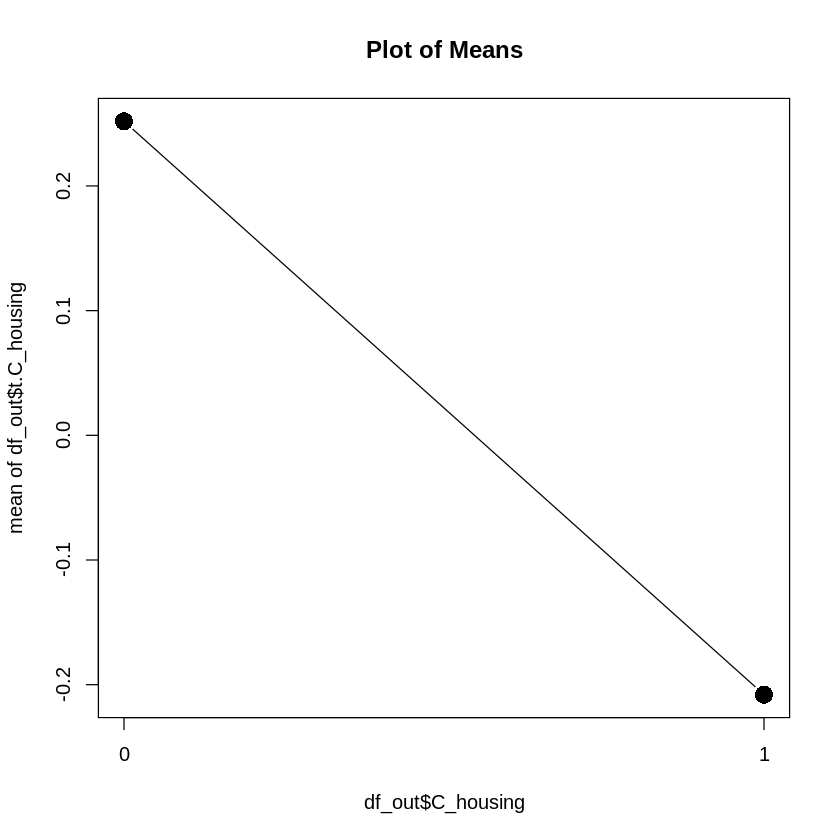

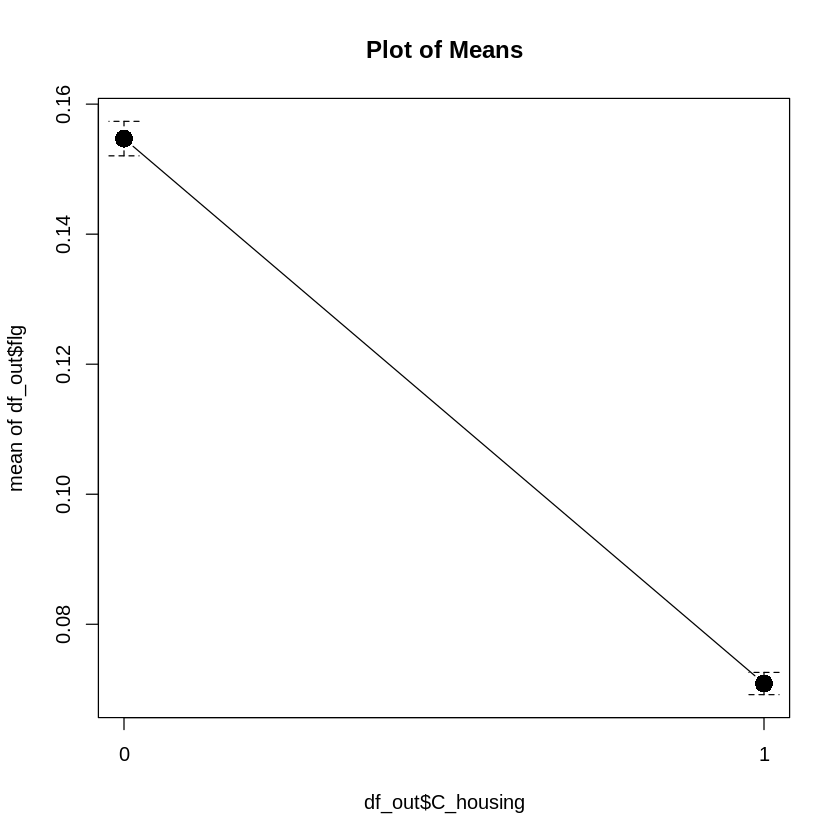

In [ ]:
plotMeans(df_out$t.C_housing,df_out$C_housing,error.bars="se")
plotMeans(df_out$flg,df_out$C_housing,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


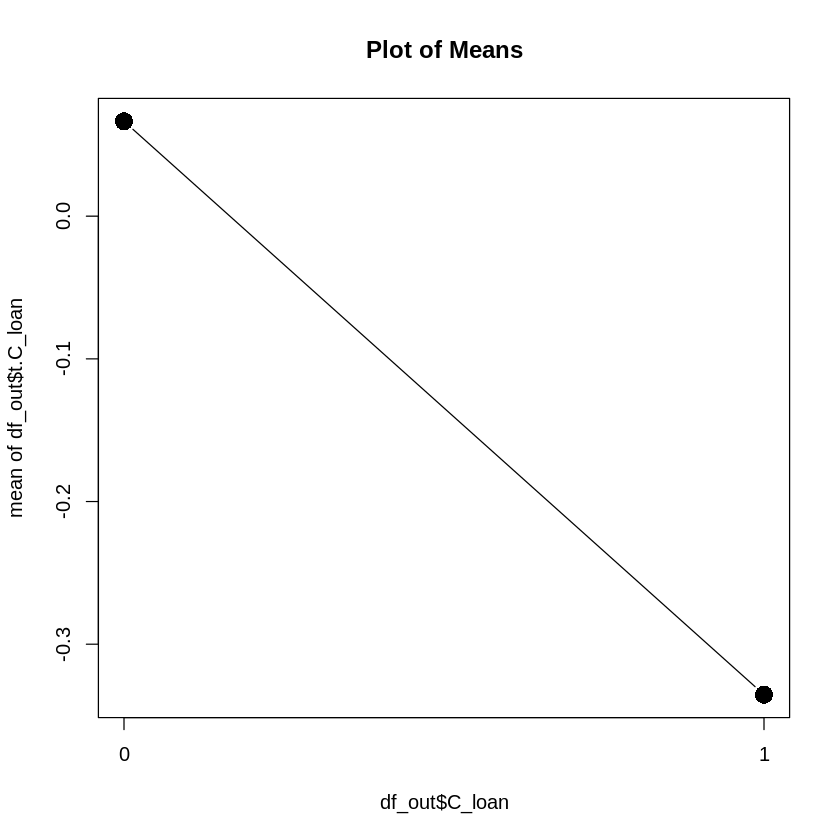

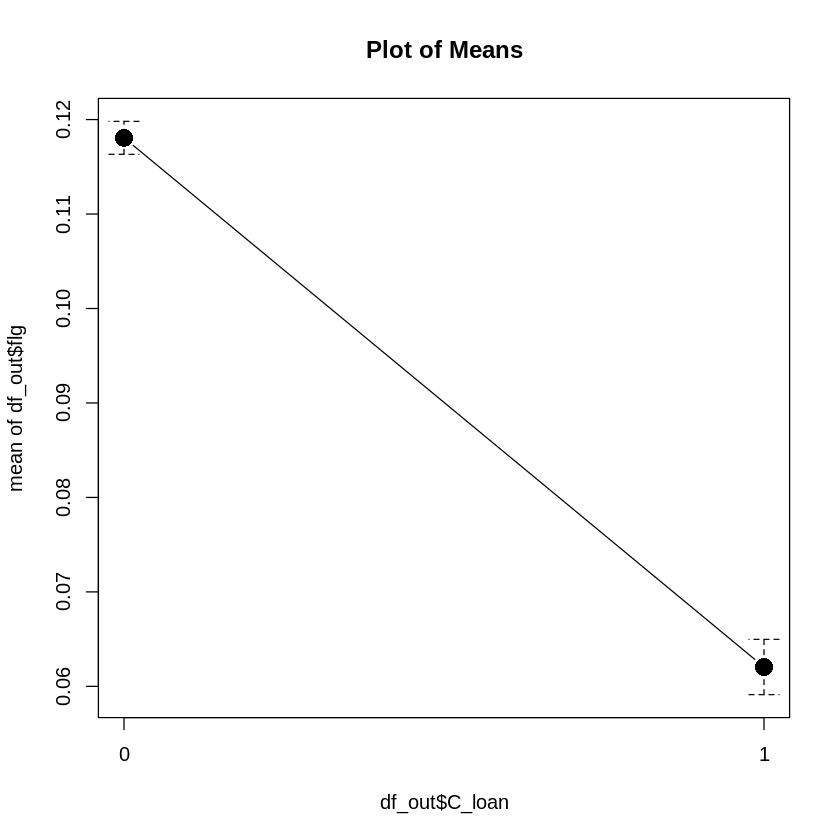

In [ ]:
plotMeans(df_out$t.C_loan,df_out$C_loan,error.bars="se")
plotMeans(df_out$flg,df_out$C_loan,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


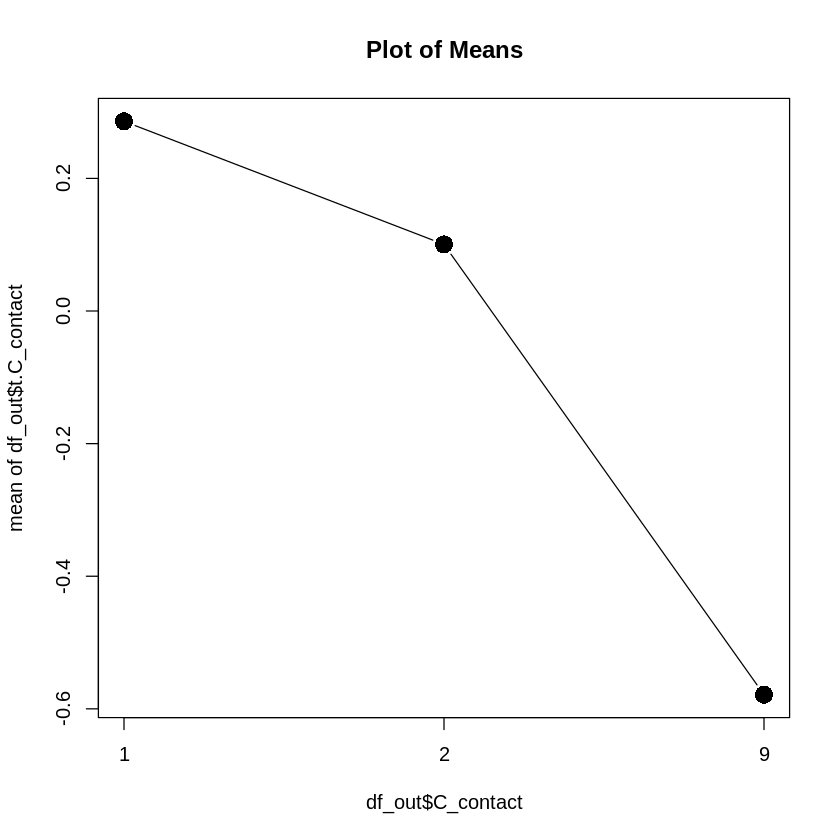

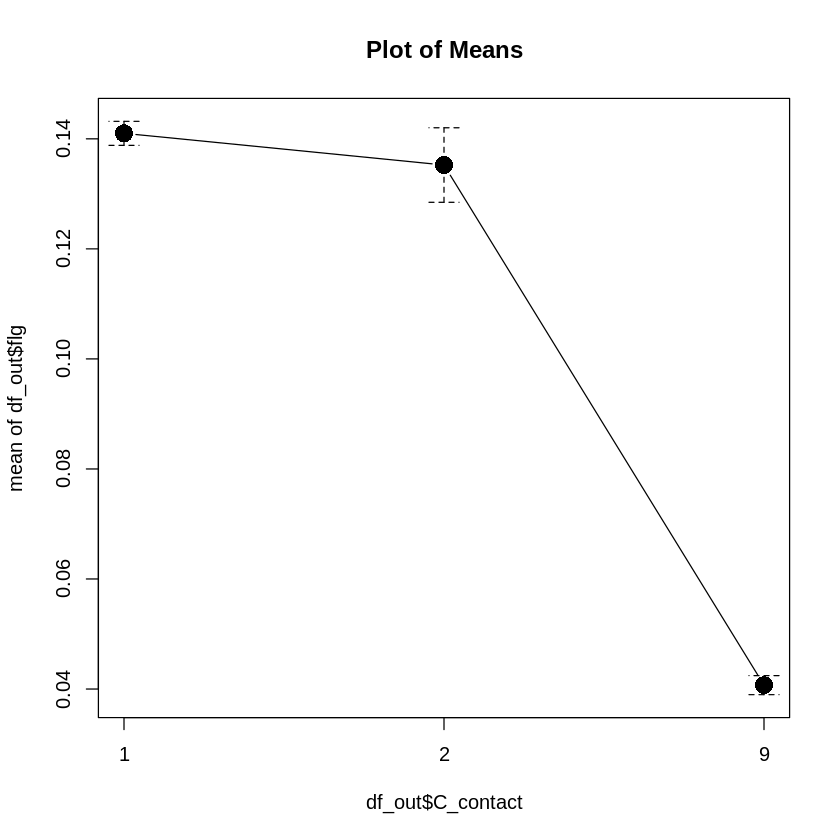

In [ ]:
plotMeans(df_out$t.C_contact,df_out$C_contact,error.bars="se")
plotMeans(df_out$flg,df_out$C_contact,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


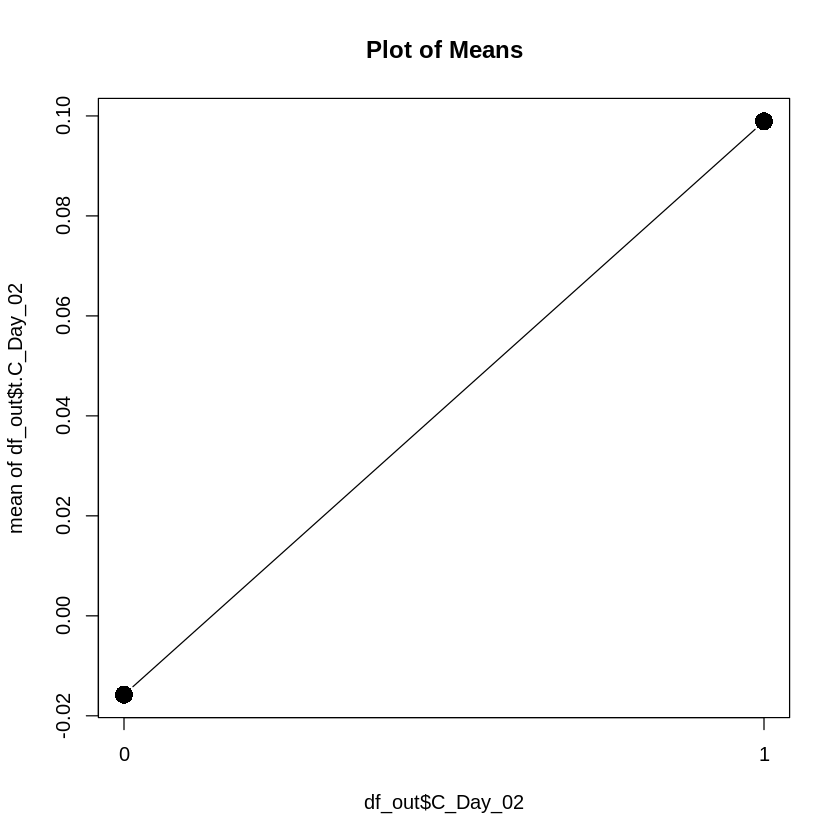

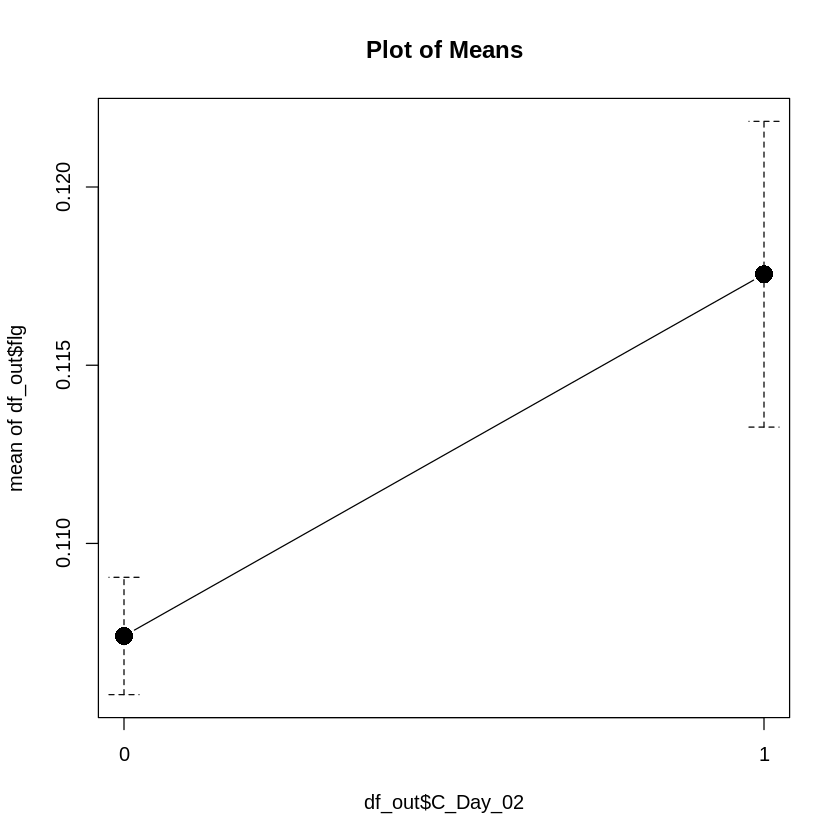

In [ ]:
plotMeans(df_out$t.C_Day_02,df_out$C_Day_02,error.bars="se")
plotMeans(df_out$flg,df_out$C_Day_02,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


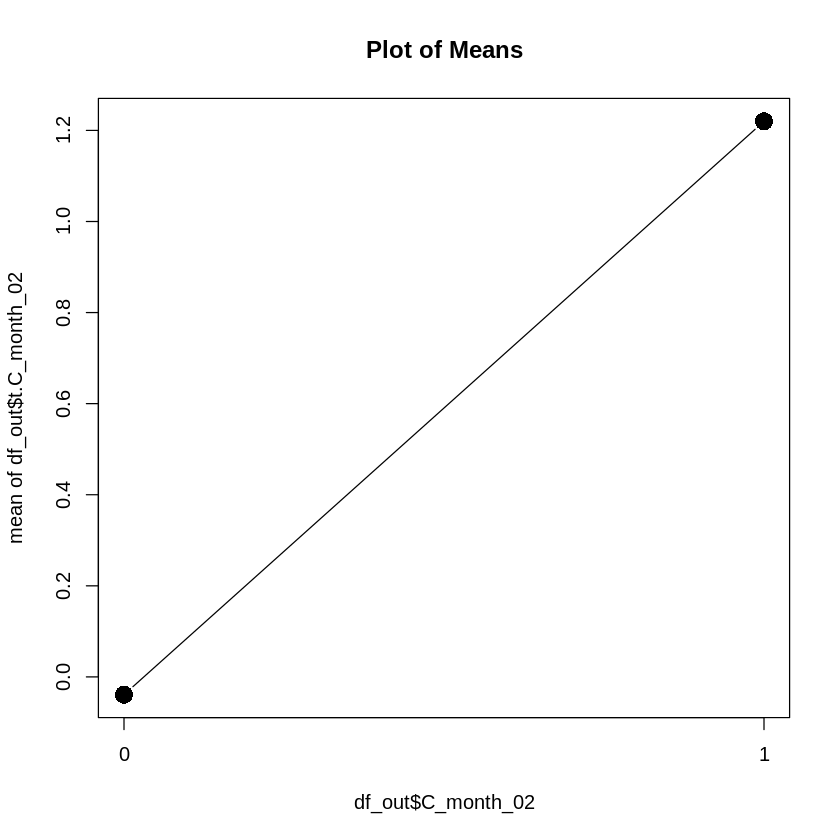

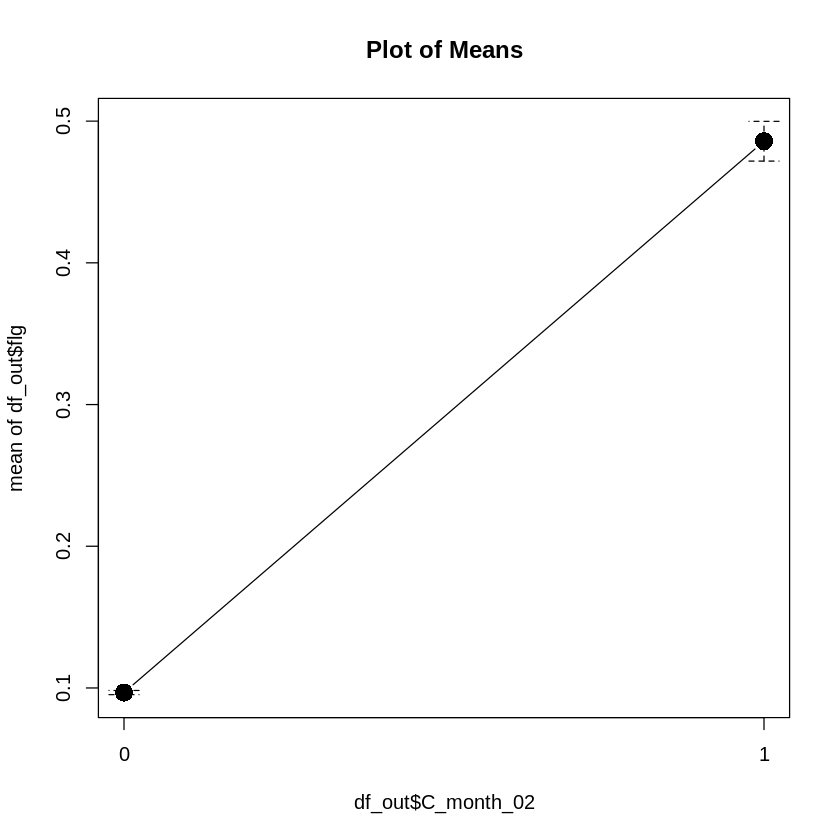

In [ ]:
plotMeans(df_out$t.C_month_02,df_out$C_month_02,error.bars="se")
plotMeans(df_out$flg,df_out$C_month_02,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeter

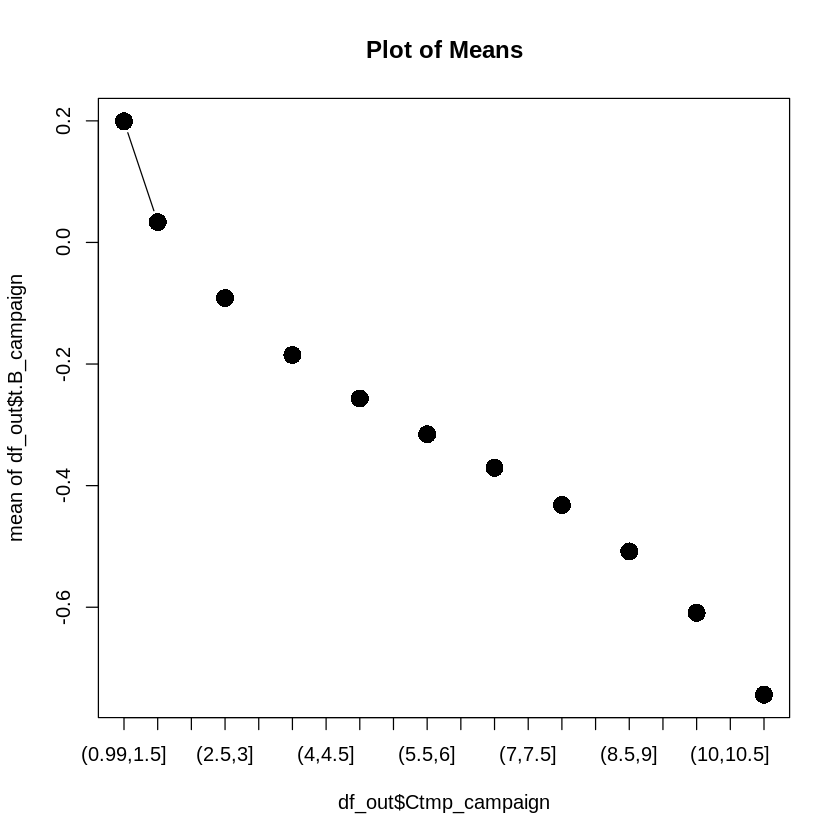

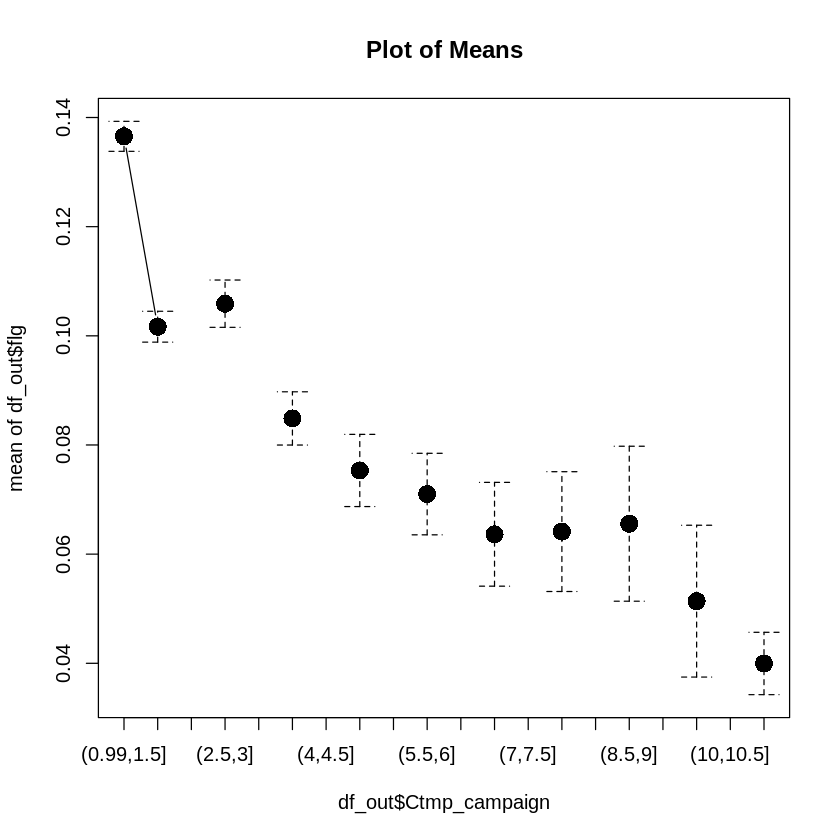

In [ ]:
df_out$Ctmp_campaign <- bin.var(df_out$campaign_11,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_campaign,df_out$Ctmp_campaign,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_campaign,error.bars="se")

Warning message in arrows(1:n.levs.1, means[, i] - sds[, i], 1:n.levs.1, means[, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs.1, means[, i] - sds[, i], 1:n.levs.1, means[, :
“zero-length arrow is of indeterminate angle and so skipped”


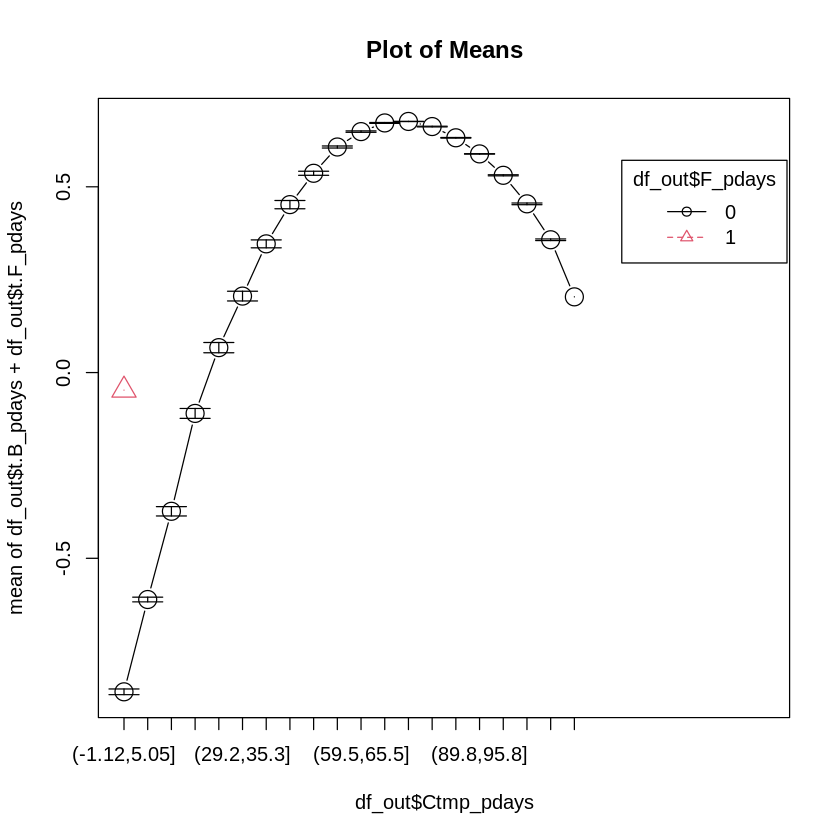

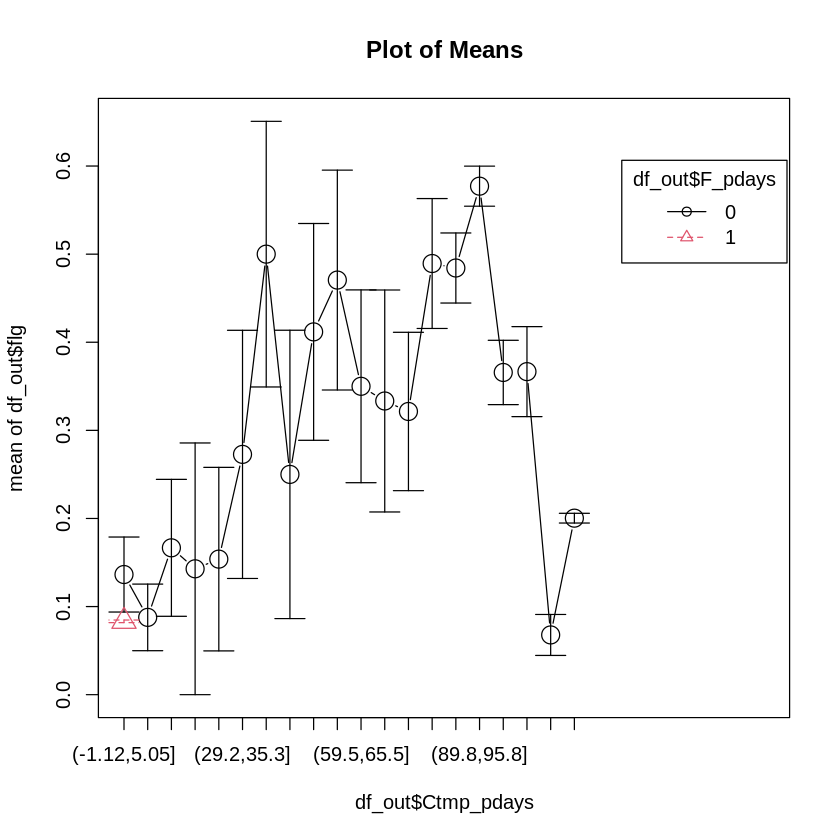

In [ ]:
df_out$Ctmp_pdays <- bin.var(df_out$pdays_120,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_pdays + df_out$t.F_pdays,df_out$Ctmp_pdays,df_out$F_pdays,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_pdays,df_out$F_pdays,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeter

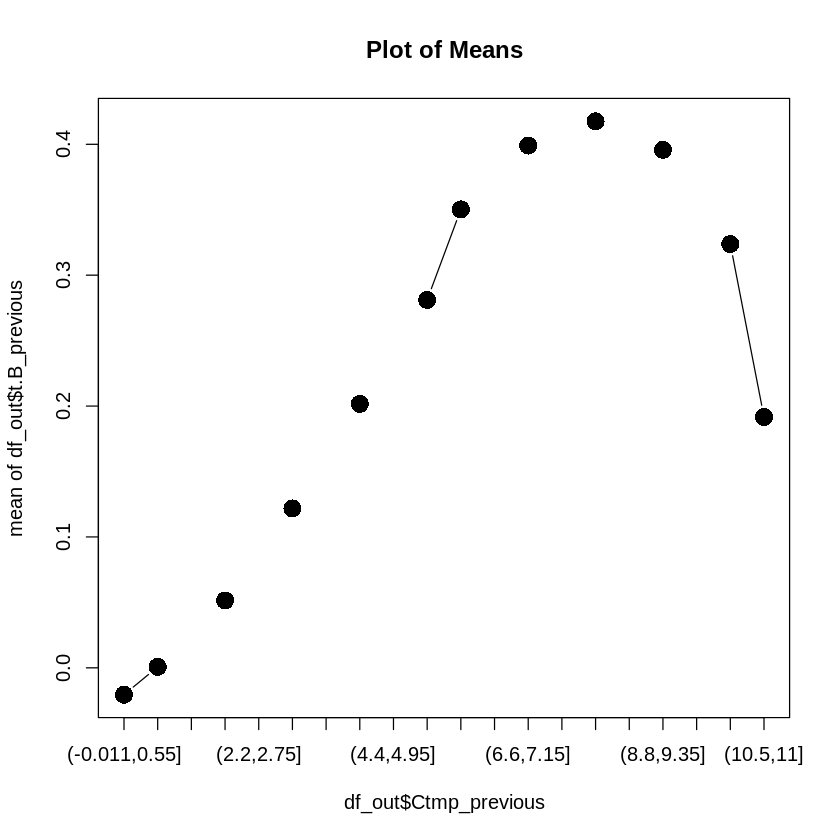

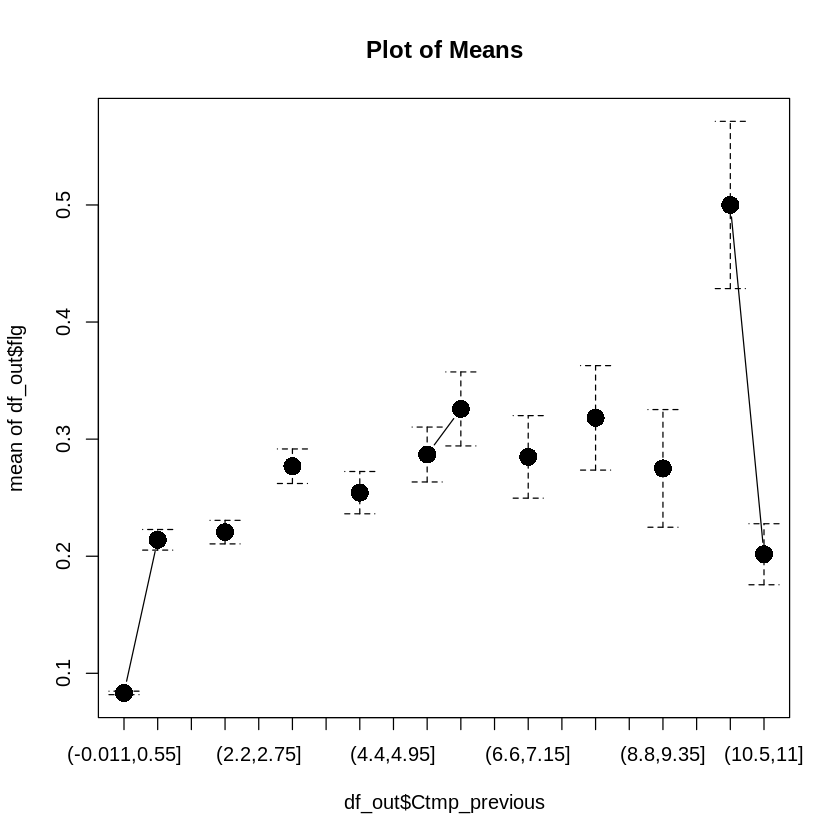

In [ ]:
df_out$Ctmp_previous <- bin.var(df_out$previous_11,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_previous,df_out$Ctmp_previous,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_previous,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


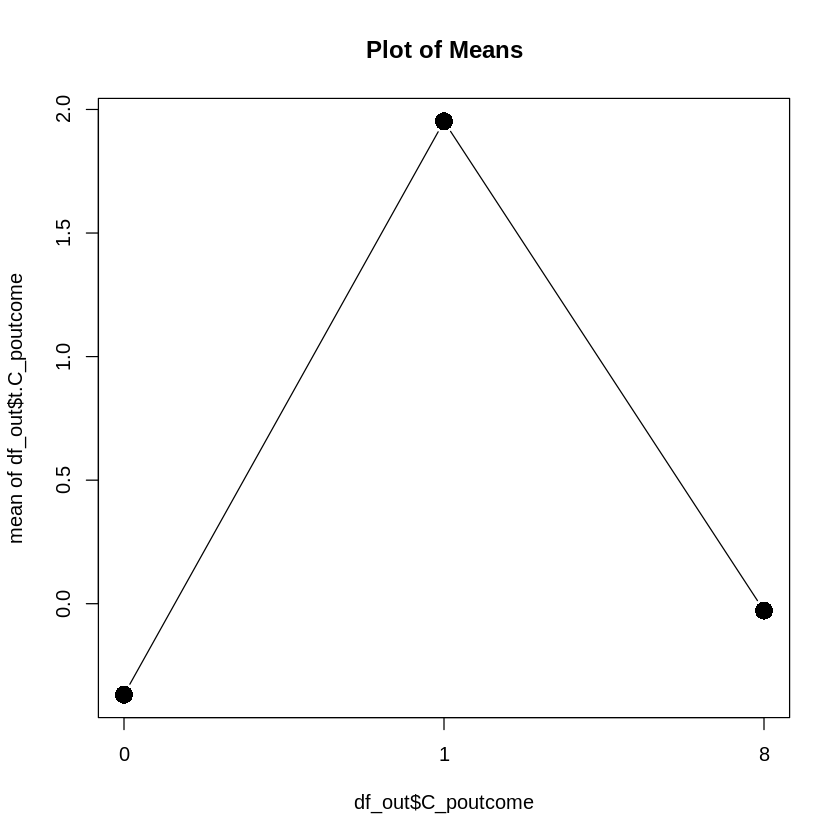

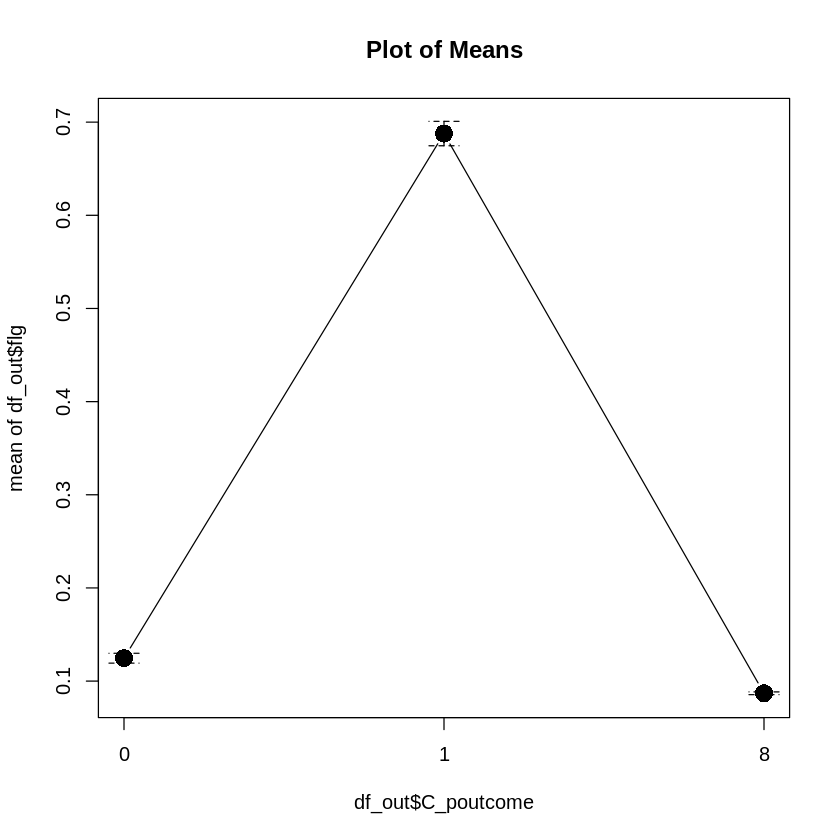

In [ ]:
plotMeans(df_out$t.C_poutcome,df_out$C_poutcome,error.bars="se")
plotMeans(df_out$flg,df_out$C_poutcome,error.bars="se")

##５‐２．アウトサンプルあてはめ

In [ ]:
df_o <- read.table("https://raw.githubusercontent.com/f11828my/Internalmeasures/b8ccb77e44e4ab2cb06165b4003b31a63c9c2979/Data_outsample.txt",
        header = TRUE , sep = ",",na.strings="NA",dec=".",strip.white=TRUE)

In [ ]:
# カテゴリ変数作成

df_o$C_dokki <- as.factor(df_o$C_dokki)
df_o$C_job <- as.factor(df_o$C_job)
df_o$C_education <- as.factor(df_o$C_education)
df_o$C_default <- as.factor(df_o$C_default)
df_o$C_housing <- as.factor(df_o$C_housing)
df_o$C_loan <- as.factor(df_o$C_loan)
df_o$C_contact <- as.factor(df_o$C_contact)
df_o$C_Day <- as.factor(df_o$Day)
df_o$C_month <- as.factor(df_o$C_month)
df_o$C_poutcome <- as.factor(df_o$C_poutcome)

df_o$C_month_02 <- Recode(df_o$C_month,'3 = 1 ;9 = 1 ; 12 = 1 ; else=0')
df_o$C_Day_02 <- Recode(df_o$C_Day,'1 = 1 ; 10 = 1 ; 20 = 1 ; 30 = 1 ; 31 = 1 ; else=0')


# カテゴリ変数　まとめ
df_o$C_job <- recode(df_o$C_job, ' 12=11; 4=3 ; 8=3')
df_o$C_poutcome <- recode(df_o$C_poutcome, ' 9=8')


In [ ]:
#連続値変数作成

#各変数　上限設定

##年齢
df_o$age_60 <- pmin(df_o$age,60)

#＃平均残高
df_o$balance_5000 <- pmax(df_o$balance,-1)
df_o$balance_5000 <- pmin(df_o$balance_5000,5000)

##現在のマーケティングキャンペーンにおける顧客への連絡回数
df_o$campaign_11 <- pmin(df_o$campaign,11)

##以前のマーケティングキャンペーンにおける顧客への最終連絡日からの経過日数
df_o$pdays_120 <- pmin(df_o$pdays,120)

df_o$F_pdays <- 0
df_o[df_o$pdays == -1,]$F_pdays <- 1
df_o$F_pdays <- as.factor(df_o$F_pdays)

##以前のマーケティングキャンペーンにおける顧客への連絡回数
df_o$previous_11 <- pmin(df_o$previous,11)


#平滑化
library(splines)
i <- 3

B_age <- bs(df$age_60,df=i)
B_balance <- bs(df$balance_5000,df = i)
B_campaign <- bs(df$campaign_11,df = i)
B_pdays <- bs(df$pdays_300,df = i)
B_previous <- bs(df$previous_11,df = i)

df[,"B_age"] <- B_age
df[,"B_balance"] <- B_balance
df[,"B_campaign"] <- B_campaign
df[,"B_pdays"] <- B_pdays
df[,"B_previous"] <- B_previous